# Life Expectancy Data Analysis

## Introduction

The dataset for this study has been collected from the World Health Organization’s (WHO) Global Health Observatory (GHO) and complemented with economic data from the United Nations (UN). It covers a period from 2000 to 2015 for 193 countries, providing a broad view of global health and socio-economic conditions. The dataset consists of 22 columns and 2938 rows, including 20 predictor variables that capture different aspects of a country’s health, economy, and social development.

The variables are grouped into four major categories: immunization-related factors (Hepatitis B, Polio, Diphtheria), mortality factors (adult mortality, infant deaths, under-five deaths), economic factors (GDP, health expenditure, income composition of resources), and social factors (schooling, BMI, alcohol consumption, thinness indicators). This structure makes the dataset comprehensive for analyzing the determinants of life expectancy, offering both a global perspective and country-level insights.

## Dataset Overview

	•	Country – Name of the country.
	•	Year – Year of data collection (2000–2015).
	•	Status – Development classification (Developed / Developing).
	•	Life expectancy – Average years a person is expected to live.
	•	Adult Mortality – Probability of dying between ages 15–60 (per 1000 population).
	•	Infant deaths – Number of deaths of children under 1 year per year.
	•	Alcohol – Per capita alcohol consumption (liters per year).
	•	Percentage expenditure – % of GDP spent on healthcare.
	•	Hepatitis B – % of population vaccinated against Hepatitis B.
	•	Measles – Number of reported measles cases.
	•	BMI – Average Body Mass Index of the population.
	•	Under-five deaths – Number of deaths of children under age 5 per year.
	•	Polio – % of population vaccinated against Polio.
	•	Total expenditure – Per capita health expenditure (USD).
	•	Diphtheria – % of population vaccinated against Diphtheria.
	•	HIV/AIDS – HIV/AIDS prevalence rate (% of population).
	•	GDP – GDP per capita (USD).
	•	Population – Total population of the country.
	•	Thinness 1–19 years – Prevalence of thinness among children aged 1–19.
	•	Thinness 5–9 years – Prevalence of thinness among children aged 5–9.
	•	Income composition of resources – Index (0–1) reflecting income distribution and human development.
	•	Schooling – Average number of years of schooling.

# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from sklearn.dummy import DummyRegressor
import math
from scipy.stats import kruskal
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
##

# Importing Datasets & Data Exploration



In [3]:
# Loading training data
try :
    training_df = pd.read_csv("../data/raw/Life_Expectancy_Data.csv")
except FileNotFoundError:
    training_df = pd.read_csv("/content/Life Expectancy Data.csv")

In [4]:
training_df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [5]:
training_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
(training_df.isnull().sum()/len(training_df)*100).sort_values(ascending=False)

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
 BMI                                1.157250
Diphtheria                          0.646698
Polio                               0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Status                              0.000000
Country                             0.000000
Year                                0.000000
under-five deaths                   0.000000
Measles                             0.000000
percentage expenditure              0.000000
 HIV/AIDS                           0.000000
dtype: flo


- The columns with the highest percentage of missing values are 'Population' (22.2%), 'Hepatitis B' (18.8%), and 'GDP' (15.2%). These features may require special attention for imputation or could impact model performance if not handled properly.,
- 'Total expenditure', 'Alcohol', 'Income composition of resources', and 'Schooling' also have notable missing values, ranging from about 5.5% to 7.7%.,
- Several features, such as 'thinness 1-19 years', 'thinness 5-9 years', 'BMI', 'Diphtheria', and 'Polio', have low but nonzero percentages of missing data (around 1.2% or less).,
- Key features like 'Life expectancy', 'Adult Mortality', and most of the remaining columns have very low or zero missing values, indicating good data completeness for these variables.,
- Features such as 'infant deaths', 'Status', 'Country', 'Year', 'under-five deaths', 'Measles', 'percentage expenditure', and 'HIV/AIDS' have no missing values at all, which is ideal for analysis and modeling.
      

In [7]:
training_df.duplicated().sum()

np.int64(0)

### Exploring Numerical Features


In [8]:
training_df.describe(include= 'number')

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

- The target variable 'Life expectancy' has a mean of about 69.2 years, ranging from 36.3 to 89 years.
- Several features (e.g., 'infant deaths', 'Measles', 'under-five deaths', 'percentage expenditure', 'Population', 'GDP') show very high maximum values compared to their means, indicating strong right skewness and outliers.
- 'Adult Mortality' and immunization rates ('Hepatitis B', 'Polio', 'Diphtheria') vary widely across countries and years.
- Socio-economic indicators like 'GDP' and 'Population' have extremely wide ranges, reflecting both small and large countries.
- 'Schooling' (years of education) varies from 0 to 20.7, with a mean of about 12 years.
- 'HIV/AIDS' has a low median but a high maximum, showing most countries have low rates but a few have very high rates.


In [9]:
numerical_cols = training_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [10]:
# Checking Null Values
(training_df[numerical_cols].isna().sum() / len(training_df) * 100.0).sort_values(ascending=False)

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 BMI                                1.157250
 thinness 5-9 years                 1.157250
 thinness  1-19 years               1.157250
Diphtheria                          0.646698
Polio                               0.646698
Adult Mortality                     0.340368
Life expectancy                     0.340368
infant deaths                       0.000000
Year                                0.000000
under-five deaths                   0.000000
Measles                             0.000000
percentage expenditure              0.000000
 HIV/AIDS                           0.000000
dtype: float64

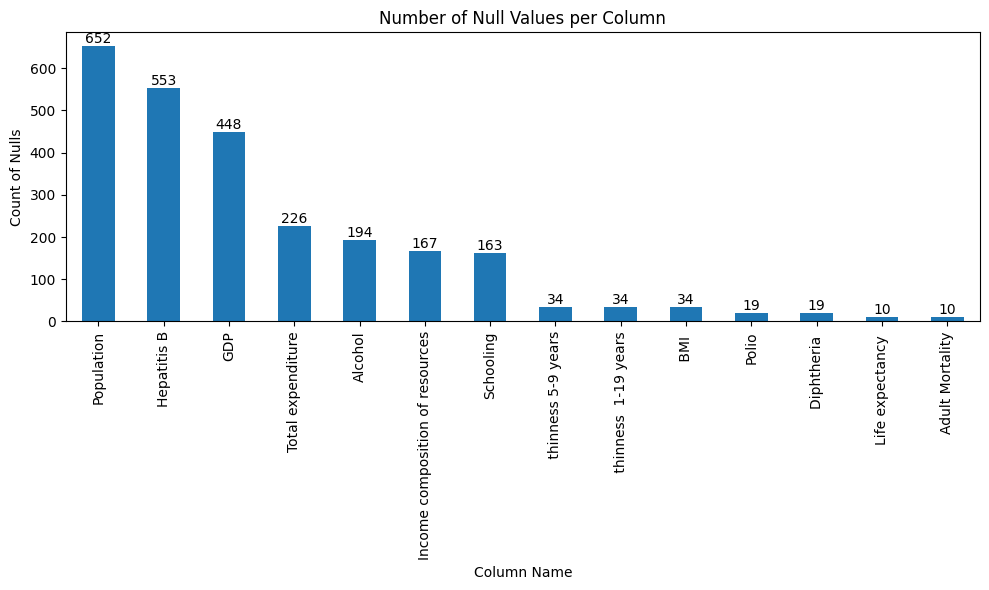

In [11]:
# Null Values
null_counts = training_df.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Only show columns with missing values

plt.figure(figsize=(10, 6))
ax = null_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Null Values per Column')
plt.ylabel('Count of Nulls')
plt.xlabel('Column Name')
plt.tight_layout()

# Annotate bars with null count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [12]:
# Check for outliers in numerical columns using the IQR method

outlier_summary = {}

for col in numerical_cols:
    Q1 = training_df[col].quantile(0.25)
    Q3 = training_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = training_df[(training_df[col] < lower_bound) | (training_df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

# Convert to Series for sorting and display
outlier_summary = pd.Series(outlier_summary)
outlier_summary.sort_values(ascending=False)

 HIV/AIDS                          542
Measles                            542
under-five deaths                  394
percentage expenditure             389
GDP                                365
infant deaths                      315
Diphtheria                         298
Population                         294
Polio                              279
Hepatitis B                        254
Income composition of resources    130
 thinness 5-9 years                 96
 thinness  1-19 years               89
Adult Mortality                     82
Schooling                           44
Total expenditure                   32
Life expectancy                     10
Year                                 0
 BMI                                 0
Alcohol                              0
dtype: int64

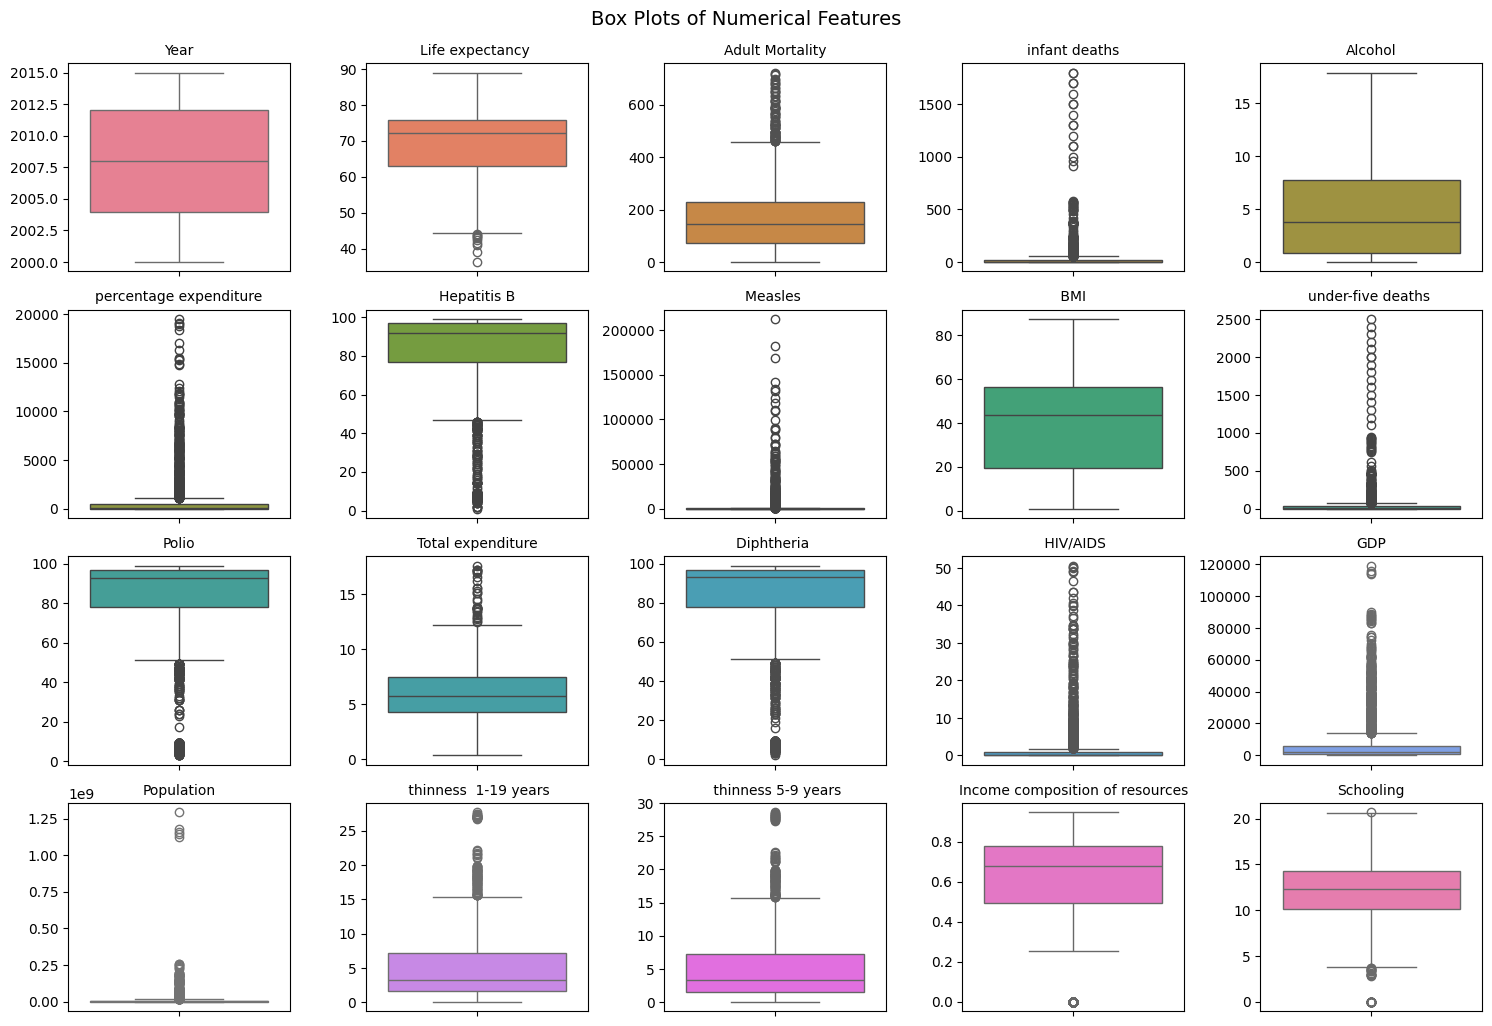

In [13]:
# Box plots for all numerical columns to visualize outliers using subplots
# Reduced size, improved layout, and different colors

palette = sns.color_palette("husl", len(numerical_cols))  # Use a colorful palette

num_cols = len(numerical_cols)
cols = 5  # Number of plots per row
rows = (num_cols // cols) + int(num_cols % cols > 0)

plt.figure(figsize=(3 * cols, 2.5 * rows))  # Smaller individual plots

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=training_df[col], color=palette[i % len(palette)])
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout(pad=1.0)

plt.suptitle("Box Plots of Numerical Features", fontsize=14, y=1.02)
plt.show()

### Exploring Categorical Features


In [14]:
training_df.describe(include= 'object')

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

- There are 193 unique countries in the dataset.
- The 'Status' column has 2 unique values: 'Developed' and 'Developing'.
- 'Afghanistan' appears most frequently among countries
- The majority of records (2,426 out of 2,938) are labeled as 'Developing' status, indicating the dataset is dominated by developing countries.

In [15]:
categorical_cols = training_df.select_dtypes(include='object').columns

In [16]:
# Null Values
(training_df[categorical_cols].isna().sum() / len(training_df) * 100.0).sort_values(ascending=False)

Country    0.0
Status     0.0
dtype: float64

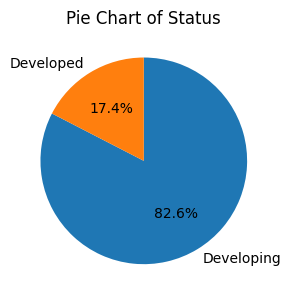

In [17]:
# Select categorical columns with less than 5 unique values
cols_to_plot = [col for col in categorical_cols if training_df[col].nunique() < 5]
n = len(cols_to_plot)
ncols = 4
nrows = math.ceil(n / ncols)

plt.figure(figsize=(12, 5 * nrows))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(nrows, ncols, i)
    training_df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        legend=False
    )
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

The visualizations provide an overview of the distribution of categories, making it easier to understand the composition of categorical features such as 'Status'.

Approximately 17.4% of the data corresponds to countries with a developed status.

### Exploring Target Variable


In [18]:
target_name = 'Life expectancy '
training_df[target_name].head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [19]:
training_df[target_name].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

- The dataset contains 2,928 valid life expectancy values.
- The average life expectancy is about 69.2 years.
- The standard deviation is 9.5 years, indicating moderate spread.
- The minimum life expectancy observed is 36.3 years, and the maximum is 89 years.
- The median (50th percentile) is 72.1 years.
- 25% of values are below 63.1 years, and 75% are below 75.7 years, showing a right-skewed distribution.

In [20]:
training_df[target_name].isnull().sum()

np.int64(10)


We will remove these rows since they do not have values for the target variable.

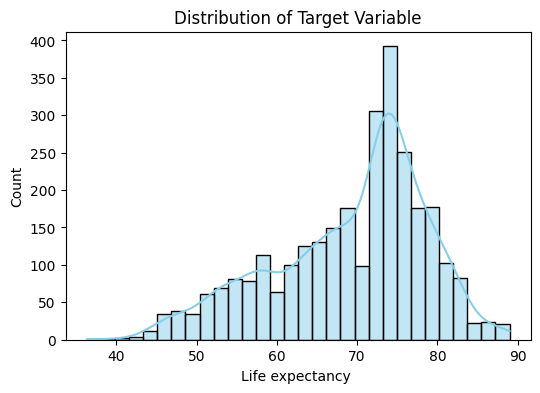

In [21]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6,4))
sns.histplot(training_df[target_name], kde=True, color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel(target_name)
plt.show()

In [22]:
print("Skewness:", training_df[target_name].skew())


Skewness: -0.6386047358773552


- The skewness of the life expectancy distribution is -0.64.
- This indicates a moderate left (negative) skew, meaning there are more values clustered at the higher end, with a longer tail toward lower life expectancy values.

In [23]:
# Display outlier values for the target variable
Q1 = training_df[target_name].quantile(0.25)
Q3 = training_df[target_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = training_df[(training_df[target_name] < lower_bound) | (training_df[target_name] > upper_bound)][target_name]
print("Outlier values in target variable:")
print(outliers.values)


Outlier values in target variable:
[36.3 44.  43.5 43.1 43.3 42.3 41.5 41.  39.  43.8]


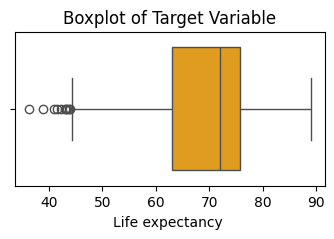

In [24]:
plt.figure(figsize=(4,2))
sns.boxplot(x=training_df[target_name], color='orange')
plt.title('Boxplot of Target Variable')
plt.show()

# Handling Missing Values




### Life Expectancy (Target Variable)

In [25]:
training_df_clean=training_df.copy()

In [26]:
training_df_clean[target_name].isnull().sum()

np.int64(10)

In [27]:
# Dropping the rows which have missing values corresponding to the target variable
training_df_clean = training_df.dropna(subset=[target_name])


Rows with missing values in the target variable ('Life expectancy') are dropped because they cannot be used for supervised learning. Machine learning models require both input features and corresponding target values to learn patterns and make predictions. 

In [28]:
training_df_clean[target_name].isnull().sum()

np.int64(0)

### Population

In [29]:
training_df_clean.Population.head()

0    33736494.0
1      327582.0
2    31731688.0
3     3696958.0
4     2978599.0
Name: Population, dtype: float64

In [30]:
training_df_clean.Population.describe()

count    2.284000e+03
mean     1.276454e+07
std      6.103765e+07
min      3.400000e+01
25%      1.966738e+05
50%      1.391756e+06
75%      7.426746e+06
max      1.293859e+09
Name: Population, dtype: float64

It varries greatly so we cannot fill null values with the median value

- Most countries have an income composition index between 0.49 and 0.78, with a median of 0.68.
- The minimum value of 0 suggests some countries have very poor resource composition.
- The distribution is slightly left-skewed (median > mean), and there are no outliers above 0.95.
- The spread (std) is moderate, indicating some variability across countries.



In [31]:
# percentage of null values in 'Population' column
training_df_clean.Population.isnull().sum()/len(training_df_clean)*100


np.float64(21.994535519125684)

In [32]:
# Relationship Between the Population & Column & Year
training_df_clean.sort_values(['Country', 'Year'])[['Country', 'Year', 'Population']]

Country  Year  Population
15    Afghanistan  2000    293756.0
14    Afghanistan  2001   2966463.0
13    Afghanistan  2002  21979923.0
12    Afghanistan  2003   2364851.0
11    Afghanistan  2004  24118979.0
...           ...   ...         ...
2926     Zimbabwe  2011  14386649.0
2925     Zimbabwe  2012   1471826.0
2924     Zimbabwe  2013    155456.0
2923     Zimbabwe  2014  15411675.0
2922     Zimbabwe  2015  15777451.0

[2928 rows x 3 columns]

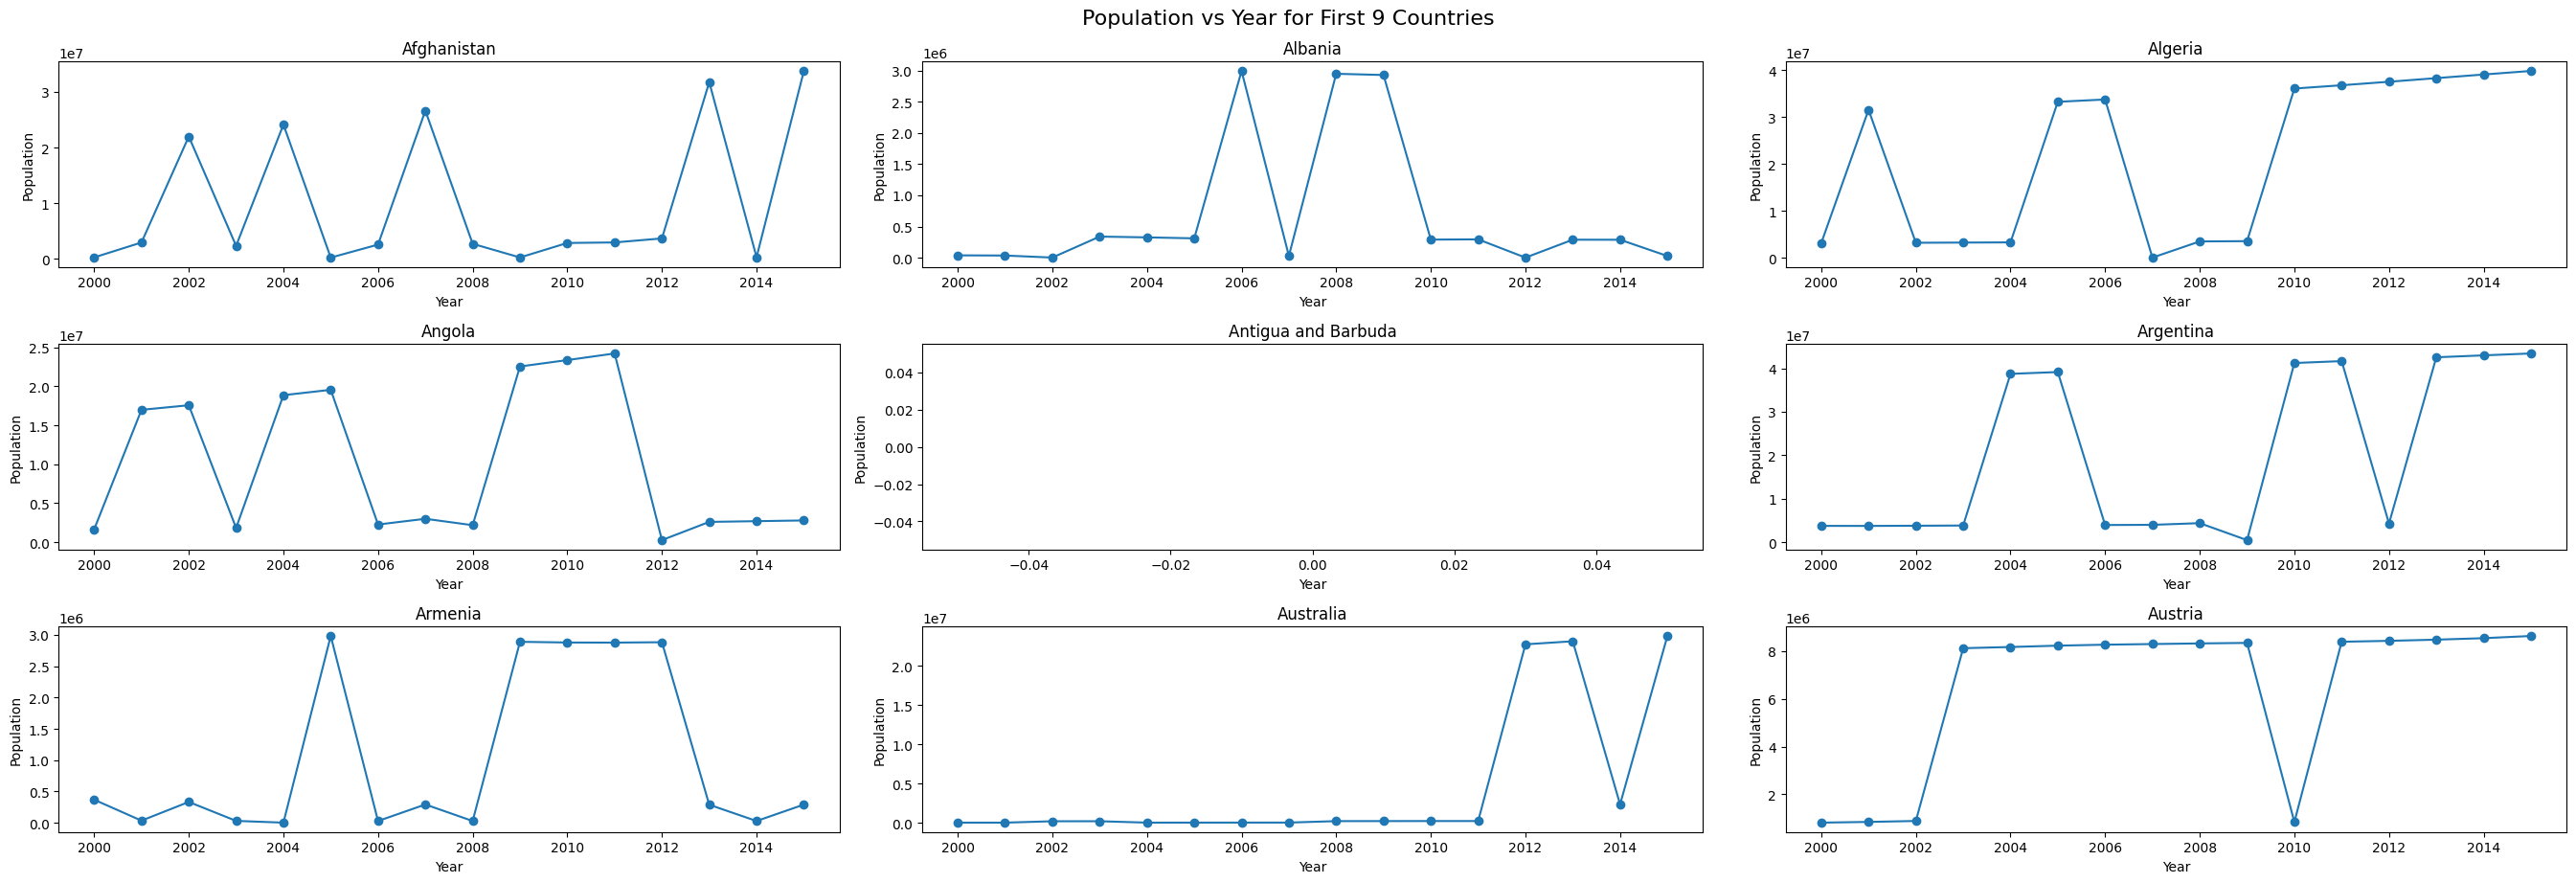

In [33]:
# Plot Population vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Population'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.tight_layout()

plt.suptitle('Population vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()

This cell plots the population over time for the first 9 countries in the dataset. By visualizing population trends by year and country, it helps to identify missing data patterns and informs decisions about how to handle missing values in the 'Population' column.

In [34]:
# Show number of null values in 'Population' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Population'].apply(lambda x: x.isnull().sum())
print(nulls_by_country[nulls_by_country > 0].sort_values(ascending=False))

Country
Antigua and Barbuda                                     16
Bahamas                                                 16
Bahrain                                                 16
Barbados                                                16
Bolivia (Plurinational State of)                        16
Brunei Darussalam                                       16
Congo                                                   16
Cuba                                                    16
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Egypt                                                   16
Gambia                                                  16
Grenada                                                 16
Iran (Islamic Republic of)                              16
Kuwait                                          

In [35]:
training_df_clean[training_df_clean.Country=="Bahamas"]

Country  Year      Status  Life expectancy   Adult Mortality  \
160  Bahamas  2015  Developing              76.1            147.0   
161  Bahamas  2014  Developing              75.4             16.0   
162  Bahamas  2013  Developing              74.8            172.0   
163  Bahamas  2012  Developing              74.9            167.0   
164  Bahamas  2011  Developing              75.0            162.0   
165  Bahamas  2010  Developing              75.0            161.0   
166  Bahamas  2009  Developing              74.6            168.0   
167  Bahamas  2008  Developing              74.5            167.0   
168  Bahamas  2007  Developing              74.4            167.0   
169  Bahamas  2006  Developing              74.2            171.0   
170  Bahamas  2005  Developing              74.1            172.0   
171  Bahamas  2004  Developing              73.8            174.0   
172  Bahamas  2003  Developing              73.2            189.0   
173  Bahamas  2002  Developing              73.1             19.0   
174  Bahamas  2001  Developing              72.9            189.0   
175  Bahamas  2000  Developing              72.6            192.0   

     infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
160              0      NaN                     0.0         95.0         0   
161              0     9.45                     0.0         96.0         0   
162              0     9.42                     0.0         97.0         0   
163              0     9.50                     0.0         96.0         0   
164              0     9.34                     0.0         95.0         0   
165              0     9.19                     0.0         98.0         0   
166              0     9.29                     0.0         95.0         0   
167              0    10.15                     0.0          9.0         0   
168              0    10.75                     0.0         93.0         0   
169              0    11.07                     0.0         96.0         0   
170              0    10.49                     0.0         93.0         0   
171              0    10.10                     0.0         93.0         0   
172              0    10.68                     0.0         88.0         0   
173              0    10.85                     0.0         89.0         0   
174              0    11.64                     0.0         21.0         0   
175              0    12.15                     0.0          NaN         0   

     ...  Polio  Total expenditure  Diphtheria    HIV/AIDS  GDP  Population  \
160  ...   95.0                NaN         95.0        0.1  NaN         NaN   
161  ...   96.0               7.74         96.0        0.1  NaN         NaN   
162  ...   97.0               7.50         97.0        0.1  NaN         NaN   
163  ...   99.0               7.43         98.0        0.2  NaN         NaN   
164  ...   97.0               7.63         98.0        0.1  NaN         NaN   
165  ...   97.0               7.44         99.0        0.2  NaN         NaN   
166  ...   97.0               7.43         96.0        0.1  NaN         NaN   
167  ...   93.0               7.30         93.0        0.1  NaN         NaN   
168  ...   95.0               7.80         95.0        0.1  NaN         NaN   
169  ...   94.0               6.93         95.0        0.1  NaN         NaN   
170  ...   93.0               5.95         93.0        0.1  NaN         NaN   
171  ...   92.0               6.20         93.0        0.1  NaN         NaN   
172  ...   93.0               5.62         92.0        0.1  NaN         NaN   
173  ...   93.0               5.26         94.0        0.1  NaN         NaN   
174  ...   98.0               5.15         99.0        0.2  NaN         NaN   
175  ...   91.0               5.21         99.0        0.1  NaN         NaN   

      thinness  1-19 years   thinness 5-9 years  \
160                    2.5                  2.5   
161                    2.5                  2.5   
162    

In [36]:
training_df_clean.drop(columns=['Population'], inplace=True)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\3201331770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean.drop(columns=['Population'], inplace=True)


- There are 16 null values, one for each year in the dataset.
- For most countries, population data is entirely missing.
- Therefore, we have decided to drop the Population column from further analysis.

### Hepatitis B

In [37]:
# Percentage of null values in 'Population' column
training_df_clean['Hepatitis B'].isnull().sum()/len(training_df_clean)*100


np.float64(18.886612021857925)

In [38]:
training_df_clean['Hepatitis B'].describe()

count    2375.000000
mean       80.960842
std        25.018337
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64

**Hepatitis B' Immunization Rates:**

- The dataset contains 2,375 valid entries for the 'Hepatitis B' column.
- The average immunization rate is approximately 81%, with a standard deviation of 25%, indicating moderate variability across countries and years.
- The minimum recorded value is 1%, while the maximum is 99%, showing a wide range of immunization coverage.
- The 25th percentile is 77%, the median (50th percentile) is 92%, and the 75th percentile is 97%.


In [39]:
training_df_clean['Hepatitis B'].value_counts().sort_values(ascending=False)

Hepatitis B
99.0    237
98.0    209
96.0    166
97.0    154
95.0    149
       ... 
23.0      1
26.0      1
12.0      1
32.0      1
19.0      1
Name: count, Length: 87, dtype: int64

In [40]:
training_df_clean[training_df_clean['Hepatitis B'].isnull()].head()

Country  Year      Status  Life expectancy   Adult Mortality  \
44  Algeria  2003  Developing              71.7            146.0   
45  Algeria  2002  Developing              71.6            145.0   
46  Algeria  2001  Developing              71.4            145.0   
47  Algeria  2000  Developing              71.3            145.0   
57   Angola  2006  Developing              47.7            381.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
44             20     0.34               25.018523          NaN     15374   
45             20     0.36              148.511984          NaN      5862   
46             20     0.23              147.986071          NaN      2686   
47             21     0.25              154.455944          NaN         0   
57             90     5.84               25.086888          NaN       765   

    ...  under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
44  ...                  23   87.0               3.60         87.0        0.1   
45  ...                  23   86.0               3.73         86.0        0.1   
46  ...                  24   89.0               3.84         89.0        0.1   
47  ...                  25   86.0               3.49         86.0        0.1   
57  ...                 143   36.0               4.54         34.0        2.5   

            GDP   thinness  1-19 years   thinness 5-9 years  \
44   294.335560                    6.3                  6.1   
45  1774.336730                    6.3                  6.2   
46  1732.857979                    6.4                  6.3   
47  1757.177970                    6.5                  6.4   
57   262.415149                    9.8                  9.7   

    Income composition of resources  Schooling  
44                            0.663       11.5  
45                            0.653       11.1  
46                            0.644       10.9  
47                            0.636       10.7  
57                            0.439        7.2  

[5 rows x 21 columns]

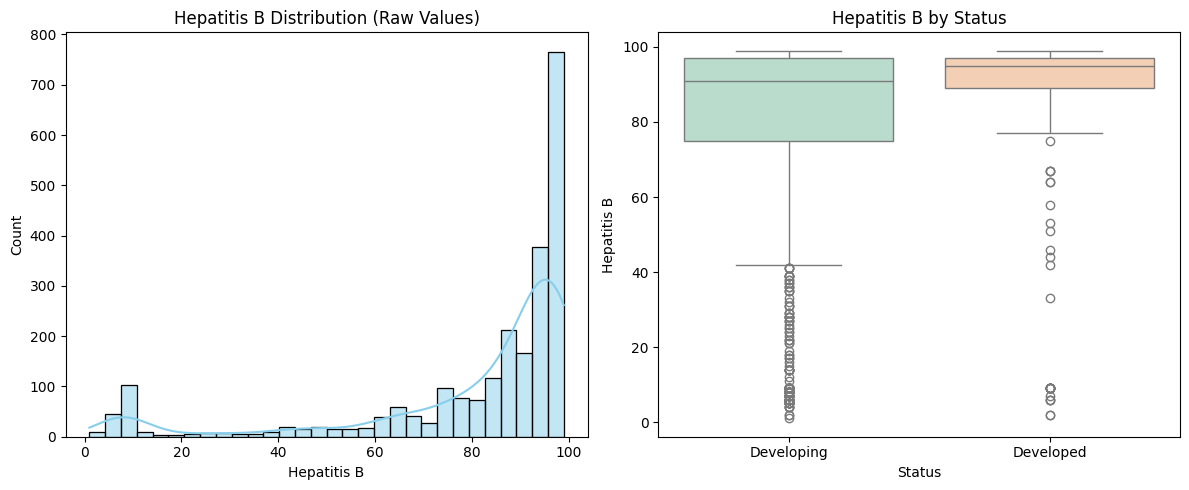

In [41]:
# Distribution & by-Status comparison for Hepatitis B
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (Hepatitis B raw)
sns.histplot(training_df_clean["Hepatitis B"], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("Hepatitis B Distribution (Raw Values)")
ax[0].set_xlabel("Hepatitis B")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y="Hepatitis B", palette="Pastel2", ax=ax[1])
ax[1].set_title("Hepatitis B by Status")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("Hepatitis B")

plt.tight_layout()
plt.show()

The distribution of Hepatitis B vaccination coverage is skewed, with most countries achieving high rates (90–100%), while a few—mainly developing countries—show very low coverage. Developed countries tend to have consistently high vaccination rates, while developing countries display greater variability and more outliers.

Importantly, higher Hepatitis B vaccination rates are generally associated with longer life expectancy, since stronger immunization programs reduce preventable diseases, improve child survival, and enhance overall public health. Conversely, countries with poor vaccination coverage often also have lower life expectancy due to weaker healthcare systems and higher disease burdens.

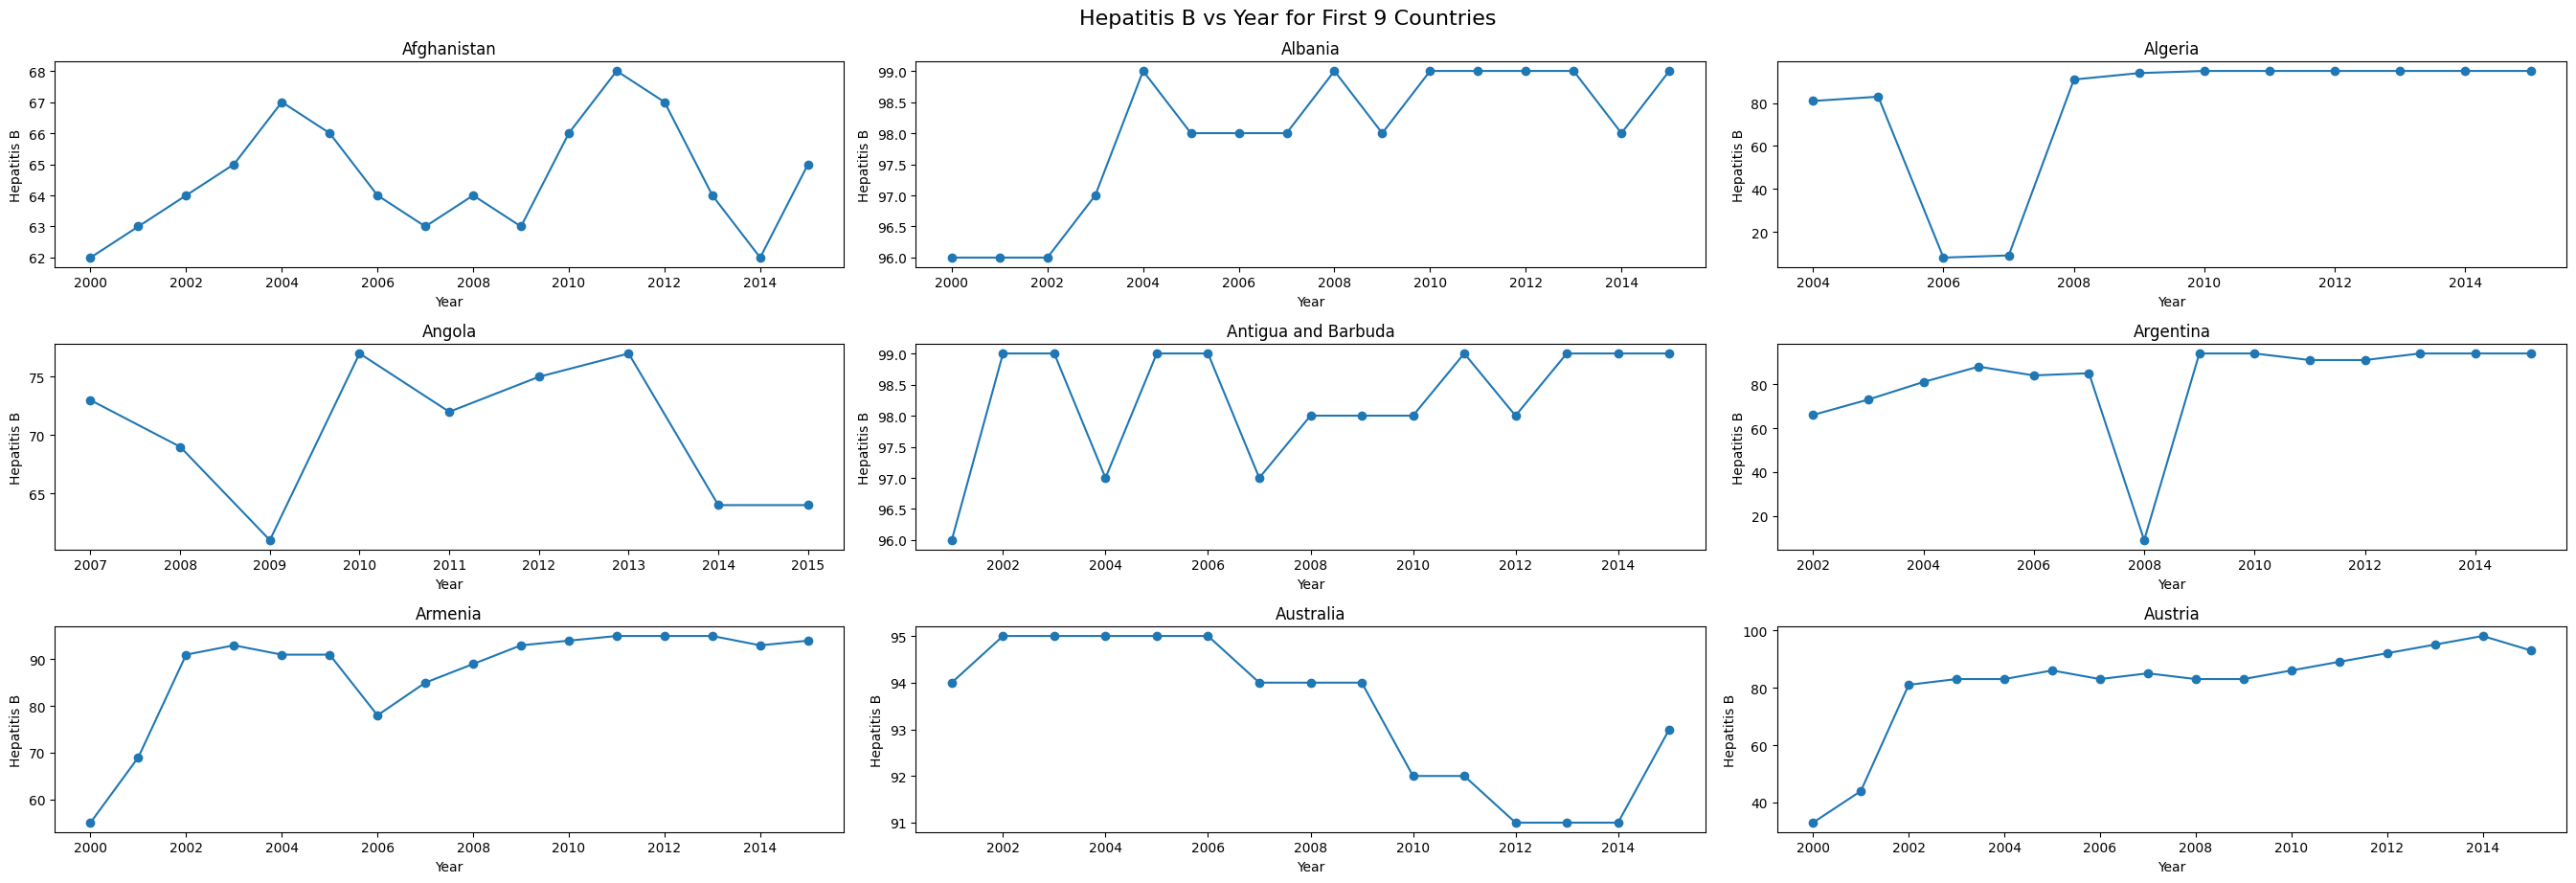

In [42]:
# Plot Hepatitis B vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Hepatitis B'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Hepatitis B')
    plt.tight_layout()

plt.suptitle('Hepatitis B vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()

This cell visualizes the trend of 'Hepatitis B' immunization rates over time for the first 9 countries in the dataset. By plotting these trends, it helps to identify country-specific patterns and gaps in the data, which can inform imputation and analysis strategies.

This visualization shows population trends over time for the first nine countries in the dataset. It provides a clear view of how populations have generally grown year by year, while also revealing irregularities such as sudden spikes, drops, or missing data. By highlighting these patterns, the plot helps identify potential data quality issues in the Population column and supports informed decisions on how missing or inconsistent values should be handled before further analysis.

In [43]:
# Show number of null values in 'Hepatitis B' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Hepatitis B'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
Finland                                                 16
Denmark                                                 16
Norway                                                  16
Slovenia                                                16
United Kingdom of Great Britain and Northern Ireland    16
                                                        ..
Guyana                                                   1
Mozambique                                               1
Grenada                                                  1
Panama                                                   1
Russian Federation                                       1
Name: Hepatitis B, Length: 98, dtype: int64

In [44]:
training_df_clean['Hepatitis B'].isnull().sum()

np.int64(553)

- Fill null values in 'Hepatitis B' with the median for each (Country, Year) group
- We choose median as it is less sensitive to outliers as compared to mean

In [45]:
# Fill null values in 'Hepatitis B' with the median for each (Country, Year) group
training_df_clean['Hepatitis B'] = training_df_clean.groupby(['Country', 'Year'])['Hepatitis B'].transform(
    lambda x: x.fillna(x.median())
)

c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtuale

In [46]:
# Fill remaining null values in 'Hepatitis B' with the median for each (Year) group
training_df_clean['Hepatitis B'] = training_df_clean.groupby([ 'Year'])['Hepatitis B'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\2902855879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Hepatitis B'] = training_df_clean.groupby([ 'Year'])['Hepatitis B'].transform(


In [47]:
training_df_clean['Hepatitis B'].isnull().sum()

np.int64(0)

### GDP

In [48]:
# percentage of null values in 'GDP' column
training_df_clean['GDP'].isnull().sum()/len(training_df_clean)*100


np.float64(15.129781420765026)

In [49]:
training_df_clean['GDP'].describe()

count      2485.000000
mean       7494.210719
std       14282.251492
min           1.681350
25%         463.852618
50%        1764.973870
75%        5932.899677
max      119172.741800
Name: GDP, dtype: float64

**Interpretation:**
- The GDP distribution is highly right-skewed, with a few countries/years having extremely high GDP values.
- Most countries have GDP between 464 and 5,933, with a median of 1,765.
- The very high standard deviation and max indicate the presence of significant outliers.
- The mean is much higher than the median, confirming the right-skewed nature of the data.

In [50]:
training_df_clean['GDP'].value_counts().sort_values(ascending=False)


GDP
584.259210    1
612.696514    1
631.744976    1
669.959000    1
63.537231     1
             ..
454.366654    1
453.351155    1
57.348340     1
548.587312    1
547.358878    1
Name: count, Length: 2485, dtype: int64

In [51]:
training_df_clean[training_df_clean['GDP'].isnull()].head()



Country  Year      Status  Life expectancy   Adult Mortality  \
160  Bahamas  2015  Developing              76.1            147.0   
161  Bahamas  2014  Developing              75.4             16.0   
162  Bahamas  2013  Developing              74.8            172.0   
163  Bahamas  2012  Developing              74.9            167.0   
164  Bahamas  2011  Developing              75.0            162.0   

     infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
160              0      NaN                     0.0         95.0         0   
161              0     9.45                     0.0         96.0         0   
162              0     9.42                     0.0         97.0         0   
163              0     9.50                     0.0         96.0         0   
164              0     9.34                     0.0         95.0         0   

     ...  under-five deaths   Polio  Total expenditure  Diphtheria   \
160  ...                   0   95.0                NaN         95.0   
161  ...                   0   96.0               7.74         96.0   
162  ...                   0   97.0               7.50         97.0   
163  ...                   0   99.0               7.43         98.0   
164  ...                   0   97.0               7.63         98.0   

      HIV/AIDS  GDP   thinness  1-19 years   thinness 5-9 years  \
160        0.1  NaN                    2.5                  2.5   
161        0.1  NaN                    2.5                  2.5   
162        0.1  NaN                    2.5                  2.5   
163        0.2  NaN                    2.5                  2.5   
164        0.1  NaN                    2.5                  2.5   

     Income composition of resources  Schooling  
160                            0.790       12.6  
161                            0.789       12.6  
162                            0.790       12.6  
163                            0.789       12.6  
164                            0.788       12.6  

[5 rows x 21 columns]

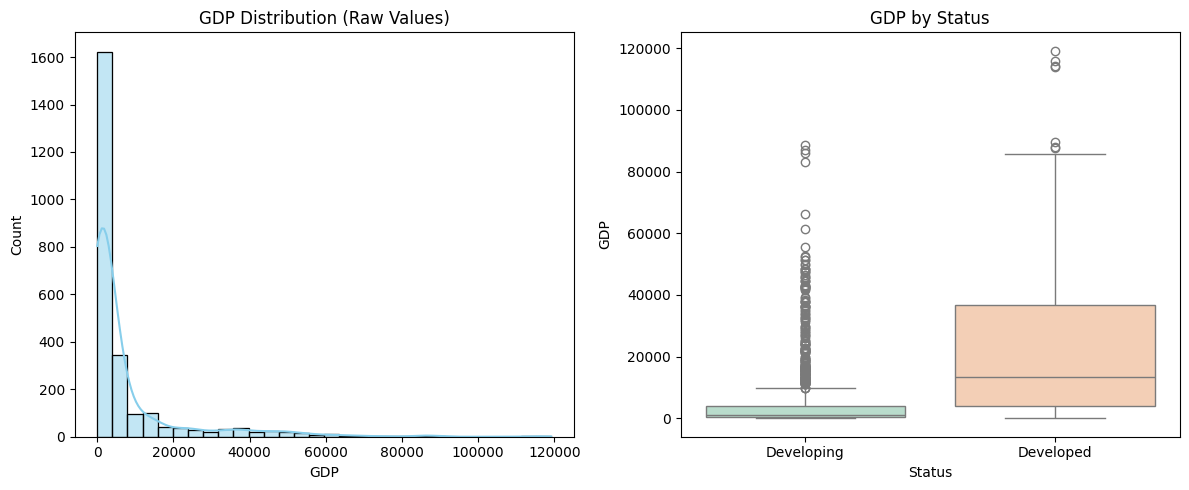

In [52]:
# Distribution & by-Status comparison for GDP
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (GDP raw)
sns.histplot(training_df_clean["GDP"], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("GDP Distribution (Raw Values)")
ax[0].set_xlabel("GDP")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y="GDP", palette="Pastel2", ax=ax[1])
ax[1].set_title("GDP by Status")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("GDP")

plt.tight_layout()
plt.show()

The distribution of GDP is highly skewed, with most countries clustered at lower GDP levels, while a few—mostly developed countries—report extremely high GDP values. Developed countries tend to have higher and more stable GDP levels, whereas developing countries show lower values with a larger spread and many outliers.

Importantly, higher GDP is generally associated with longer life expectancy, as greater economic resources enable better healthcare systems, improved infrastructure, and stronger public health programs. Conversely, countries with low GDP often also have lower life expectancy due to limited access to healthcare, education, and essential services.

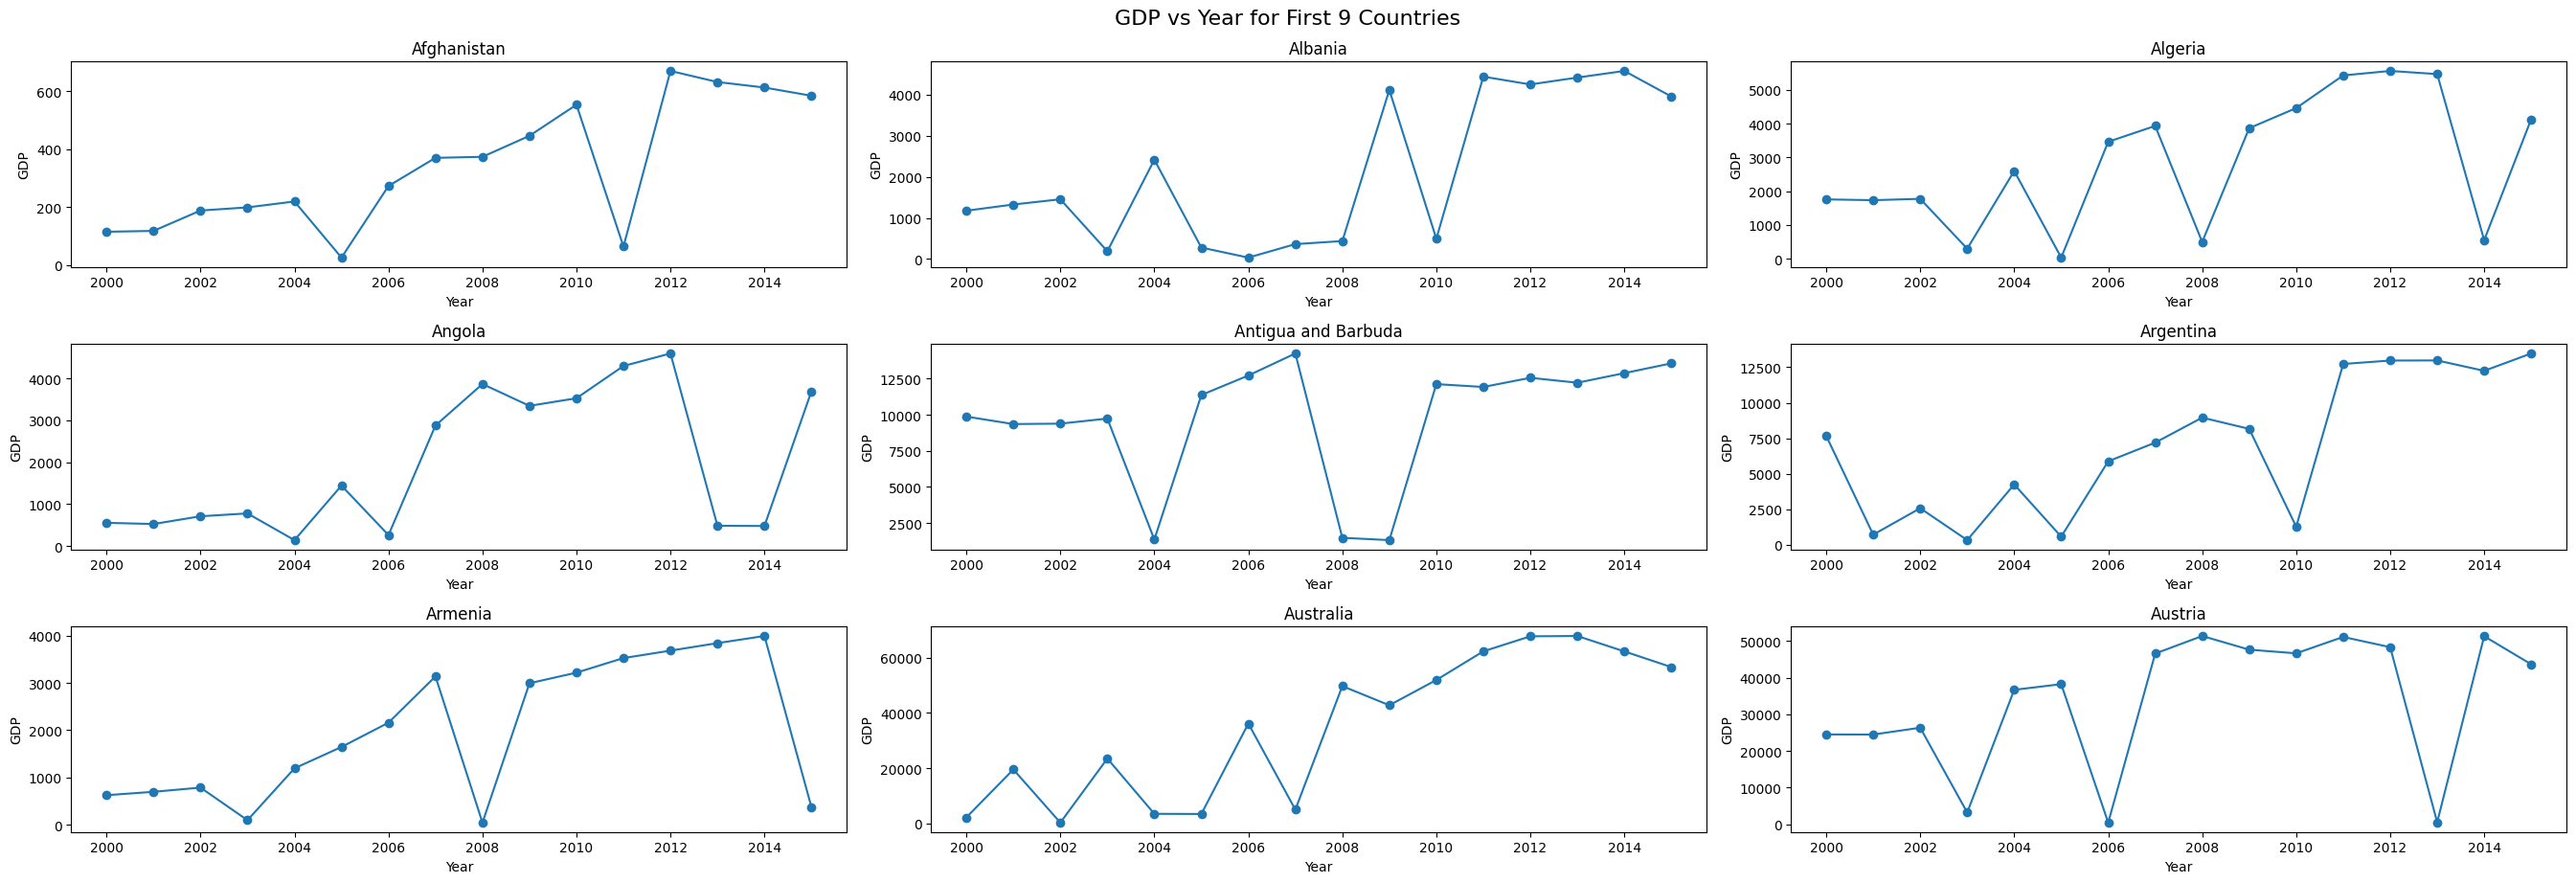

In [53]:

# Plot GDP vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.tight_layout()

plt.suptitle('GDP vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization shows GDP trends over time for the first nine countries in the dataset. It provides a clear view of how GDP has generally increased over the years, while also revealing irregularities such as sudden drops, sharp fluctuations, or missing data points. By highlighting these patterns, the plot helps identify potential data quality issues in the GDP column and supports informed decisions on how inconsistent values should be handled before further analysis.

In [54]:
# Show number of null values in 'GDP' column for each country
nulls_by_country = training_df_clean.groupby('Country')['GDP'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)


Country
Bahamas                                                 16
Bolivia (Plurinational State of)                        16
Congo                                                   16
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Egypt                                                   16
Gambia                                                  16
Micronesia (Federated States of)                        16
Iran (Islamic Republic of)                              16
Kyrgyzstan                                              16
Lao People's Democratic Republic                        16
Saint Vincent and the Grenadines                        16
Saint Lucia                                             16
Republic of Moldova                                     16
Republic of Korea                               

In [55]:
training_df_clean.GDP.isnull().sum()

np.int64(443)

In [56]:
# Fill null values in 'GDP' with the median for each (Country, Year) group
training_df_clean['GDP'] = training_df_clean.groupby(['Country', 'Year'])['GDP'].transform(
    lambda x: x.fillna(x.median())
)

c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtuale

In [57]:
# Fill the remaining by null values in 'GDP' with the median for each ( Year) group
training_df_clean['GDP'] = training_df_clean.groupby(['Year'])['GDP'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\3783107693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['GDP'] = training_df_clean.groupby(['Year'])['GDP'].transform(


In [58]:
training_df_clean.GDP.isnull().sum()

np.int64(0)

### Total Expenditure

In [59]:
# percentage of null values in 'Total expenditure' column
training_df_clean['Total expenditure'].isnull().sum()/len(training_df_clean)*100


np.float64(7.718579234972678)

In [60]:
training_df_clean['Total expenditure'].describe()


count    2702.000000
mean        5.930163
std         2.483273
min         0.370000
25%         4.260000
50%         5.750000
75%         7.490000
max        17.600000
Name: Total expenditure, dtype: float64

**Interpretation:**
- Most countries have total expenditure between 4.26 and 7.49, with a median of 5.75.
- The minimum value is very low, indicating some countries spend very little.
- The distribution is slightly right-skewed (mean > median), with a few high outliers.
- The standard deviation shows moderate spread, but the max is much higher than the 75th percentile, confirming the presence of outliers.

In [61]:
training_df_clean['Total expenditure'].value_counts().sort_values(ascending=False)


Total expenditure
4.60     15
6.70     12
5.60     11
9.10     10
5.25     10
         ..
7.14      1
11.93     1
2.72      1
7.31      1
17.14     1
Name: count, Length: 816, dtype: int64

In [62]:
training_df_clean[training_df_clean['Total expenditure'].isnull()].head()


Country  Year      Status  Life expectancy   Adult Mortality  \
32              Algeria  2015  Developing              75.6             19.0   
48               Angola  2015  Developing              52.4            335.0   
64  Antigua and Barbuda  2015  Developing              76.4             13.0   
80            Argentina  2015  Developing              76.3            116.0   
96              Armenia  2015  Developing              74.8            118.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
32             21      NaN                     0.0         95.0        63   
48             66      NaN                     0.0         64.0       118   
64              0      NaN                     0.0         99.0         0   
80              8      NaN                     0.0         94.0         0   
96              1      NaN                     0.0         94.0        33   

    ...  under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
32  ...                  24   95.0                NaN         95.0        0.1   
48  ...                  98    7.0                NaN         64.0        1.9   
64  ...                   0   86.0                NaN         99.0        0.2   
80  ...                   9   93.0                NaN         94.0        0.1   
96  ...                   1   96.0                NaN         94.0        0.1   

             GDP   thinness  1-19 years   thinness 5-9 years  \
32   4132.762920                    6.0                  5.8   
48   3695.793748                    8.3                  8.2   
64  13566.954100                    3.3                  3.3   
80  13467.123600                    1.0                  0.9   
96    369.654776                    2.1                  2.2   

    Income composition of resources  Schooling  
32                            0.743       14.4  
48                            0.531       11.4  
64                            0.784       13.9  
80                            0.826       17.3  
96                            0.741       12.7  

[5 rows x 21 columns]

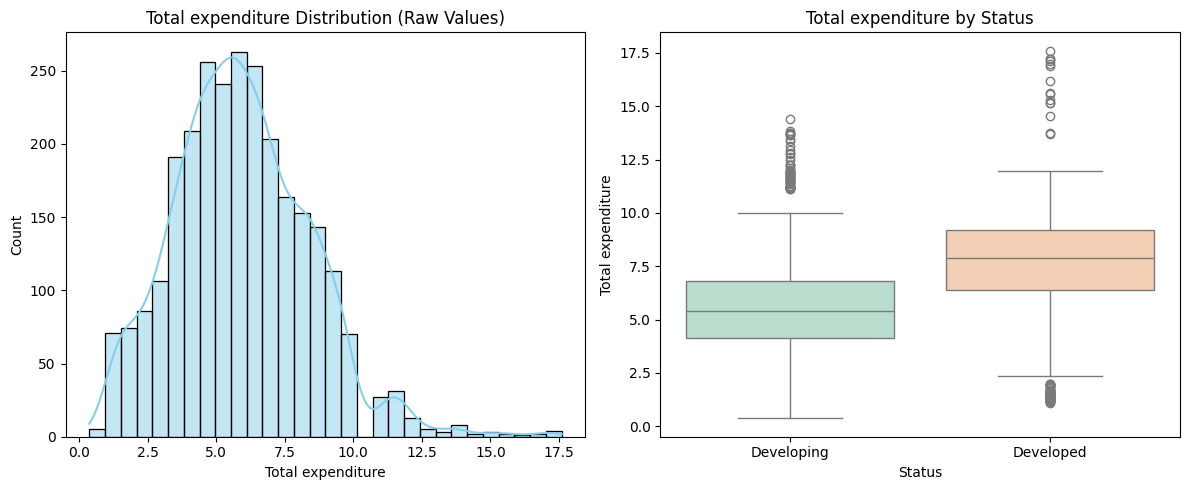

In [63]:
# Distribution & by-Status comparison for Total expenditure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (Total expenditure raw)
sns.histplot(training_df_clean["Total expenditure"], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("Total expenditure Distribution (Raw Values)")
ax[0].set_xlabel("Total expenditure")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y="Total expenditure", palette="Pastel2", ax=ax[1])
ax[1].set_title("Total expenditure by Status")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("Total expenditure")

plt.tight_layout()
plt.show()

This cell creates a bar plot showing the distribution of 'Total expenditure' values, binned into 10 equal-width intervals. The visualization helps to understand the spread and frequency of health expenditure data, which is useful for detecting outliers and planning imputation strategies.

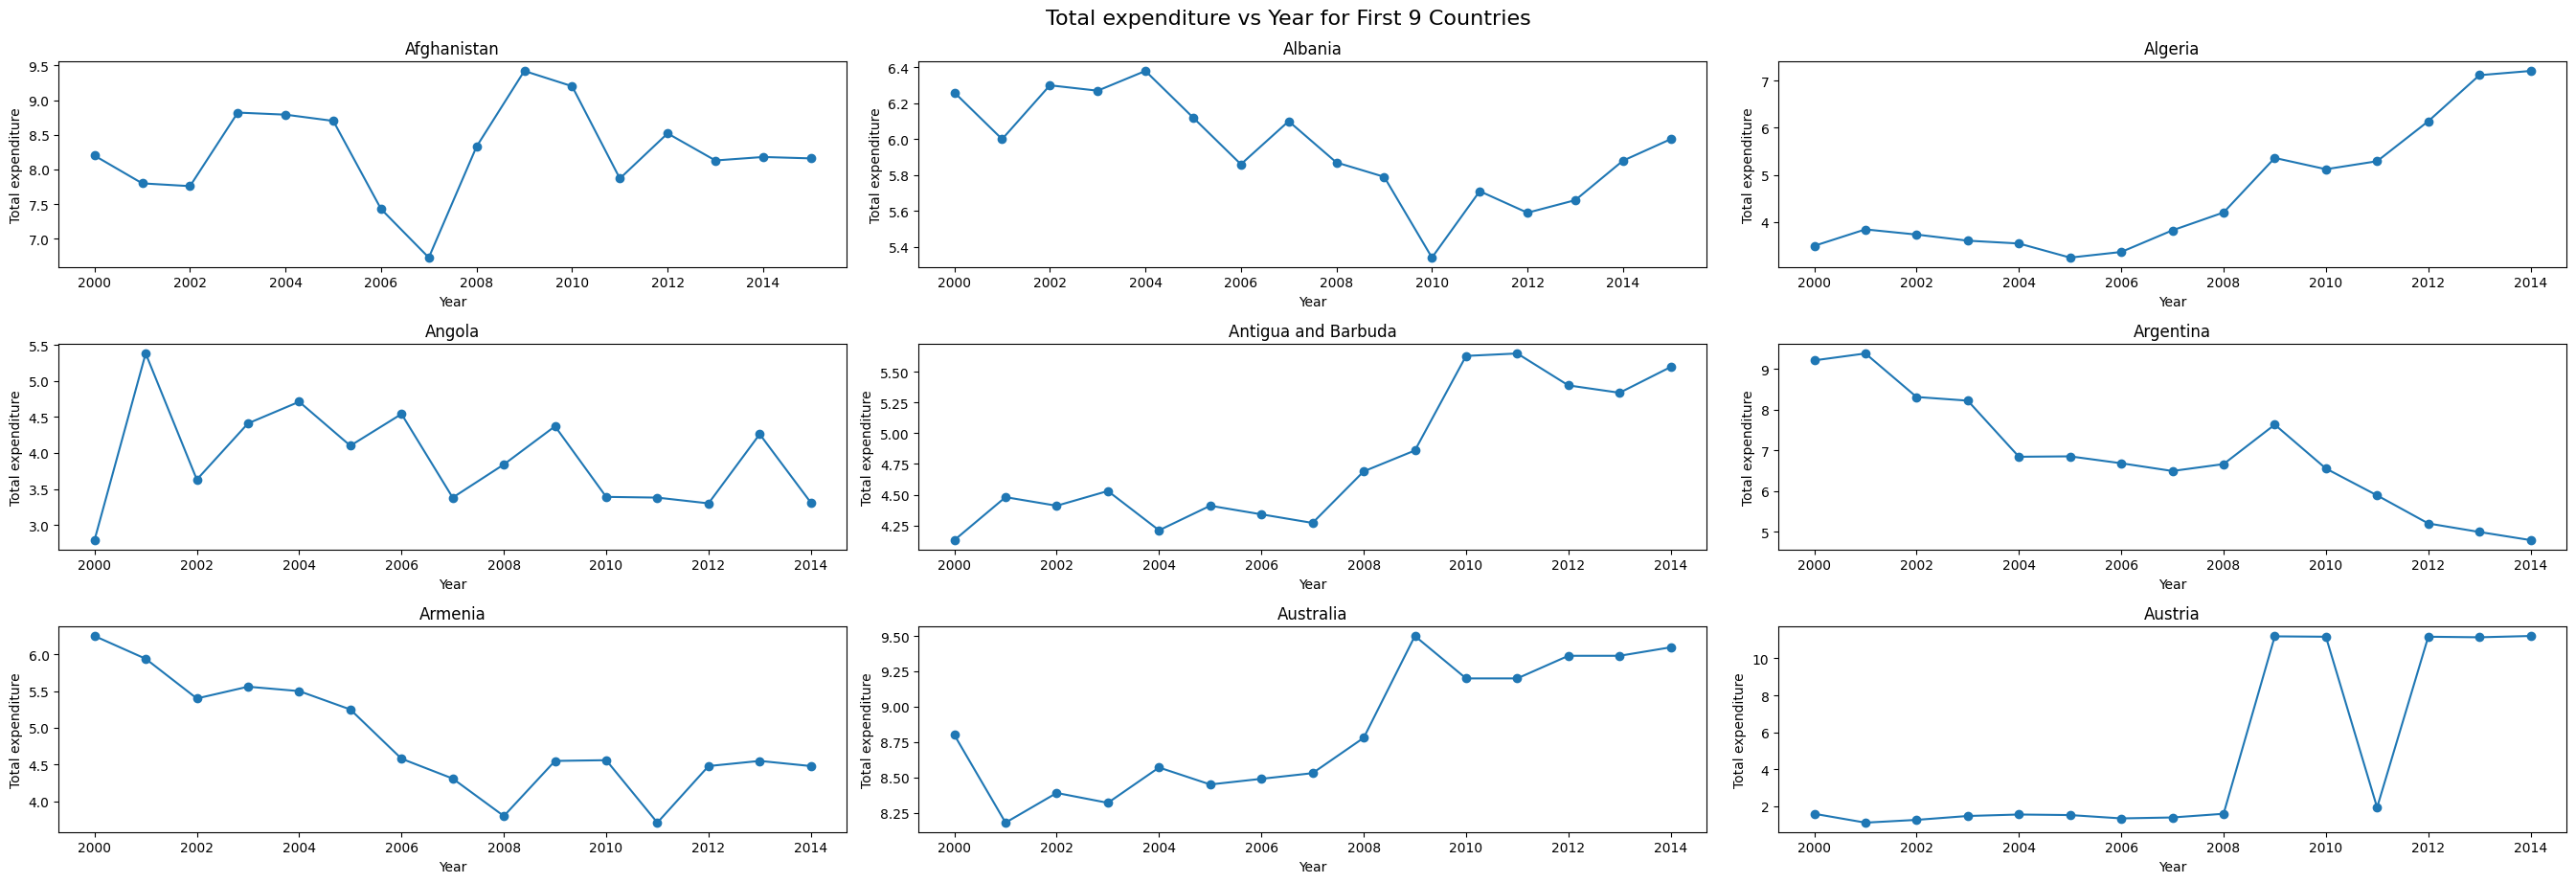

In [64]:

# Plot Total expenditure vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total expenditure'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Total expenditure')
    plt.tight_layout()

plt.suptitle('Total expenditure vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization shows total expenditure trends over time for the first nine countries in the dataset. It provides a clear view of how health expenditure has changed across years, while also revealing irregularities such as sudden jumps, declines, or missing data points. By highlighting these patterns, the plot helps identify potential data quality issues in the Total Expenditure column and supports informed decisions on how inconsistent values should be handled before further analysis.

In [65]:

# Show number of null values in 'Total expenditure' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Total expenditure'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
Democratic People's Republic of Korea    16
Somalia                                  16
South Sudan                              13
Iraq                                      4
Angola                                    1
                                         ..
Venezuela (Bolivarian Republic of)        1
Viet Nam                                  1
Yemen                                     1
Zambia                                    1
Zimbabwe                                  1
Name: Total expenditure, Length: 181, dtype: int64

In [66]:
training_df_clean['Total expenditure'].isnull().sum()

np.int64(226)

In [67]:
# Fill null values in 'Total expenditure' with the median for each (Country, Year) group
training_df_clean['Total expenditure'] = training_df_clean.groupby(['Country', 'Year'])['Total expenditure'].transform(
    lambda x: x.fillna(x.median())
)

c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtuale

In [68]:
# Fill null values in 'Total expenditure' with the median for each (Country, Year) group
training_df_clean['Total expenditure'] = training_df_clean.groupby(['Country'])['Total expenditure'].transform(
    lambda x: x.fillna(x.median())
)

c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\life-expectancy-PaMNMO7O-py3.13\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\agama\AppData\Local\Temp\ipykernel_7376\2956390935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Total expenditure'] = training_df_clean.groupby(['Country'])['Total expenditure'].transform(


In [69]:
# Fill null values in 'Total expenditure' with the median for each (Year) group
training_df_clean['Total expenditure'] = training_df_clean.groupby([ 'Year'])['Total expenditure'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\68199309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Total expenditure'] = training_df_clean.groupby([ 'Year'])['Total expenditure'].transform(


In [70]:
training_df_clean['Total expenditure'].isnull().sum()

np.int64(0)

### Alcohol

In [71]:
# percentage of null values in 'Alcohol' column
training_df_clean['Alcohol'].isnull().sum()/len(training_df_clean)*100

np.float64(6.591530054644809)

In [72]:

training_df_clean['Alcohol'].describe()

count    2735.000000
mean        4.614856
std         4.050749
min         0.010000
25%         0.905000
50%         3.770000
75%         7.715000
max        17.870000
Name: Alcohol, dtype: float64

**Interpretation:**
- Most countries have alcohol consumption between 0.91 and 7.72, with a median of 3.77.
- The minimum value is close to zero, indicating some countries have almost no alcohol consumption.
- The distribution is right-skewed (mean > median), with a few countries/years having very high consumption.
- The high standard deviation and max confirm the presence of significant outliers.

In [73]:

training_df_clean['Alcohol'].value_counts().sort_values(ascending=False)

Alcohol
0.01    280
0.03     15
0.04     13
0.09     12
0.02     12
       ... 
5.85      1
7.73      1
2.57      1
2.59      1
2.70      1
Name: count, Length: 1076, dtype: int64

In [74]:

training_df_clean[training_df_clean['Alcohol'].isnull()].head()

Country  Year      Status  Life expectancy   Adult Mortality  \
32              Algeria  2015  Developing              75.6             19.0   
48               Angola  2015  Developing              52.4            335.0   
64  Antigua and Barbuda  2015  Developing              76.4             13.0   
80            Argentina  2015  Developing              76.3            116.0   
96              Armenia  2015  Developing              74.8            118.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
32             21      NaN                     0.0         95.0        63   
48             66      NaN                     0.0         64.0       118   
64              0      NaN                     0.0         99.0         0   
80              8      NaN                     0.0         94.0         0   
96              1      NaN                     0.0         94.0        33   

    ...  under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
32  ...                  24   95.0               3.84         95.0        0.1   
48  ...                  98    7.0               3.84         64.0        1.9   
64  ...                   0   86.0               4.53         99.0        0.2   
80  ...                   9   93.0               6.68         94.0        0.1   
96  ...                   1   96.0               4.56         94.0        0.1   

             GDP   thinness  1-19 years   thinness 5-9 years  \
32   4132.762920                    6.0                  5.8   
48   3695.793748                    8.3                  8.2   
64  13566.954100                    3.3                  3.3   
80  13467.123600                    1.0                  0.9   
96    369.654776                    2.1                  2.2   

    Income composition of resources  Schooling  
32                            0.743       14.4  
48                            0.531       11.4  
64                            0.784       13.9  
80                            0.826       17.3  
96                            0.741       12.7  

[5 rows x 21 columns]

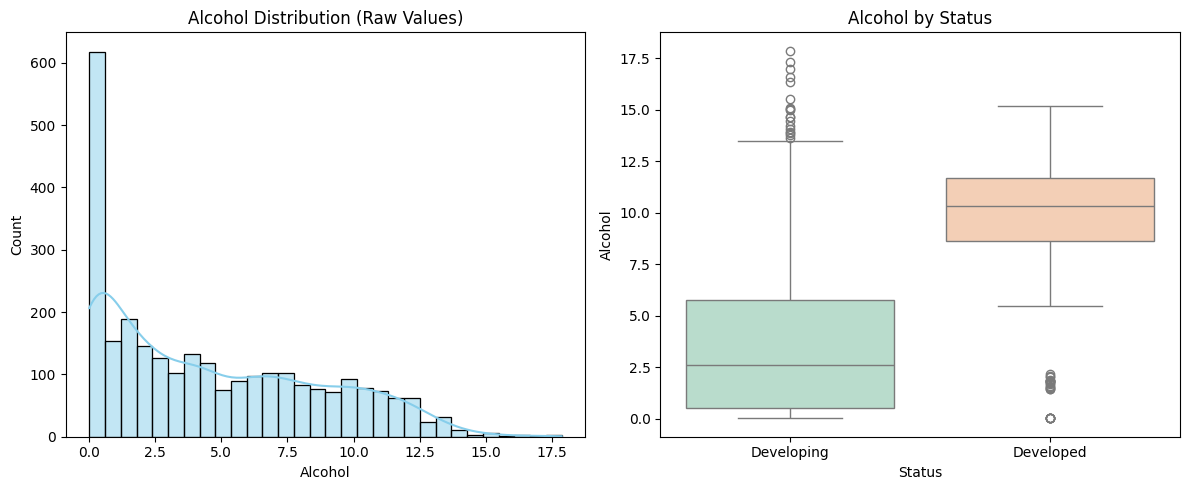

In [75]:
# Distribution & by-Status comparison for Alcohol
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (Alcohol raw)
sns.histplot(training_df_clean["Alcohol"], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("Alcohol Distribution (Raw Values)")
ax[0].set_xlabel("Alcohol")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y="Alcohol", palette="Pastel2", ax=ax[1])
ax[1].set_title("Alcohol by Status")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("Alcohol")

plt.tight_layout()
plt.show()

The distribution of alcohol consumption is skewed, with most countries recording relatively low values, while a smaller group—mainly developed countries—show much higher levels of alcohol consumption. Developed countries tend to have higher and more consistent alcohol consumption, while developing countries display greater variability with many low outliers.

Importantly, higher alcohol consumption is generally associated with shorter life expectancy, since excessive intake increases the risk of chronic diseases, accidents, and other health issues. Conversely, countries with lower alcohol consumption often show longer life expectancy, as reduced alcohol-related health risks contribute positively to overall public health outcomes.

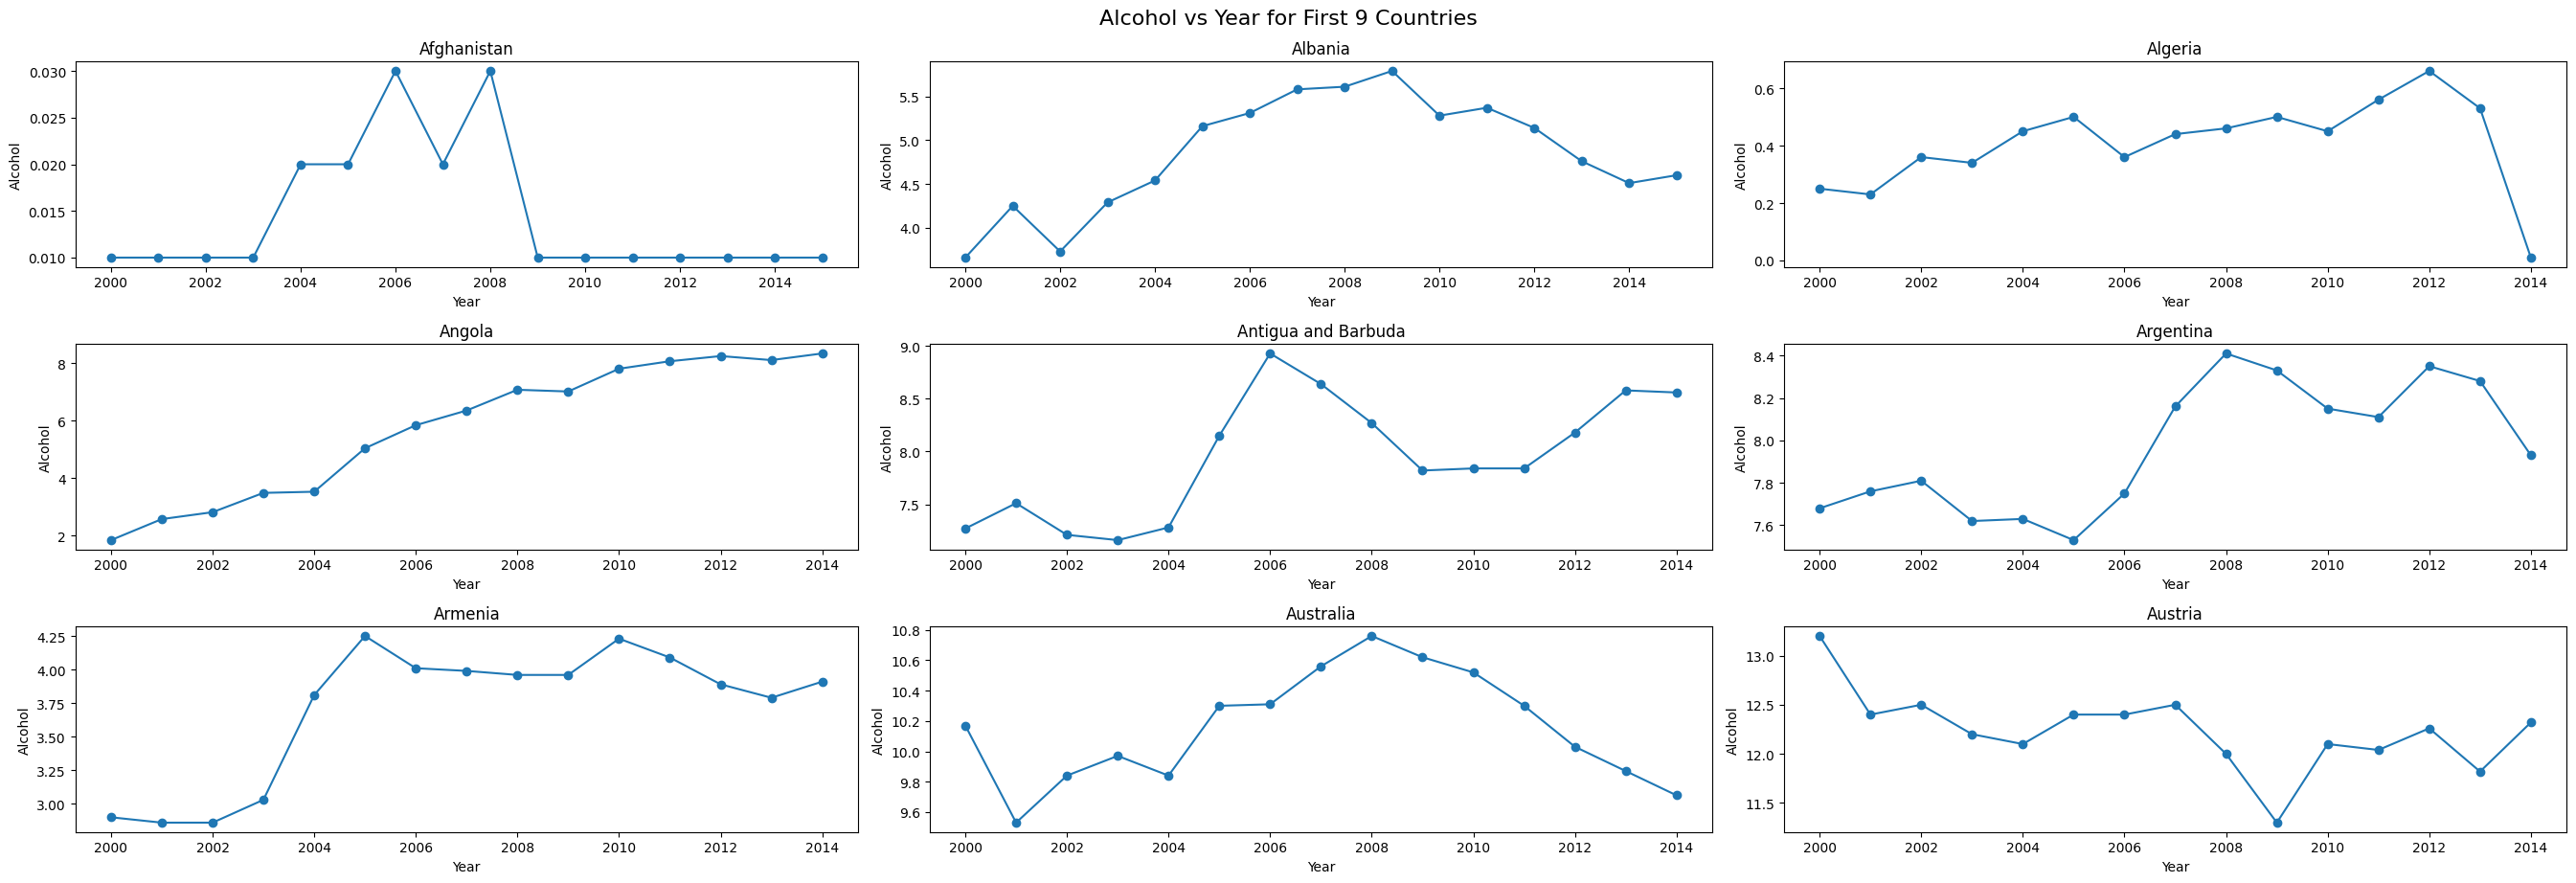

In [76]:
# Plot Alcohol vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Alcohol'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Alcohol')
    plt.tight_layout()

plt.suptitle('Alcohol vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization shows alcohol consumption trends over time for the first nine countries in the dataset. It provides a clear view of how alcohol use has changed across years, while also revealing irregularities such as sudden spikes, declines, or missing data points. By highlighting these patterns, the plot helps identify potential data quality issues in the Alcohol column and supports informed decisions on how inconsistent values should be handled before further analysis.

In [77]:
# Show number of null values in 'Alcohol' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Alcohol'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
South Sudan                           16
Montenegro                             2
Antigua and Barbuda                    1
Angola                                 1
Armenia                                1
                                      ..
Venezuela (Bolivarian Republic of)     1
Viet Nam                               1
Yemen                                  1
Zambia                                 1
Zimbabwe                               1
Name: Alcohol, Length: 177, dtype: int64

In [78]:
training_df_clean['Alcohol'].isnull().sum()

np.int64(193)

In [79]:
# Fill null values in 'Alcohol' with the median for each (Country, Year) group
training_df_clean['Alcohol'] = training_df_clean.groupby([ 'Year'])['Alcohol'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\1456220145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Alcohol'] = training_df_clean.groupby([ 'Year'])['Alcohol'].transform(


In [80]:
training_df_clean['Alcohol'].isnull().sum()

np.int64(0)

### Schooling

In [81]:
# percentage of null values in 'Schooling' column
training_df_clean['Schooling'].isnull().sum()/len(training_df_clean)*100

np.float64(5.46448087431694)

In [82]:
training_df_clean['Schooling'].describe()

count    2768.000000
mean       11.999639
std         3.346440
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64

**Insights on 'Schooling' Feature:**

- This summary provides descriptive statistics for the 'Schooling' column, including count, mean, standard deviation, min, max, and quartiles.
- The range and spread of values indicate differences in years of education across countries and years.
- Outliers and missing values should be addressed for accurate modeling.
- Use this information to guide imputation, transformation, and feature engineering for educational attainment.

In [83]:

training_df_clean['Schooling'].value_counts().sort_values(ascending=False)

Schooling
12.9    58
13.3    52
12.5    49
12.8    46
12.3    44
        ..
18.9     1
4.2      1
3.1      1
3.0      1
2.8      1
Name: count, Length: 173, dtype: int64

In [84]:

training_df_clean[training_df_clean['Schooling'].isnull()].head()

Country  Year      Status  Life expectancy   Adult Mortality  \
432  Côte d'Ivoire  2015  Developing              53.3            397.0   
433  Côte d'Ivoire  2014  Developing              52.8             47.0   
434  Côte d'Ivoire  2013  Developing              52.3            412.0   
435  Côte d'Ivoire  2012  Developing              52.0            415.0   
436  Côte d'Ivoire  2011  Developing              51.7            419.0   

     infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
432             57    5.285                     0.0         83.0        65   
433             58    0.010                     0.0         76.0        50   
434             59    3.150                     0.0          8.0        48   
435             59    3.240                     0.0         82.0       137   
436             60    3.130                     0.0         62.0       628   

     ...  under-five deaths   Polio  Total expenditure  Diphtheria   \
432  ...                  79   81.0               5.87         83.0   
433  ...                  80   76.0               5.72         76.0   
434  ...                  81   79.0               5.81          8.0   
435  ...                  82   83.0               6.14         82.0   
436  ...                  83   58.0               6.42         62.0   

      HIV/AIDS          GDP   thinness  1-19 years   thinness 5-9 years  \
432        1.9  2916.228918                    5.5                  5.5   
433        2.0  3154.513484                    5.6                  5.6   
434        2.4  2393.188800                    5.8                  5.7   
435        2.9  4067.405225                    5.9                  5.9   
436        3.3  3231.881068                    6.1                  6.0   

     Income composition of resources  Schooling  
432                              NaN        NaN  
433                              NaN        NaN  
434                              NaN        NaN  
435                              NaN        NaN  
436                              NaN        NaN  

[5 rows x 21 columns]

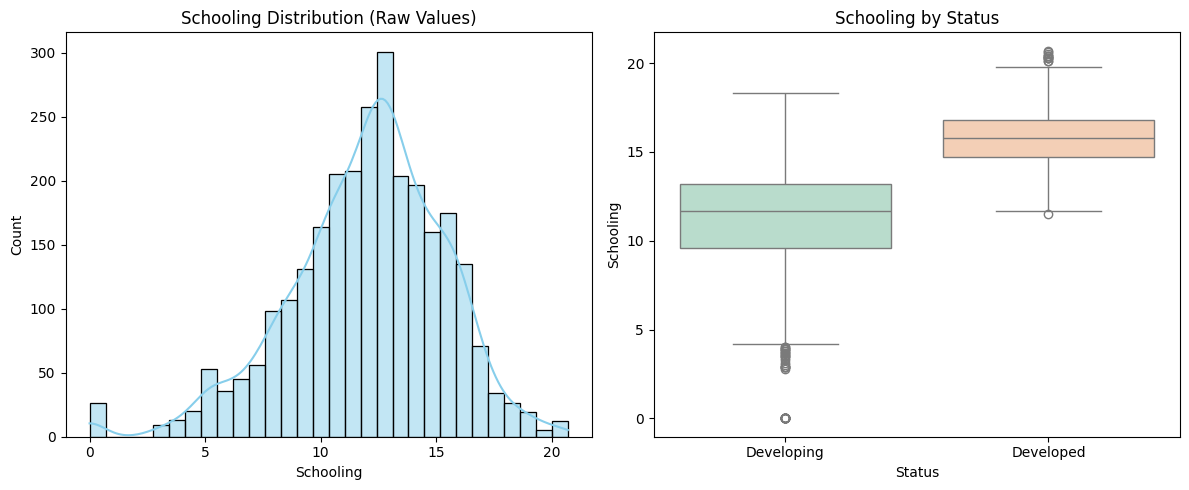

In [85]:
# Distribution & by-Status comparison for Schooling
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (Schooling raw)
sns.histplot(training_df_clean["Schooling"], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("Schooling Distribution (Raw Values)")
ax[0].set_xlabel("Schooling")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y="Schooling", palette="Pastel2", ax=ax[1])
ax[1].set_title("Schooling by Status")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("Schooling")

plt.tight_layout()
plt.show()

The distribution of schooling is moderately skewed, with most countries clustered around medium-to-high schooling years (10–15), while a few—mainly developing countries—show much lower schooling values. Developed countries tend to have consistently higher schooling levels, while developing countries display greater variability and more outliers.

Importantly, higher schooling levels are generally associated with longer life expectancy, since education improves health awareness, increases access to better jobs and income, and strengthens overall social development. Conversely, countries with lower schooling often also experience lower life expectancy due to limited opportunities, poorer health literacy, and weaker public infrastructure.

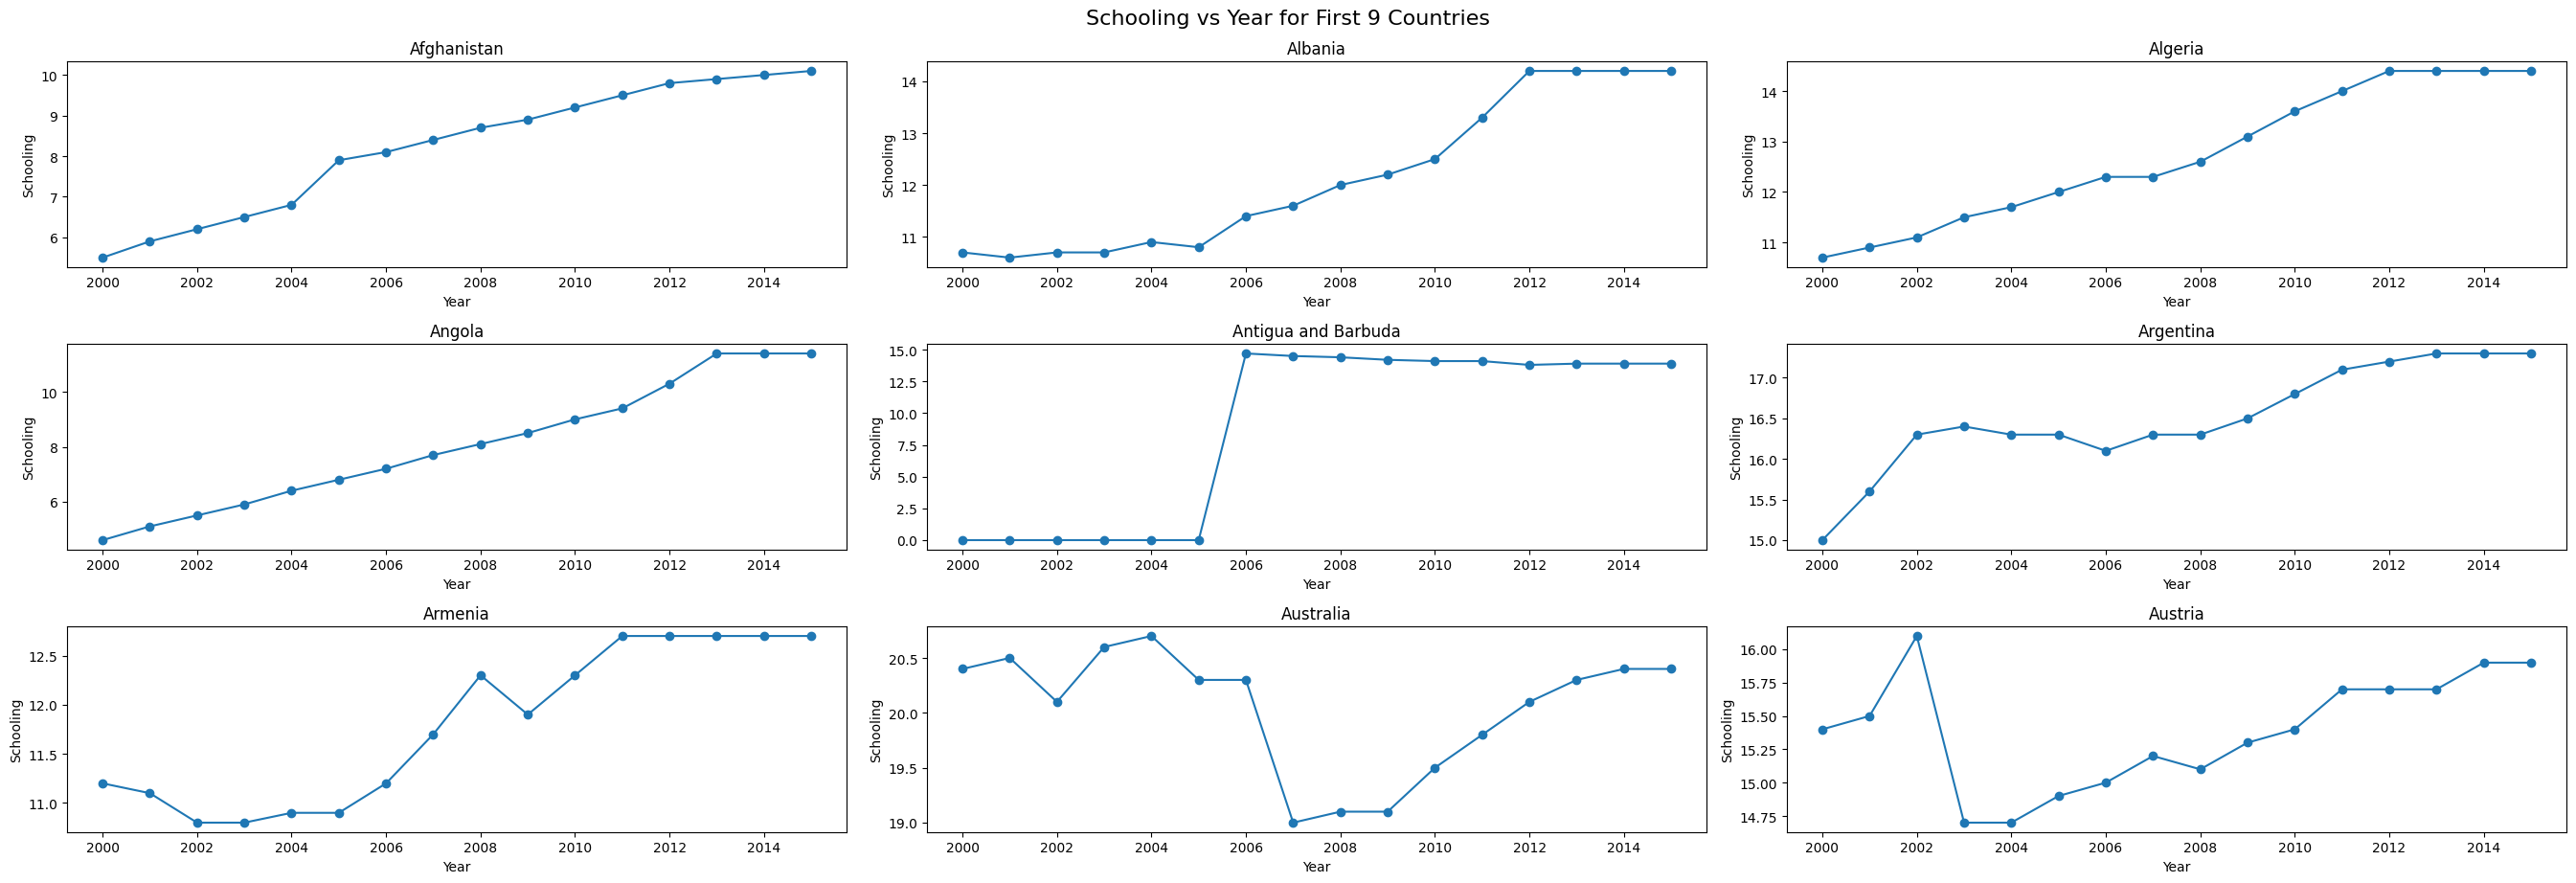

In [86]:

# Plot Schooling vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Schooling'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Schooling')
    plt.tight_layout()

plt.suptitle('Schooling vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization presents schooling trends over time for the first nine countries in the dataset. It illustrates how the average years of schooling have generally increased, especially in developing countries, reflecting gradual improvements in access to education. At the same time, the plots reveal irregularities such as sudden jumps, plateaus, or missing values that may point to data quality issues or inconsistencies in reporting. By highlighting these patterns, the visualization not only tracks long-term educational progress but also supports careful consideration of how schooling data should be treated before deeper analysis.

In [87]:

# Show number of null values in 'Schooling' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Schooling'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Republic of Korea                                       16
Republic of Moldova                                     16
Somalia                                                 16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             16
United States of America                                16
Name: Schooling, dtype: int64

In [88]:
training_df_clean['Alcohol'].isnull().sum()

np.int64(0)

In [89]:
# Fill null values in 'Schooling' with the median for each (Country, Year) group
training_df_clean['Schooling'] = training_df_clean.groupby([ 'Year'])['Schooling'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\2152562532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Schooling'] = training_df_clean.groupby([ 'Year'])['Schooling'].transform(


In [90]:
training_df_clean['Alcohol'].isnull().sum()

np.int64(0)

### Income Composition of Resources

In [91]:
# percentage of null values in 'Income composition of resources' column
training_df_clean['Income composition of resources'].isnull().sum()/len(training_df_clean)*100

np.float64(5.46448087431694)

In [92]:

training_df_clean['Income composition of resources'].describe()

count    2768.000000
mean        0.627419
std         0.210978
min         0.000000
25%         0.493000
50%         0.677000
75%         0.779250
max         0.948000
Name: Income composition of resources, dtype: float64


**Interpretation:**
- Most countries have an income composition index between 0.49 and 0.78, with a median of 0.68.
- The minimum value of 0 suggests some countries have very poor resource composition.
- The distribution is slightly left-skewed (median > mean), and there are no outliers above 0.95.
- The spread (std) is moderate, indicating some variability across countries.

In [93]:

training_df_clean['Income composition of resources'].value_counts().sort_values(ascending=False)

Income composition of resources
0.000    130
0.700     17
0.739     13
0.714     12
0.636     12
        ... 
0.367      1
0.348      1
0.302      1
0.292      1
0.842      1
Name: count, Length: 625, dtype: int64

In [94]:

training_df_clean[training_df_clean['Income composition of resources'].isnull()].head()

Country  Year      Status  Life expectancy   Adult Mortality  \
432  Côte d'Ivoire  2015  Developing              53.3            397.0   
433  Côte d'Ivoire  2014  Developing              52.8             47.0   
434  Côte d'Ivoire  2013  Developing              52.3            412.0   
435  Côte d'Ivoire  2012  Developing              52.0            415.0   
436  Côte d'Ivoire  2011  Developing              51.7            419.0   

     infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
432             57    5.285                     0.0         83.0        65   
433             58    0.010                     0.0         76.0        50   
434             59    3.150                     0.0          8.0        48   
435             59    3.240                     0.0         82.0       137   
436             60    3.130                     0.0         62.0       628   

     ...  under-five deaths   Polio  Total expenditure  Diphtheria   \
432  ...                  79   81.0               5.87         83.0   
433  ...                  80   76.0               5.72         76.0   
434  ...                  81   79.0               5.81          8.0   
435  ...                  82   83.0               6.14         82.0   
436  ...                  83   58.0               6.42         62.0   

      HIV/AIDS          GDP   thinness  1-19 years   thinness 5-9 years  \
432        1.9  2916.228918                    5.5                  5.5   
433        2.0  3154.513484                    5.6                  5.6   
434        2.4  2393.188800                    5.8                  5.7   
435        2.9  4067.405225                    5.9                  5.9   
436        3.3  3231.881068                    6.1                  6.0   

     Income composition of resources  Schooling  
432                              NaN       13.1  
433                              NaN       13.0  
434                              NaN       12.9  
435                              NaN       12.9  
436                              NaN       12.9  

[5 rows x 21 columns]

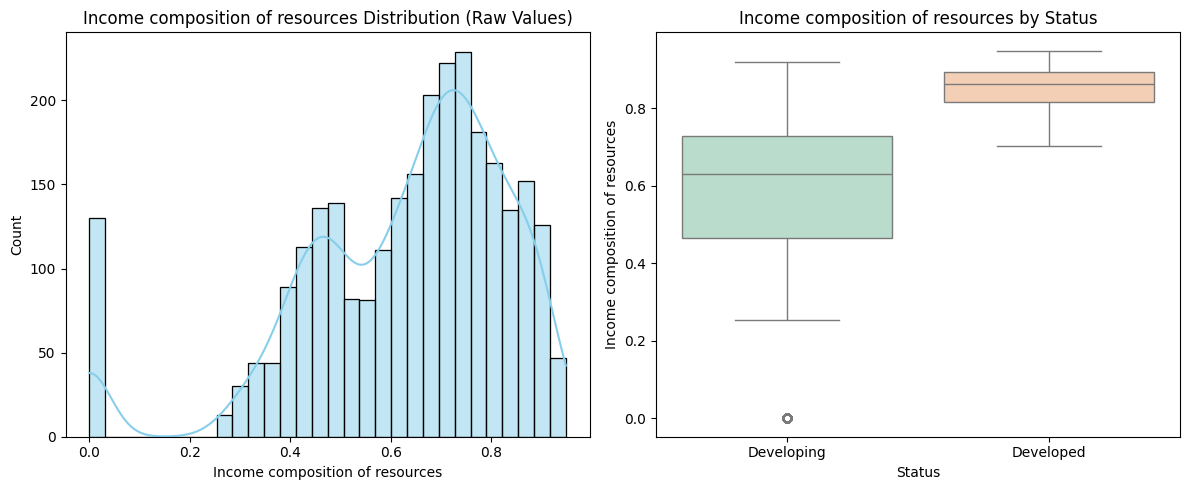

In [95]:
# Distribution & by-Status comparison for Income composition of resources
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (Income composition of resources raw)
sns.histplot(training_df_clean["Income composition of resources"], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("Income composition of resources Distribution (Raw Values)")
ax[0].set_xlabel("Income composition of resources")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y="Income composition of resources", palette="Pastel2", ax=ax[1])
ax[1].set_title("Income composition of resources by Status")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("Income composition of resources")

plt.tight_layout()
plt.show()

The distribution of income composition of resources is moderately skewed, with most countries clustered in the mid-to-high range (0.4–0.8), while a few—mainly developing countries—show much lower values. Developed countries tend to have consistently higher and more stable resource composition, while developing countries display greater variability and several outliers.

Importantly, a stronger income composition of resources is generally associated with longer life expectancy, since diversified and well-managed resources support better economic stability, access to healthcare, and improved living conditions. Conversely, countries with weaker resource composition often also face lower life expectancy due to economic vulnerability, limited access to essential services, and weaker infrastructure.

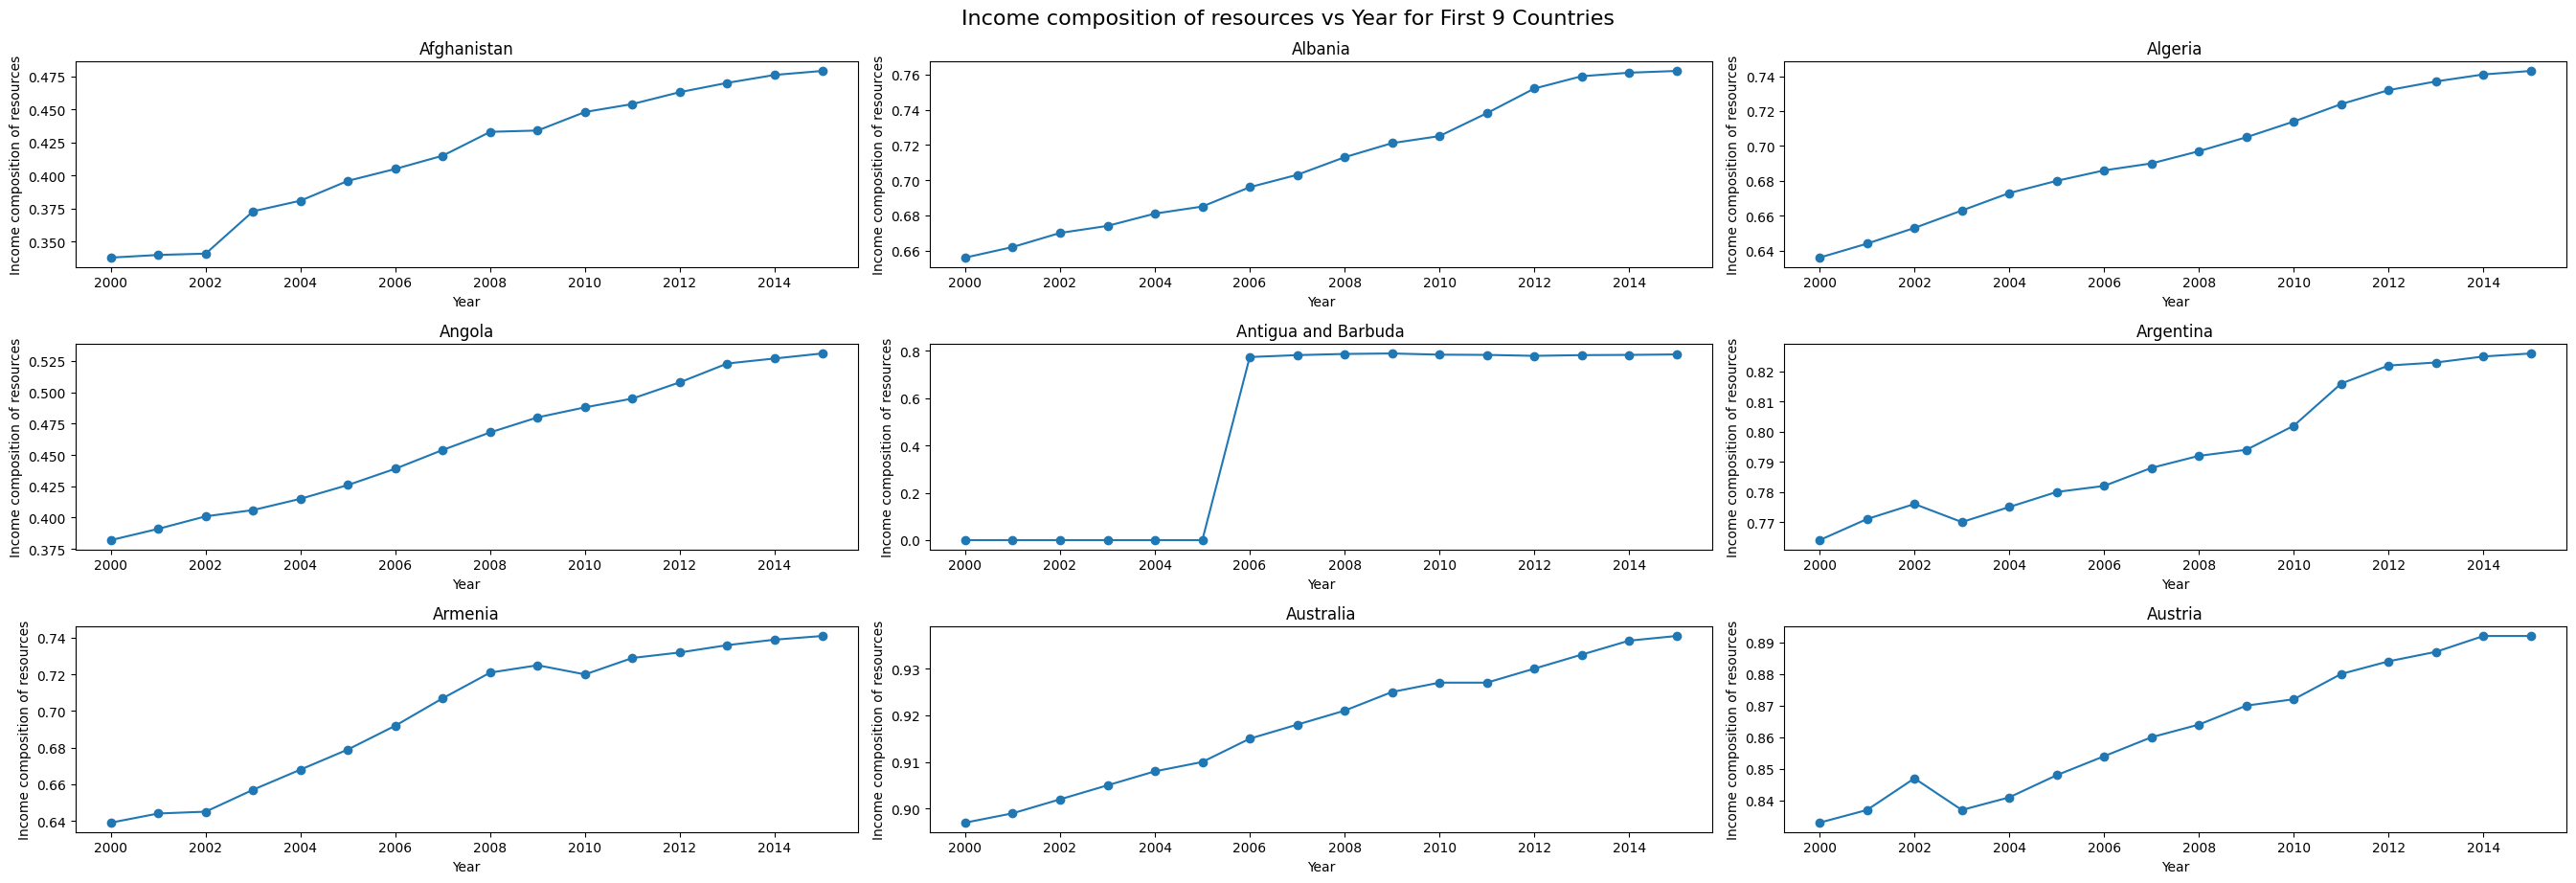

In [96]:

# Plot Income composition of resources vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Income composition of resources'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Income composition of resources')
    plt.tight_layout()

plt.suptitle('Income composition of resources vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization illustrates income composition of resources trends over time for the first nine countries in the dataset. It shows a general upward movement for most countries, suggesting improvements in economic stability and diversification of resources. At the same time, the plots highlight irregularities such as sudden shifts, flat periods, or potential missing values that may indicate data quality concerns. By capturing these patterns, the visualization not only demonstrates long-term economic progress but also underscores the importance of carefully addressing inconsistencies in the Income Composition of Resources column before conducting further analysis.

In [97]:

# Show number of null values in 'Income composition of resources' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Income composition of resources'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Republic of Korea                                       16
Republic of Moldova                                     16
Somalia                                                 16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             16
United States of America                                16
Name: Income composition of resources, dtype: int64

In [98]:
training_df_clean['Income composition of resources'].isnull().sum()

np.int64(160)

In [99]:
# Fill null values in 'Income composition of resources' with the median for each (Country, Year) group
training_df_clean['Income composition of resources'] = training_df_clean.groupby([ 'Year'])['Income composition of resources'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\616848210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Income composition of resources'] = training_df_clean.groupby([ 'Year'])['Income composition of resources'].transform(


In [100]:
training_df_clean['Income composition of resources'].isnull().sum()

np.int64(0)

### BMI

In [101]:
# percentage of null values in ' BMI ' column
training_df_clean[' BMI '].isnull().sum()/len(training_df_clean)*100

np.float64(1.092896174863388)

In [102]:
training_df_clean[' BMI '].describe()

count    2896.000000
mean       38.235394
std        19.959590
min         1.000000
25%        19.300000
50%        43.350000
75%        56.100000
max        77.600000
Name:  BMI , dtype: float64

**Interpretation:**
- Most countries have BMI between 19.3 and 56.1, with a median of 43.35.
- The minimum value is extremely low, possibly indicating data entry errors or special cases.
- The distribution is right-skewed (mean < median), with a few very high BMI values.
- The high standard deviation and max confirm the presence of significant outliers.

In [103]:

training_df_clean[' BMI '].value_counts().sort_values(ascending=False)

 BMI 
58.5    18
57.0    16
55.8    16
54.2    15
59.9    15
        ..
9.6      1
9.2      1
35.1     1
34.5     1
33.9     1
Name: count, Length: 602, dtype: int64

In [104]:

training_df_clean[training_df_clean[' BMI '].isnull()].head()

Country  Year      Status  Life expectancy   Adult Mortality  \
2409  South Sudan  2015  Developing              57.3            332.0   
2410  South Sudan  2014  Developing              56.6            343.0   
2411  South Sudan  2013  Developing              56.4            345.0   
2412  South Sudan  2012  Developing              56.0            347.0   
2413  South Sudan  2011  Developing              55.4            355.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2409             26    5.285                0.000000         31.0       878   
2410             26    0.320               46.074469         93.0       441   
2411             26    2.810               47.444530         93.0       525   
2412             26    2.890               38.338232         94.0      1952   
2413             27    4.065                0.000000         93.0      1256   

      ...  under-five deaths   Polio  Total expenditure  Diphtheria   \
2409  ...                  39   41.0               2.74         31.0   
2410  ...                  39   44.0               2.74         39.0   
2411  ...                  40    5.0               2.62         45.0   
2412  ...                  40   64.0               2.77         59.0   
2413  ...                  41   66.0               2.74         61.0   

       HIV/AIDS          GDP   thinness  1-19 years   thinness 5-9 years  \
2409        3.4   758.725782                    NaN                  NaN   
2410        3.5  1151.861715                    NaN                  NaN   
2411        3.6  1186.113250                    NaN                  NaN   
2412        3.8   958.455810                    NaN                  NaN   
2413        3.9   176.971300                    NaN                  NaN   

      Income composition of resources  Schooling  
2409                            0.421        4.9  
2410                            0.421        4.9  
2411                            0.417        4.9  
2412                            0.419        4.9  
2413                            0.429        4.9  

[5 rows x 21 columns]

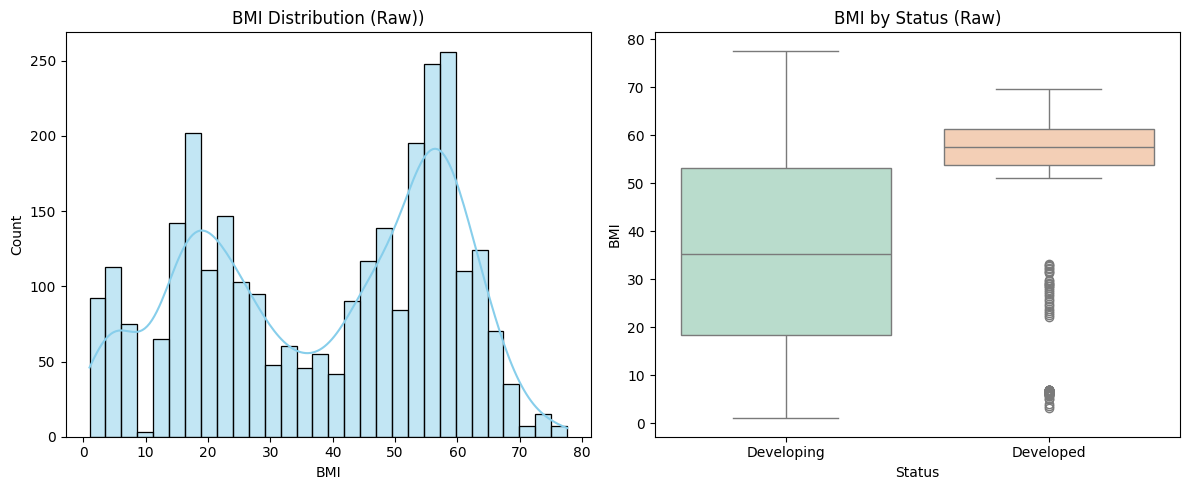

In [105]:
# Distribution & by-Status comparison for Diphtheria
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (Diphtheria raw)
sns.histplot(training_df_clean[" BMI "], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("BMI Distribution (Raw))")
ax[0].set_xlabel("BMI")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y=" BMI ", palette="Pastel2", ax=ax[1])
ax[1].set_title("BMI by Status (Raw)")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("BMI")

plt.tight_layout()
plt.show()

The distribution of diphtheria vaccination coverage is uneven, with most countries falling in the medium-to-high ranges (50–70%), while a few—mainly developing countries—show very low coverage. Developed countries tend to maintain consistently higher vaccination levels, while developing countries display greater variability and more outliers.

Importantly, higher diphtheria vaccination rates are generally associated with longer life expectancy, as strong immunization programs protect against infectious disease, reduce child mortality, and strengthen overall population health. Conversely, countries with weaker vaccination coverage often also have lower life expectancy due to higher vulnerability to preventable diseases and weaker healthcare systems.

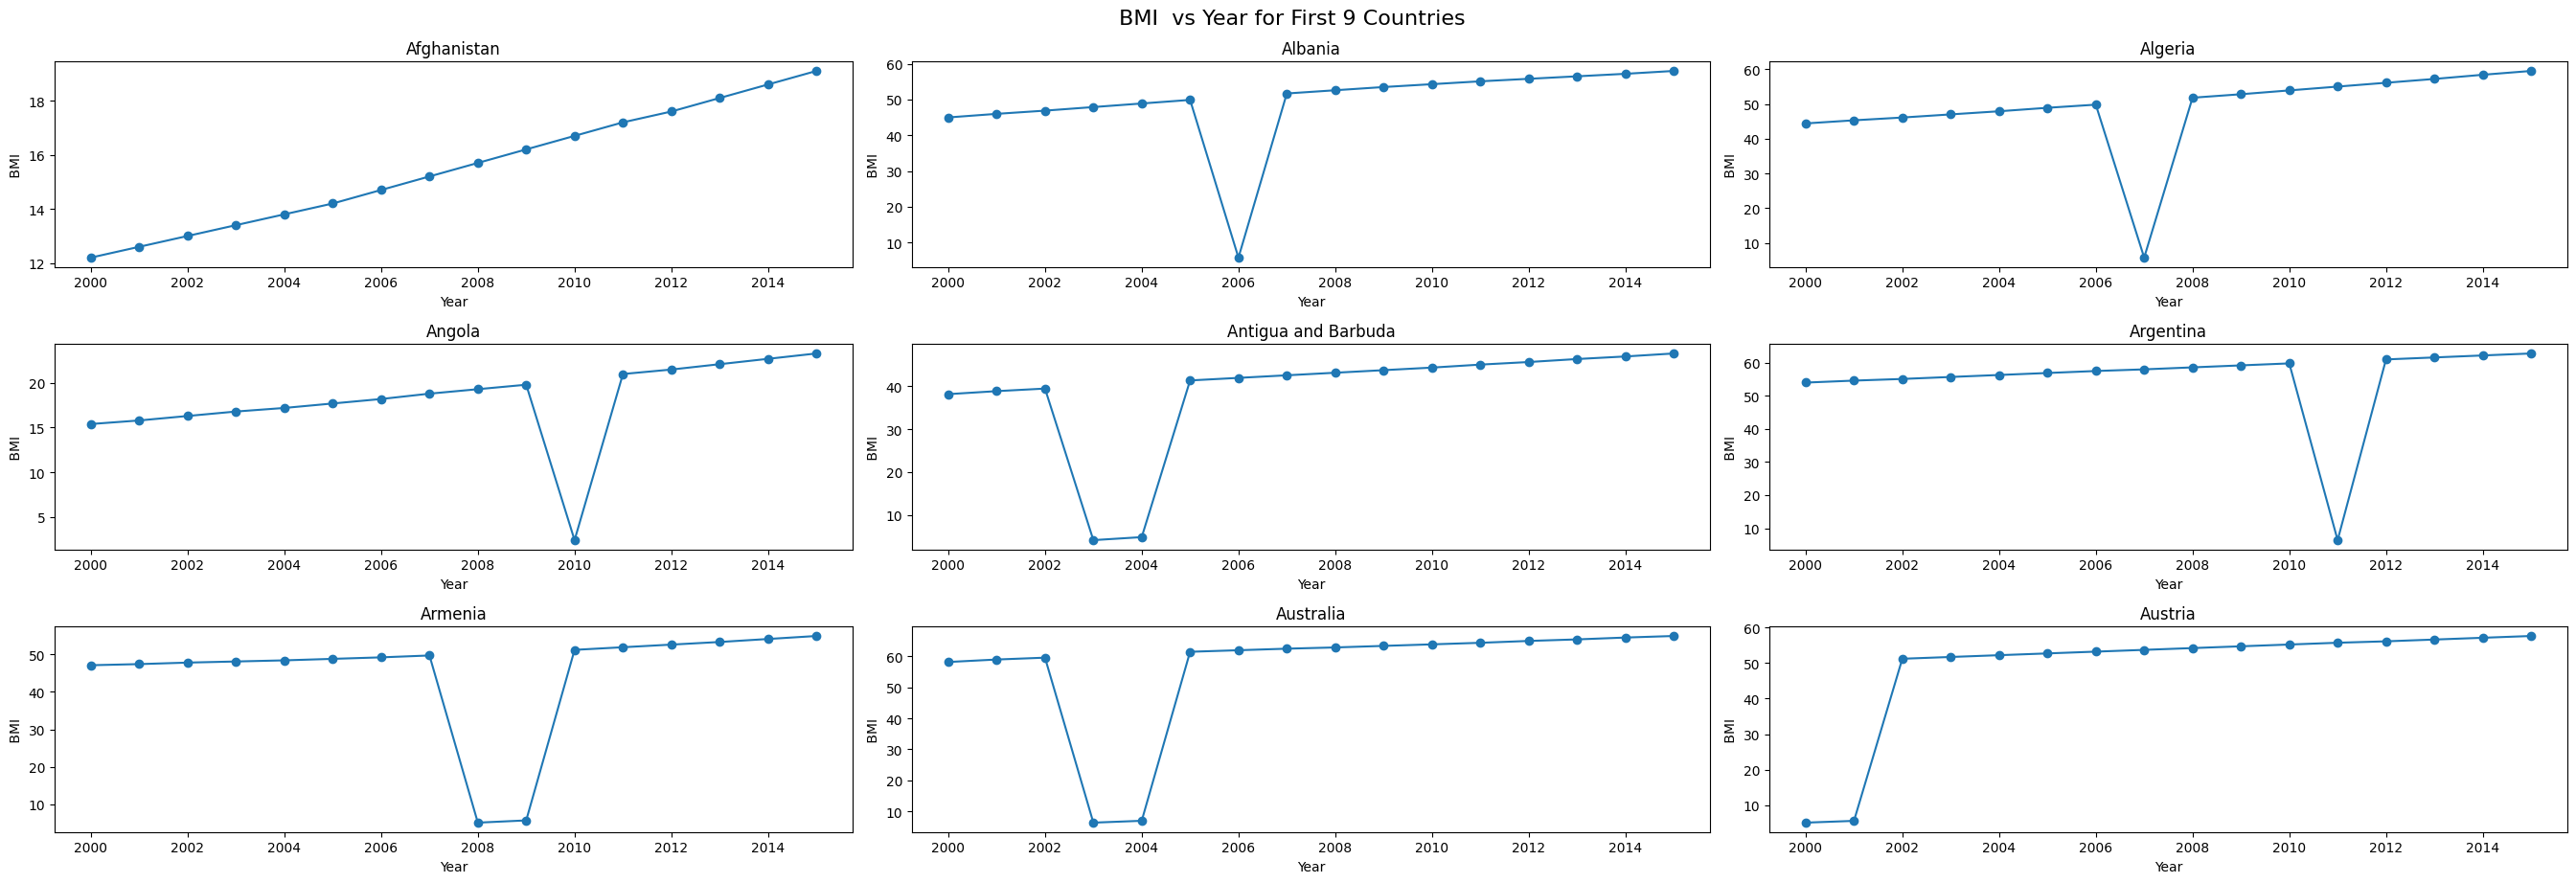

In [106]:
# Plot  BMI  vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data[' BMI '], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel(' BMI ')
    plt.tight_layout()

plt.suptitle(' BMI  vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization shows BMI trends over time for the first nine countries in the dataset. It highlights how BMI levels have generally increased across years, reflecting gradual lifestyle and health changes. At the same time, the plots reveal irregularities such as sharp drops or sudden shifts, which may indicate missing data, reporting errors, or inconsistencies. By uncovering these patterns, the visualization helps identify potential data quality issues in the BMI column and emphasizes the need for careful handling of unusual values before carrying out deeper analysis.

In [107]:
# Show number of null values in ' BMI ' column for each country
nulls_by_country = training_df_clean.groupby('Country')[' BMI '].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
South Sudan    16
Sudan          16
Name:  BMI , dtype: int64

In [108]:
training_df_clean[' BMI '].isnull().sum()

np.int64(32)

In [109]:
# Fill null values in ' BMI ' with the median for each (Country, Year) group
training_df_clean[' BMI '] = training_df_clean.groupby(['Year'])[' BMI '].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\957073392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean[' BMI '] = training_df_clean.groupby(['Year'])[' BMI '].transform(


In [110]:
training_df_clean[' BMI '].isnull().sum()

np.int64(0)

### Thinness 1-19 Years

In [111]:
# percentage of null values in ' thinness  1-19 years' column
training_df_clean[' thinness  1-19 years'].isnull().sum()/len(training_df_clean)*100

np.float64(1.092896174863388)

In [112]:
training_df_clean[' thinness  1-19 years'].describe()

count    2896.000000
mean        4.850622
std         4.420829
min         0.100000
25%         1.600000
50%         3.300000
75%         7.200000
max        27.700000
Name:  thinness  1-19 years, dtype: float64


**Interpretation:**
- Most countries have thinness rates between 1.6 and 7.2, with a median of 3.3.
- The high max and std indicate a long right tail (outliers with very high thinness).
- The distribution is right-skewed, and there is substantial variation across countries.

In [113]:

training_df_clean[' thinness  1-19 years'].value_counts().sort_values(ascending=False)

 thinness  1-19 years
1.0     74
1.9     65
0.8     64
0.7     63
1.2     62
        ..
21.8     1
22.2     1
22.0     1
14.9     1
15.8     1
Name: count, Length: 200, dtype: int64

In [114]:

training_df_clean[training_df_clean[' thinness  1-19 years'].isnull()].head()
# Bar plot to visualize the distribution of ' thinness  1-19 years' column with 10 bins


Country  Year      Status  Life expectancy   Adult Mortality  \
2409  South Sudan  2015  Developing              57.3            332.0   
2410  South Sudan  2014  Developing              56.6            343.0   
2411  South Sudan  2013  Developing              56.4            345.0   
2412  South Sudan  2012  Developing              56.0            347.0   
2413  South Sudan  2011  Developing              55.4            355.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2409             26    5.285                0.000000         31.0       878   
2410             26    0.320               46.074469         93.0       441   
2411             26    2.810               47.444530         93.0       525   
2412             26    2.890               38.338232         94.0      1952   
2413             27    4.065                0.000000         93.0      1256   

      ...  under-five deaths   Polio  Total expenditure  Diphtheria   \
2409  ...                  39   41.0               2.74         31.0   
2410  ...                  39   44.0               2.74         39.0   
2411  ...                  40    5.0               2.62         45.0   
2412  ...                  40   64.0               2.77         59.0   
2413  ...                  41   66.0               2.74         61.0   

       HIV/AIDS          GDP   thinness  1-19 years   thinness 5-9 years  \
2409        3.4   758.725782                    NaN                  NaN   
2410        3.5  1151.861715                    NaN                  NaN   
2411        3.6  1186.113250                    NaN                  NaN   
2412        3.8   958.455810                    NaN                  NaN   
2413        3.9   176.971300                    NaN                  NaN   

      Income composition of resources  Schooling  
2409                            0.421        4.9  
2410                            0.421        4.9  
2411                            0.417        4.9  
2412                            0.419        4.9  
2413                            0.429        4.9  

[5 rows x 21 columns]

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\3513618563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['HepB_bins'] = pd.cut(training_df_clean[' thinness  1-19 years'], bins=bins, labels=labels, include_lowest=True)


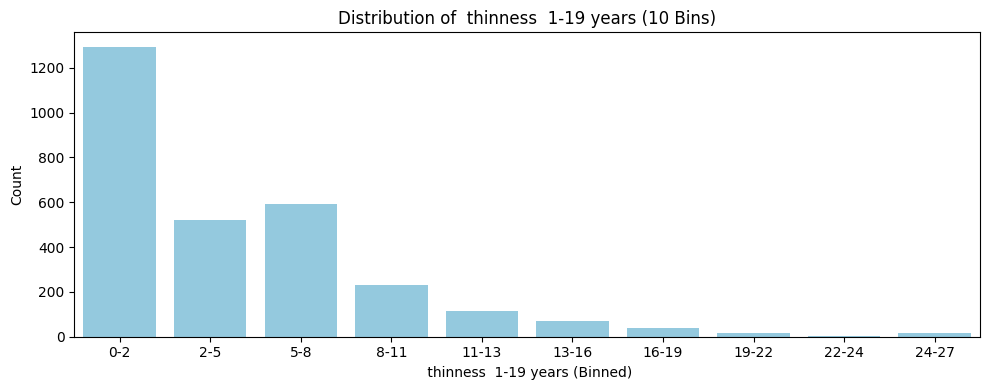

In [115]:
# Create 10 bins for  thinness  1-19 years values
bins = np.linspace(0, training_df_clean[' thinness  1-19 years'].max(), 11)  # 10 equal-width bins from 0 to 100
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
training_df_clean['HepB_bins'] = pd.cut(training_df_clean[' thinness  1-19 years'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 4))
sns.countplot(x='HepB_bins', data=training_df_clean, color='skyblue')
plt.title('Distribution of  thinness  1-19 years (10 Bins)')
plt.xlabel(' thinness  1-19 years (Binned)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


The binned distribution of thinness (1–19 years) shows a highly right-skewed pattern, with the majority of observations concentrated in the lowest range (0–2%). This indicates that in most countries and years, the prevalence of thinness among children and adolescents is very low, reflecting relatively good nutrition and healthcare conditions. As the thinness percentage increases, the frequency of observations drops sharply, with very few records falling into higher ranges (above 10%).

This pattern highlights a clear inequality: while many countries manage to maintain low levels of child and adolescent thinness, a smaller subset of countries still experience significant malnutrition issues. These higher thinness rates (10–27%) suggest nutritional challenges and weaker health infrastructure in certain regions. Thus, while overall global progress looks strong, the distribution points to specific areas where targeted interventions are needed.

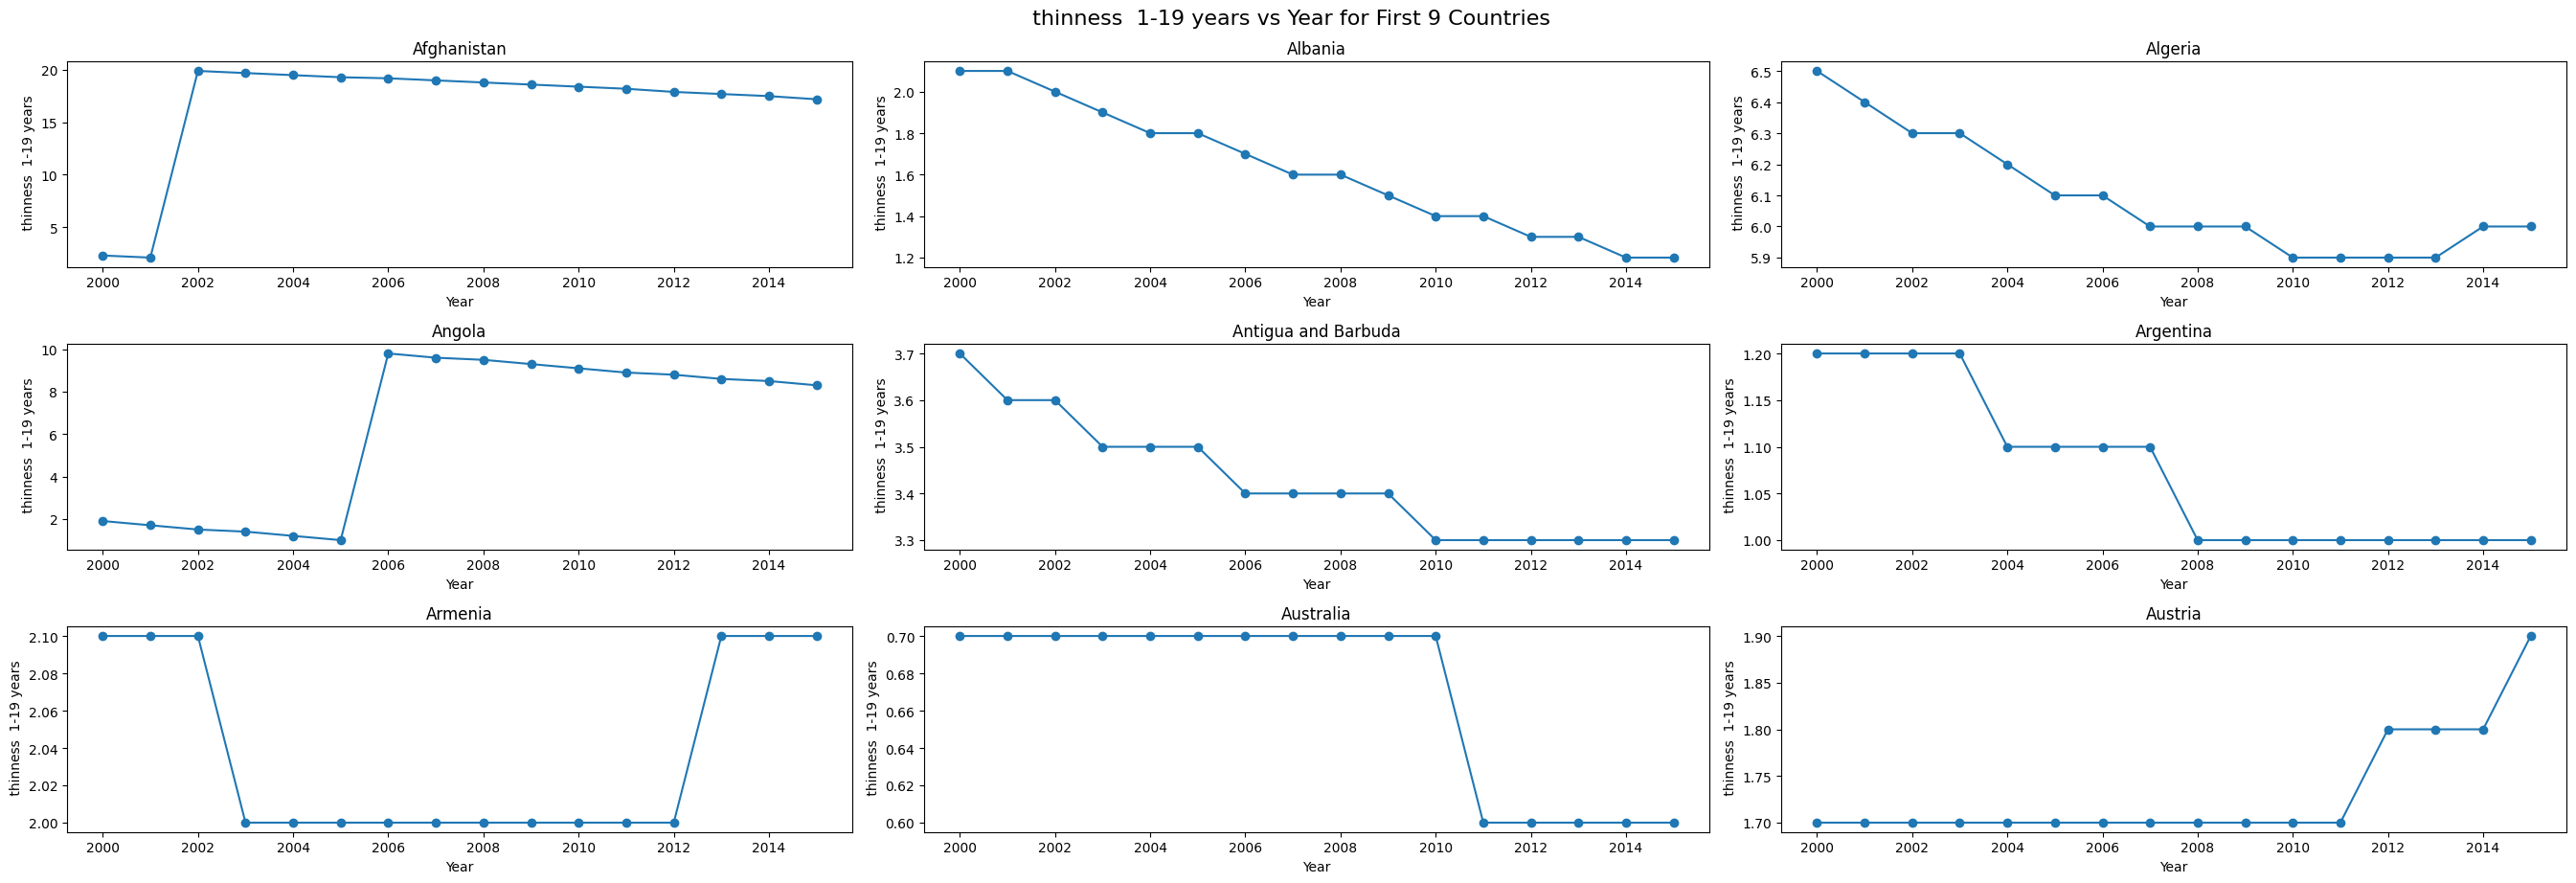

In [116]:
# Plot  thinness  1-19 years vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data[' thinness  1-19 years'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel(' thinness  1-19 years')
    plt.tight_layout()

plt.suptitle(' thinness  1-19 years vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization shows the thinness (1–19 years) trends over time for the first nine countries in the dataset, highlighting how prevalence has changed between 2000 and 2015. Most countries display a gradual decline, suggesting improvements in child and adolescent nutrition, while others reveal irregularities such as sudden spikes, drops, or plateaus that may reflect data quality issues or real-world events like conflicts, famines, or health interventions. These country-specific patterns provide useful insights into how nutritional challenges vary globally and help identify where sustained or targeted efforts may be needed to improve health outcomes.

In [117]:
# Show number of null values in ' thinness  1-19 years' column for each country
nulls_by_country = training_df_clean.groupby('Country')[' thinness  1-19 years'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
South Sudan    16
Sudan          16
Name:  thinness  1-19 years, dtype: int64

In [118]:
training_df_clean[' thinness  1-19 years'].isnull().sum()

np.int64(32)

In [119]:
# Fill null values in ' thinness  1-19 years' with the median for each (Country, Year) group
training_df_clean[' thinness  1-19 years'] = training_df_clean.groupby(['Year'])[' thinness  1-19 years'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\3050233685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean[' thinness  1-19 years'] = training_df_clean.groupby(['Year'])[' thinness  1-19 years'].transform(


In [120]:
training_df_clean[' thinness  1-19 years'].isnull().sum()

np.int64(0)

### Thinness 5-9 Years

In [121]:
# percentage of null values in ' thinness 5-9 years' column
training_df_clean[' thinness 5-9 years'].isnull().sum()/len(training_df_clean)*100

np.float64(1.092896174863388)

In [122]:

training_df_clean[' thinness 5-9 years'].describe()

count    2896.000000
mean        4.881423
std         4.509609
min         0.100000
25%         1.575000
50%         3.400000
75%         7.200000
max        28.600000
Name:  thinness 5-9 years, dtype: float64

Interpretation:,
- Most countries have thinness rates between 1.58 and 7.20, with a median of 3.40.,
- The minimum value is very low, indicating some countries have almost no thinness in this age group.,
- The distribution is right-skewed (mean > median), with a few countries/years having very high thinness rates.,
- The high standard deviation and max confirm the presence of significant outliers.

In [123]:

training_df_clean[' thinness 5-9 years'].value_counts().sort_values(ascending=False)

 thinness 5-9 years
0.9     69
1.1     67
1.9     63
0.5     63
1.0     62
        ..
22.6     1
22.2     1
14.9     1
15.7     1
15.8     1
Name: count, Length: 207, dtype: int64

In [124]:

training_df_clean[training_df_clean[' thinness 5-9 years'].isnull()].head()

Country  Year      Status  Life expectancy   Adult Mortality  \
2409  South Sudan  2015  Developing              57.3            332.0   
2410  South Sudan  2014  Developing              56.6            343.0   
2411  South Sudan  2013  Developing              56.4            345.0   
2412  South Sudan  2012  Developing              56.0            347.0   
2413  South Sudan  2011  Developing              55.4            355.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2409             26    5.285                0.000000         31.0       878   
2410             26    0.320               46.074469         93.0       441   
2411             26    2.810               47.444530         93.0       525   
2412             26    2.890               38.338232         94.0      1952   
2413             27    4.065                0.000000         93.0      1256   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS          GDP  \
2409  ...   41.0               2.74         31.0        3.4   758.725782   
2410  ...   44.0               2.74         39.0        3.5  1151.861715   
2411  ...    5.0               2.62         45.0        3.6  1186.113250   
2412  ...   64.0               2.77         59.0        3.8   958.455810   
2413  ...   66.0               2.74         61.0        3.9   176.971300   

       thinness  1-19 years   thinness 5-9 years  \
2409                    3.5                  NaN   
2410                    3.3                  NaN   
2411                    3.4                  NaN   
2412                    3.3                  NaN   
2413                    3.3                  NaN   

      Income composition of resources  Schooling  HepB_bins  
2409                            0.421        4.9        NaN  
2410                            0.421        4.9        NaN  
2411                            0.417        4.9        NaN  
2412                            0.419        4.9        NaN  
2413                            0.429        4.9        NaN  

[5 rows x 22 columns]

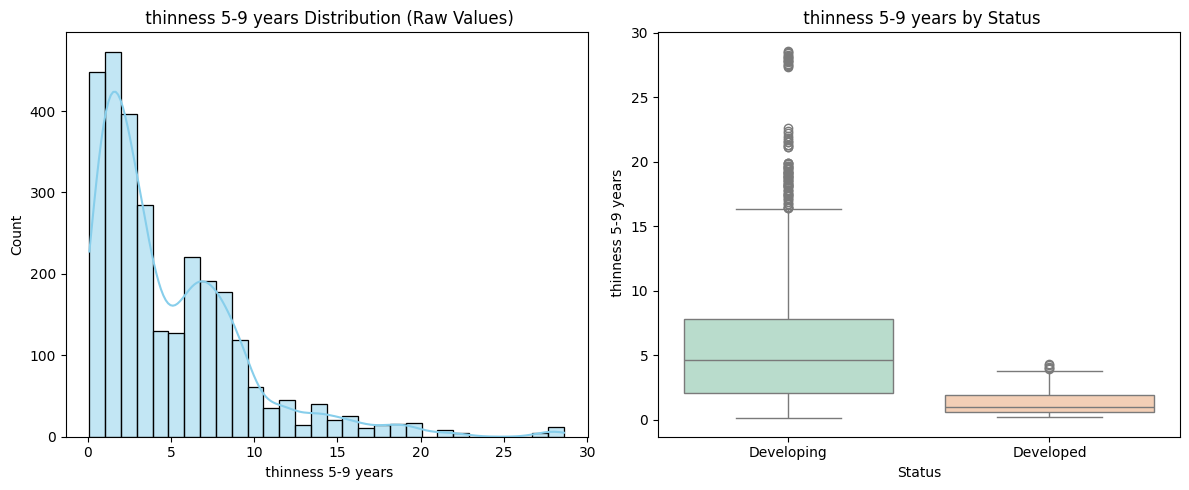

In [125]:
# Distribution & by-Status comparison for  thinness 5-9 years
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram ( thinness 5-9 years raw)
sns.histplot(training_df_clean[" thinness 5-9 years"], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title(" thinness 5-9 years Distribution (Raw Values)")
ax[0].set_xlabel(" thinness 5-9 years")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y=" thinness 5-9 years", palette="Pastel2", ax=ax[1])
ax[1].set_title(" thinness 5-9 years by Status")
ax[1].set_xlabel("Status")
ax[1].set_ylabel(" thinness 5-9 years")

plt.tight_layout()
plt.show()

The distribution of thinness among children aged 5–9 years is highly skewed, with the majority of cases concentrated at very low percentages (0–5%), while a smaller proportion of developing countries shows much higher prevalence, reaching up to 25–30%. The boxplot highlights a clear disparity: developing countries experience significantly higher rates and more variability in child thinness, whereas developed countries generally maintain very low and stable levels.

This pattern reflects differences in nutrition, healthcare access, and socioeconomic conditions between developed and developing nations. Higher thinness rates are often linked to malnutrition, food insecurity, and limited healthcare, which in turn can negatively impact growth, immunity, and long-term life expectancy. In contrast, developed countries tend to have better nutrition and health programs, resulting in lower and more consistent thinness levels among children.

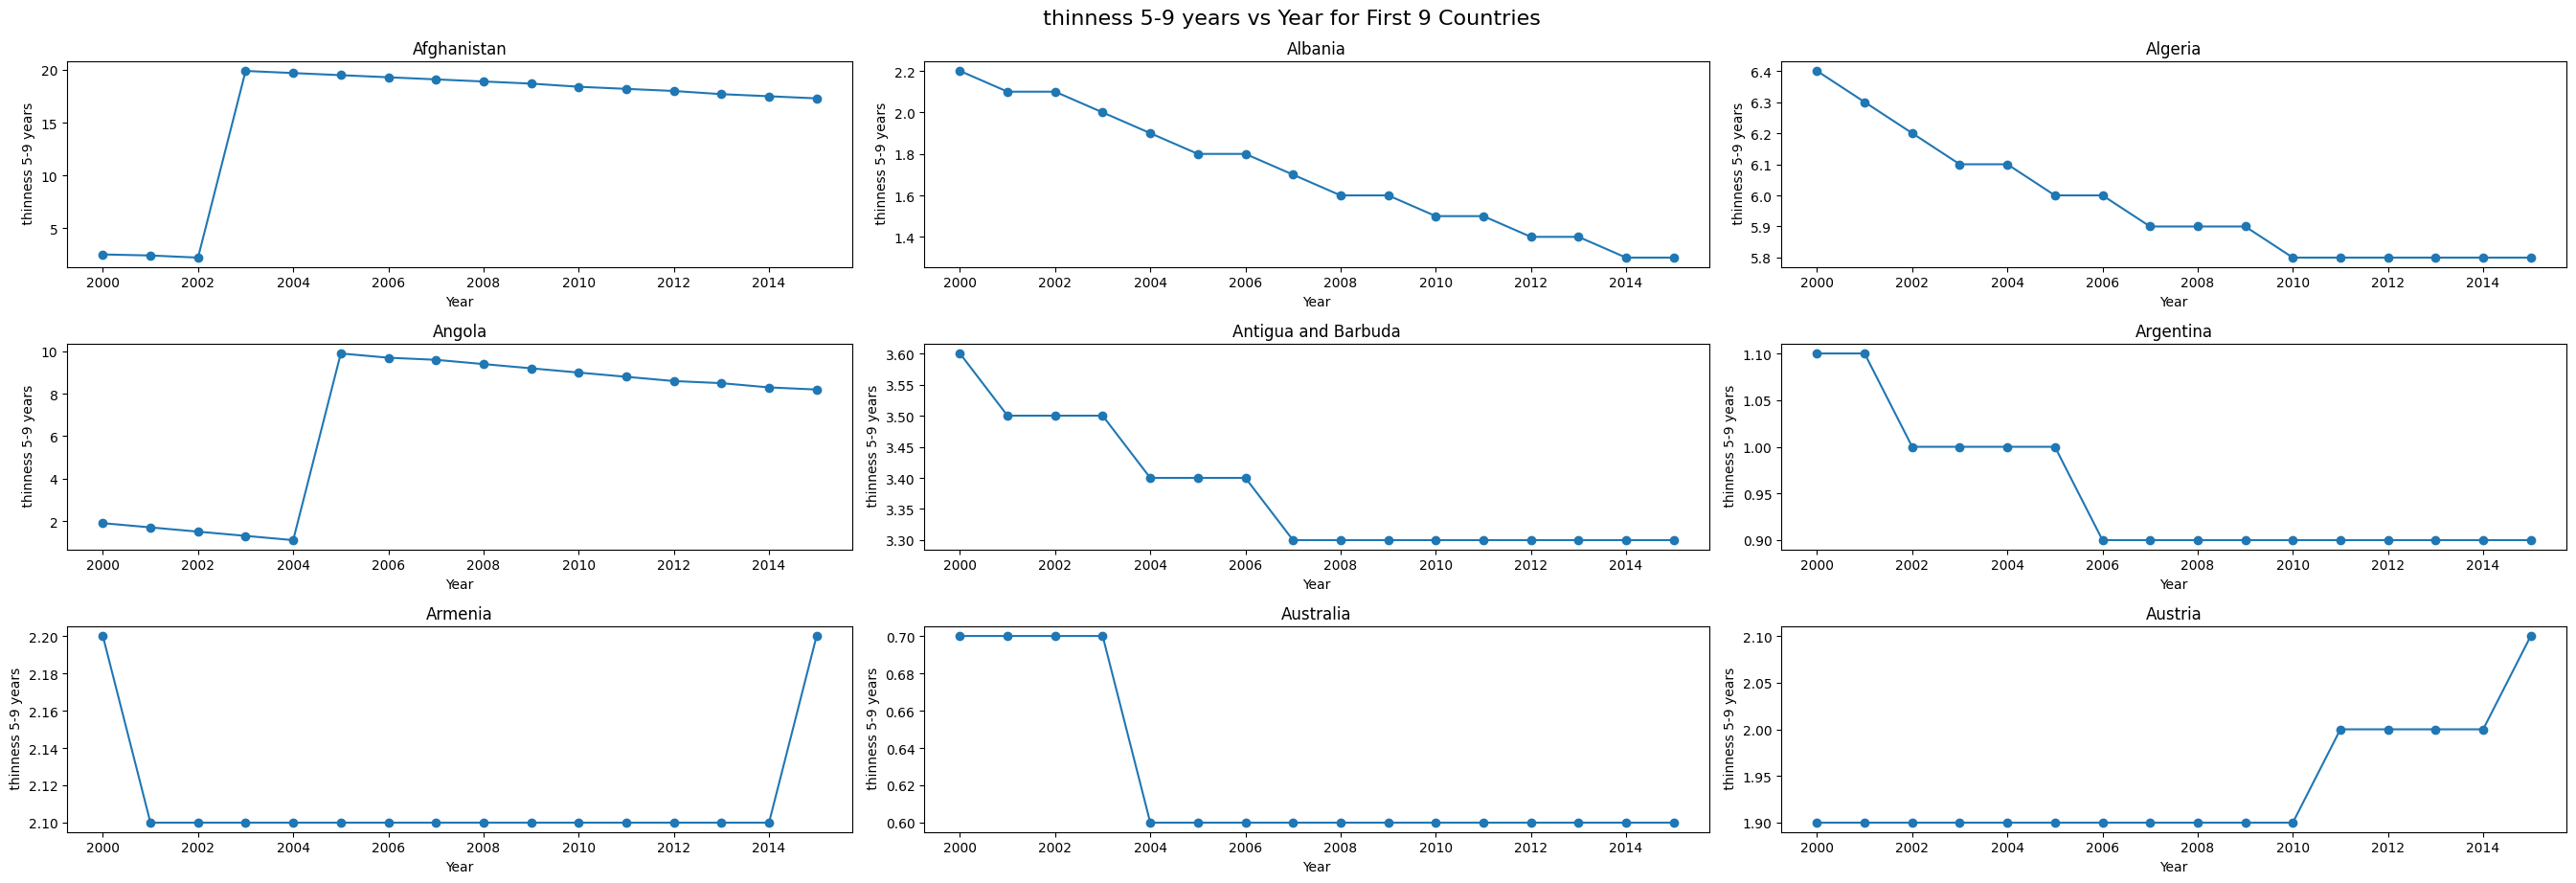

In [126]:
# Plot  thinness 5-9 years vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data[' thinness 5-9 years'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel(' thinness 5-9 years')
    plt.tight_layout()

plt.suptitle(' thinness 5-9 years vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization presents the thinness (5–9 years) trends over time for the first nine countries in the dataset. It highlights how child malnutrition levels have evolved from 2000 to 2015, showing both steady declines in some nations and irregular patterns or sudden shifts in others. While countries like Albania and Algeria display consistent reductions in thinness rates, others such as Afghanistan and Angola show abrupt jumps that may reflect data inconsistencies or actual health crises during specific years. These trends not only provide insight into child health and nutrition progress but also point toward possible data quality issues that should be addressed before deeper analysis.

In [127]:
# Show number of null values in ' thinness 5-9 years' column for each country
nulls_by_country = training_df_clean.groupby('Country')[' thinness 5-9 years'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
South Sudan    16
Sudan          16
Name:  thinness 5-9 years, dtype: int64

In [128]:
training_df_clean[' thinness 5-9 years'].isnull().sum()

np.int64(32)

In [129]:
# Fill null values in ' thinness 5-9 years' with the median for each (Country, Year) group
training_df_clean[' thinness 5-9 years'] = training_df_clean.groupby(['Year'])[' thinness 5-9 years'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\1014534124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean[' thinness 5-9 years'] = training_df_clean.groupby(['Year'])[' thinness 5-9 years'].transform(


In [130]:
training_df_clean[' thinness 5-9 years'].isnull().sum()

np.int64(0)

### Polio

In [131]:
    # percentage of null values in 'Polio' column
training_df_clean['Polio'].isnull().sum()/len(training_df_clean)*100

np.float64(0.6489071038251366)

In [132]:

training_df_clean['Polio'].describe()

count    2909.000000
mean       82.548298
std        23.416674
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64


**Interpretation:**
- Most countries have achieved high Polio immunization rates, but a small number of countries lag far behind.
- The presence of low outliers highlights the need for targeted interventions in those countries.

In [133]:

training_df_clean['Polio'].value_counts().sort_values(ascending=False)

Polio
99.0    373
98.0    254
97.0    205
96.0    205
95.0    180
       ... 
32.0      2
48.0      2
23.0      1
17.0      1
33.0      1
Name: count, Length: 73, dtype: int64

In [134]:

training_df_clean[training_df_clean['Polio'].isnull()].head()

Country  Year      Status  Life expectancy   Adult Mortality  \
1742  Montenegro  2005  Developing              73.6            133.0   
1743  Montenegro  2004  Developing              73.5            134.0   
1744  Montenegro  2003  Developing              73.5            134.0   
1745  Montenegro  2002  Developing              73.4            136.0   
1746  Montenegro  2001  Developing              73.3            136.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1742              0     4.10              527.307672         92.0         0   
1743              0     0.01               57.121901         91.0         0   
1744              0     0.01              495.078296         86.0         0   
1745              0     0.01               36.480240         88.0         0   
1746              0     0.01               33.669814         89.0         0   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS          GDP  \
1742  ...    NaN               8.46          NaN        0.1  3674.617924   
1743  ...    NaN               8.45          NaN        0.1   338.199535   
1744  ...    NaN               8.91          NaN        0.1  2789.173500   
1745  ...    NaN               8.33          NaN        0.1   216.243274   
1746  ...    NaN               8.23          NaN        0.1   199.583957   

       thinness  1-19 years   thinness 5-9 years  \
1742                    2.3                  2.3   
1743                    2.3                  2.4   
1744                    2.4                  2.4   
1745                    2.5                  2.5   
1746                    2.5                  2.6   

      Income composition of resources  Schooling  HepB_bins  
1742                            0.746       12.8        0-2  
1743                            0.740       12.6        0-2  
1744                            0.000        0.0        0-2  
1745                            0.000        0.0        0-2  
1746                            0.000        0.0        0-2  

[5 rows x 22 columns]

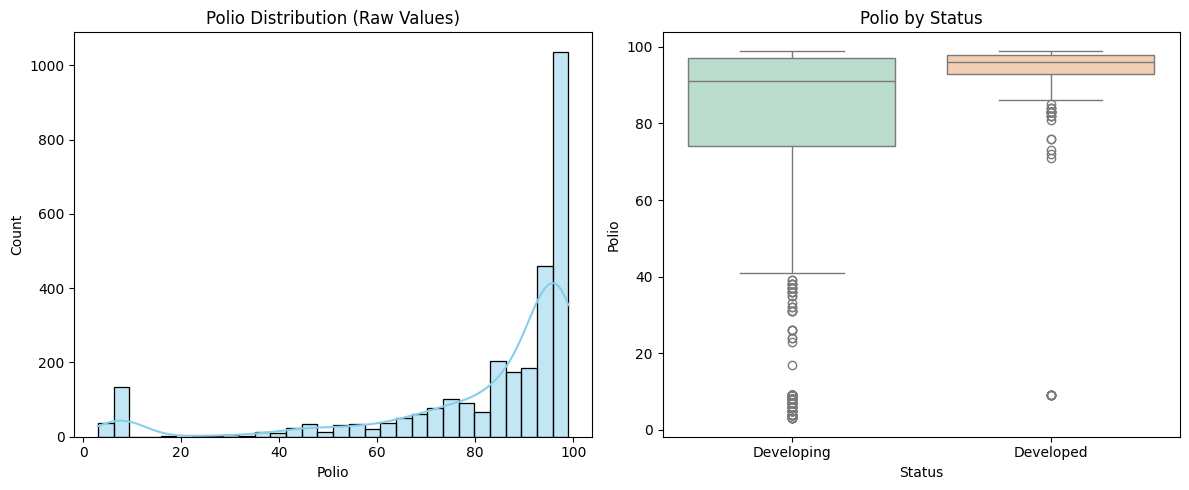

In [135]:
# Distribution & by-Status comparison for Polio
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (Polio raw)
sns.histplot(training_df_clean["Polio"], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("Polio Distribution (Raw Values)")
ax[0].set_xlabel("Polio")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y="Polio", palette="Pastel2", ax=ax[1])
ax[1].set_title("Polio by Status")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("Polio")

plt.tight_layout()
plt.show()

The distribution of Polio vaccination coverage shows that most countries have achieved very high rates of immunization, concentrated between 90–100%. However, the histogram also reveals a noticeable tail at the lower end, indicating that a number of countries—predominantly developing ones—still struggle with low or moderate coverage. The boxplot further highlights this divide: developed countries maintain consistently high vaccination levels with very few outliers, while developing countries display a much wider spread, with many falling below 80% and several extreme outliers as low as 0–20%.

This analysis suggests that although global efforts have significantly improved Polio immunization, gaps remain in developing regions. These disparities can directly influence life expectancy outcomes, as countries with lower coverage face a higher risk of Polio outbreaks, greater child mortality, and weaker public health resilience. In contrast, the stability in developed countries underscores the role of robust healthcare systems in sustaining high immunization rates and better health outcomes.

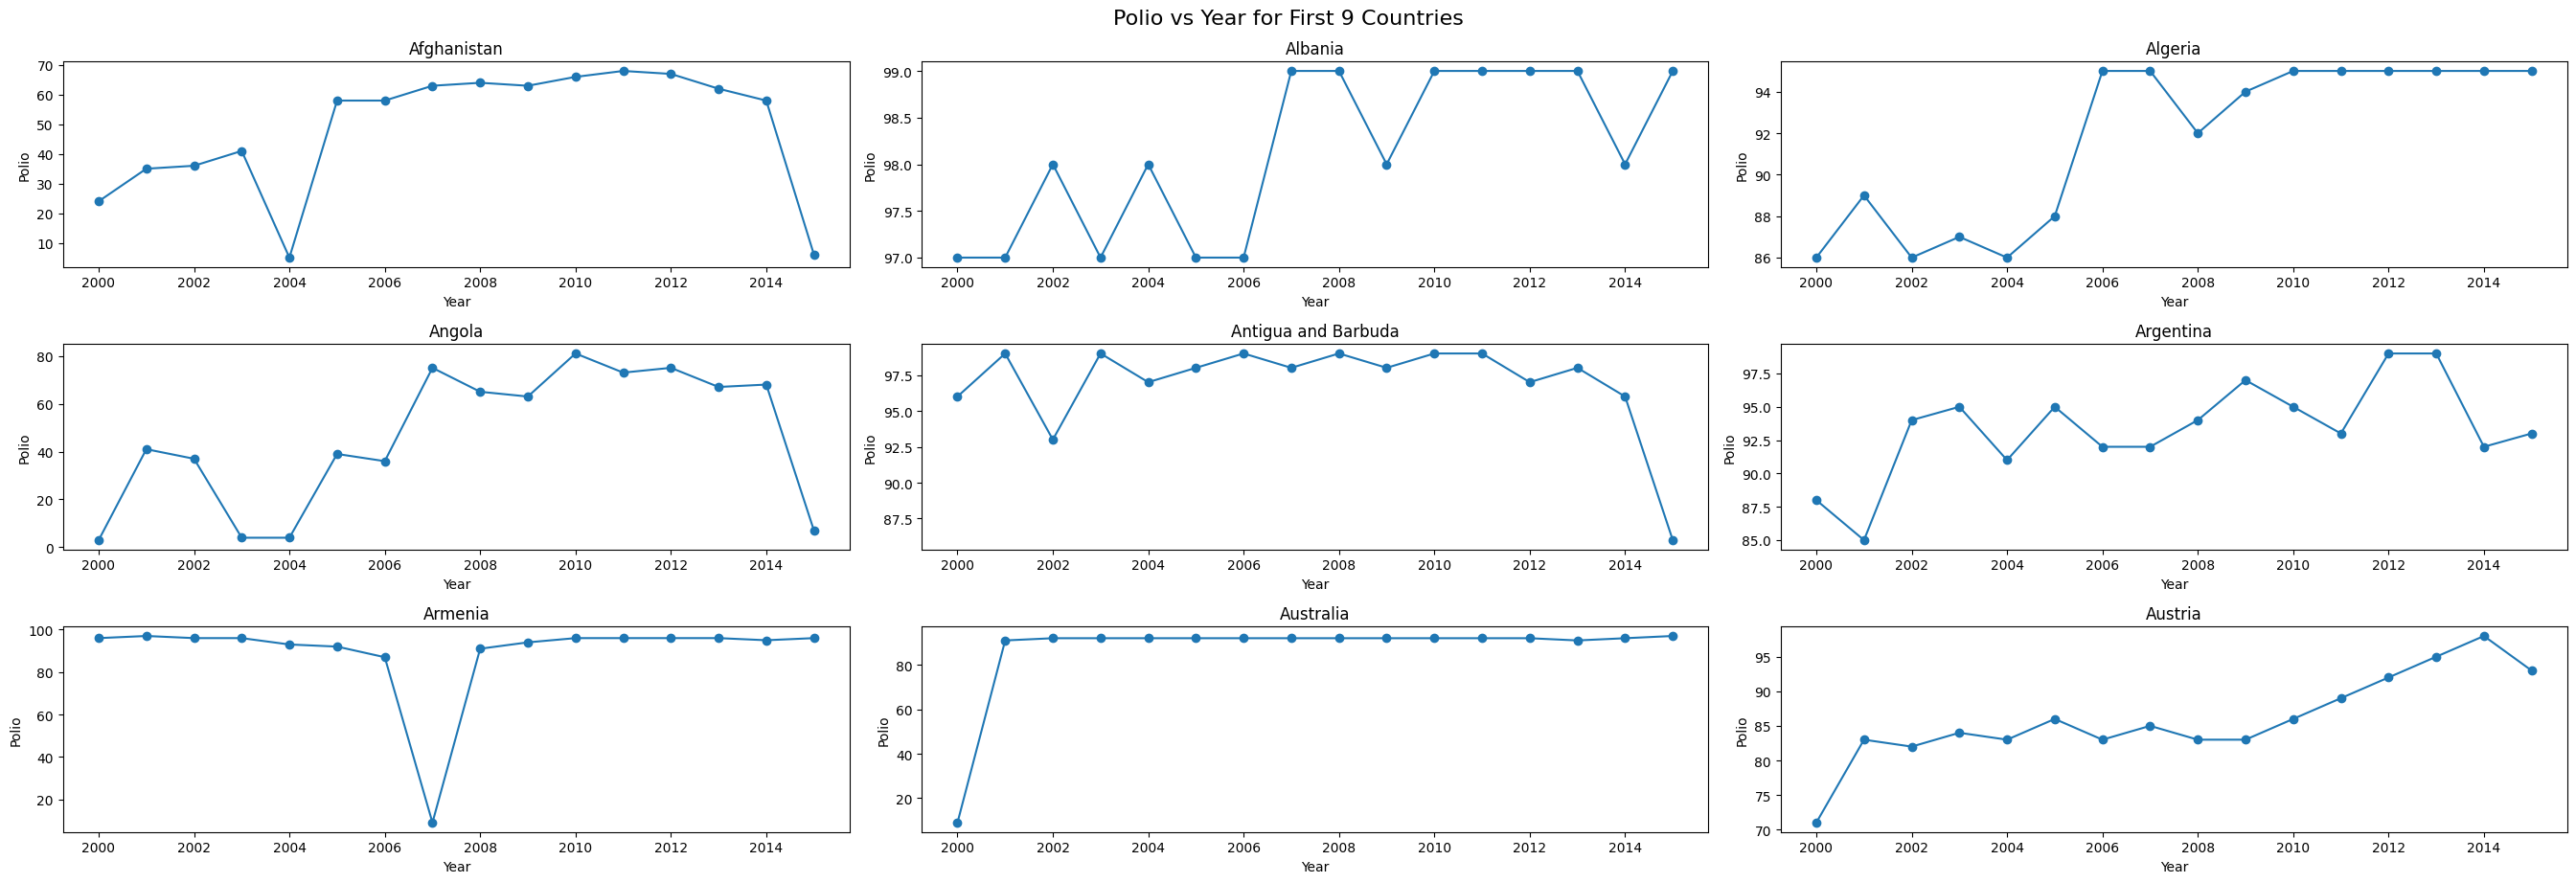

In [136]:

# Plot Polio vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Polio'], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Polio')
    plt.tight_layout()

plt.suptitle('Polio vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization illustrates Polio vaccination coverage trends over time for the first nine countries in the dataset. It highlights how immunization rates have evolved between 2000 and 2015, showing both steady improvements and irregular fluctuations. While some countries, such as Australia and Armenia, exhibit consistently high coverage levels, others like Afghanistan and Angola show noticeable drops or sudden shifts, pointing to possible challenges in sustaining vaccination programs. These variations not only reflect differences in healthcare infrastructure and policy effectiveness but may also signal potential data quality issues. Such insights are crucial for understanding long-term immunization patterns and their implications for public health and life expectancy outcomes.

In [137]:

# Show number of null values in 'Polio' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Polio'].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
South Sudan    11
Montenegro      6
Timor-Leste     2
Name: Polio, dtype: int64

In [138]:
training_df_clean['Polio'].isnull().sum()

np.int64(19)

In [139]:
# Fill null values in 'Polio' with the median for each (Country, Year) group
training_df_clean['Polio'] = training_df_clean.groupby(['Country'])['Polio'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\2374714380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Polio'] = training_df_clean.groupby(['Country'])['Polio'].transform(


In [140]:
training_df_clean['Polio'].isnull().sum()

np.int64(0)

### Diphtheria

In [141]:
# percentage of null values in 'Diphtheria ' column
training_df_clean['Diphtheria '].isnull().sum()/len(training_df_clean)*100

np.float64(0.6489071038251366)

In [142]:
# Show number of null values in 'Diphtheria ' column for each country
nulls_by_country = training_df_clean.groupby('Country')['Diphtheria '].apply(lambda x: x.isnull().sum())
nulls_by_country[nulls_by_country > 0].sort_values(ascending=False)

Country
South Sudan    11
Montenegro      6
Timor-Leste     2
Name: Diphtheria , dtype: int64

In [143]:
training_df_clean['Diphtheria '].describe()

count    2909.000000
mean       82.321416
std        23.706644
min         2.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Diphtheria , dtype: float64


Interpretation:,
- Most countries have achieved high Diphtheria immunization rates, but a small number of countries lag far behind.,
- The presence of low outliers highlights the need for targeted interventions in those countries.

In [144]:
training_df_clean['Diphtheria '].value_counts().sort_values(ascending=False)

Diphtheria 
99.0    347
98.0    253
97.0    205
95.0    200
96.0    199
       ... 
56.0      1
2.0       1
16.0      1
32.0      1
27.0      1
Name: count, Length: 81, dtype: int64

In [145]:
training_df_clean[training_df_clean['Diphtheria '].isnull()].head()

Country  Year      Status  Life expectancy   Adult Mortality  \
1742  Montenegro  2005  Developing              73.6            133.0   
1743  Montenegro  2004  Developing              73.5            134.0   
1744  Montenegro  2003  Developing              73.5            134.0   
1745  Montenegro  2002  Developing              73.4            136.0   
1746  Montenegro  2001  Developing              73.3            136.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1742              0     4.10              527.307672         92.0         0   
1743              0     0.01               57.121901         91.0         0   
1744              0     0.01              495.078296         86.0         0   
1745              0     0.01               36.480240         88.0         0   
1746              0     0.01               33.669814         89.0         0   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS          GDP  \
1742  ...   92.5               8.46          NaN        0.1  3674.617924   
1743  ...   92.5               8.45          NaN        0.1   338.199535   
1744  ...   92.5               8.91          NaN        0.1  2789.173500   
1745  ...   92.5               8.33          NaN        0.1   216.243274   
1746  ...   92.5               8.23          NaN        0.1   199.583957   

       thinness  1-19 years   thinness 5-9 years  \
1742                    2.3                  2.3   
1743                    2.3                  2.4   
1744                    2.4                  2.4   
1745                    2.5                  2.5   
1746                    2.5                  2.6   

      Income composition of resources  Schooling  HepB_bins  
1742                            0.746       12.8        0-2  
1743                            0.740       12.6        0-2  
1744                            0.000        0.0        0-2  
1745                            0.000        0.0        0-2  
1746                            0.000        0.0        0-2  

[5 rows x 22 columns]

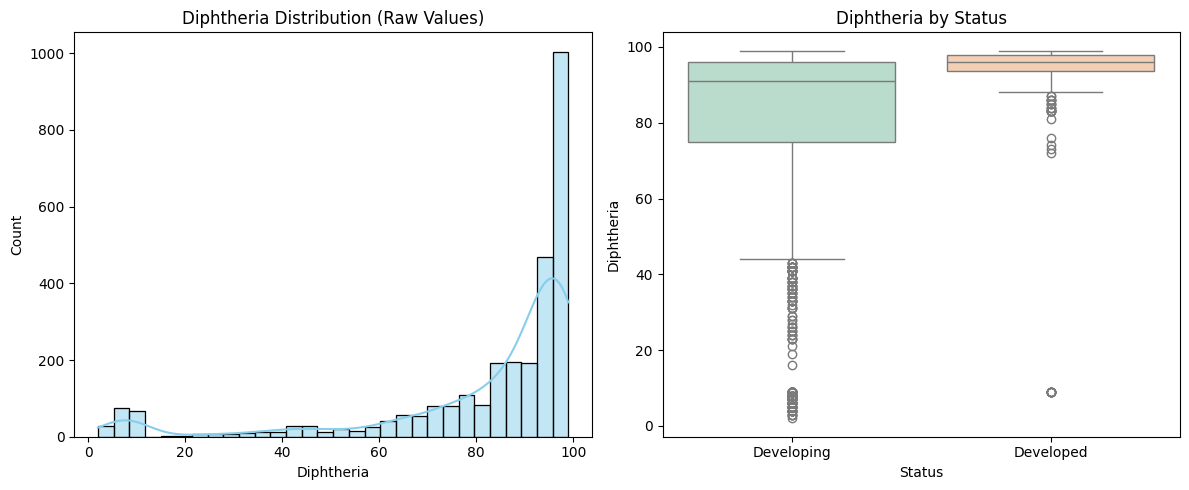

In [146]:
# Distribution & by-Status comparison for Diphtheria
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (Diphtheria raw)
sns.histplot(training_df_clean["Diphtheria "], bins=30, kde=True, ax=ax[0], color="skyblue")
ax[0].set_title("Diphtheria Distribution (Raw Values)")
ax[0].set_xlabel("Diphtheria")

# Boxplot by Status
sns.boxplot(data=training_df_clean, x="Status", y="Diphtheria ", palette="Pastel2", ax=ax[1])
ax[1].set_title("Diphtheria by Status")
ax[1].set_xlabel("Status")
ax[1].set_ylabel("Diphtheria")

plt.tight_layout()
plt.show()

The distribution of Diphtheria vaccination coverage is highly skewed, with most countries achieving very high rates (above 80–90%), while a subset of mainly developing nations show significantly lower coverage. The boxplot highlights that developed countries maintain consistently high and stable immunization levels, whereas developing countries reveal greater variability and more frequent outliers.

Stronger Diphtheria vaccination coverage is crucial for improving public health outcomes and extending life expectancy, as it reduces the risk of outbreaks of preventable diseases and lowers child mortality. In contrast, countries with weaker coverage often struggle with fragile healthcare systems, which contributes to poorer health indicators and lower life expectancy overall. This makes immunization programs a critical area for policy focus in developing regions.

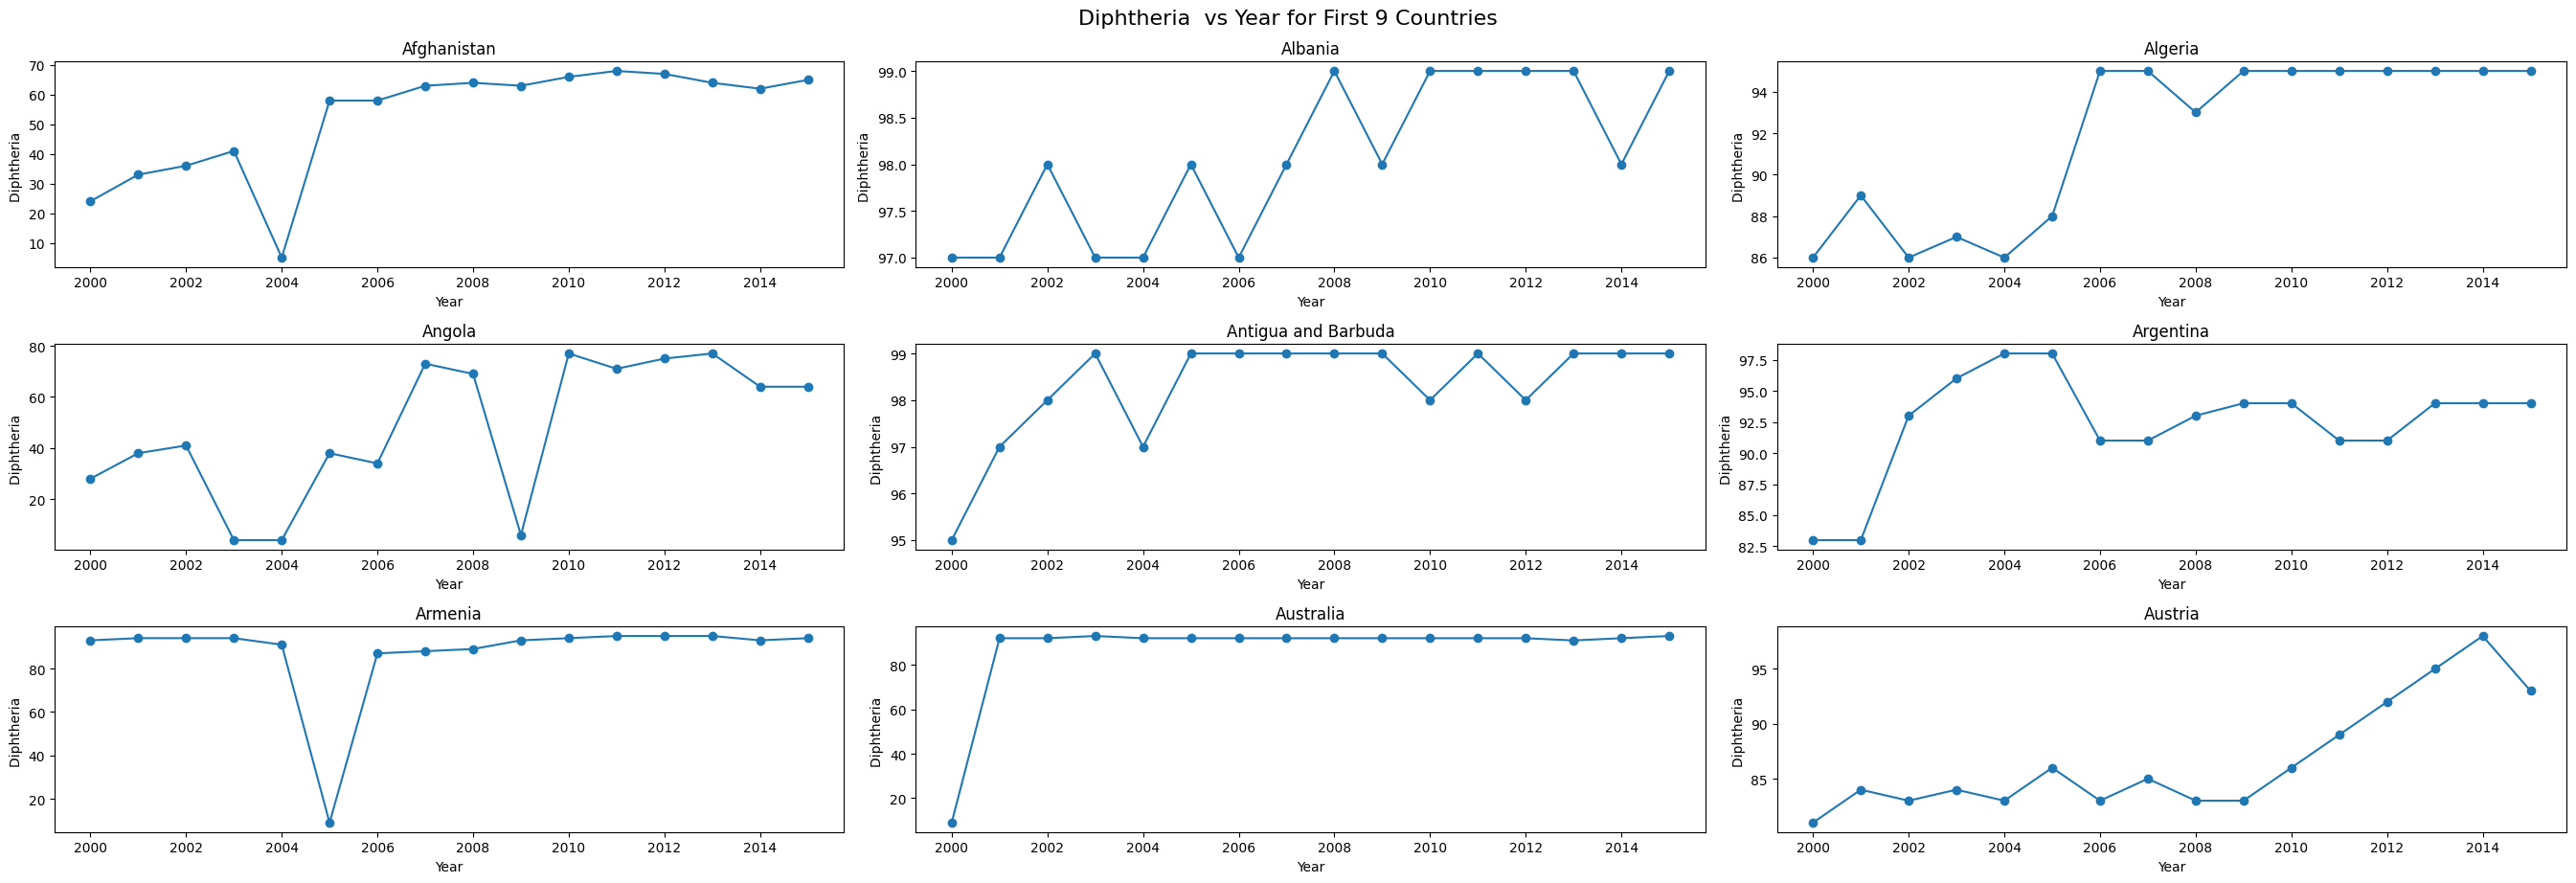

In [147]:

# Plot Diphtheria  vs Year for the first 9 countries using subplots
unique_countries = training_df_clean['Country'].unique()[:9]  # Only first 9 countries
num_countries = len(unique_countries)
cols = 3  # Number of subplots per row
rows = (num_countries // cols) + int(num_countries % cols > 0)

plt.figure(figsize=(9 * cols, 3 * rows))

for i, country in enumerate(unique_countries, 1):
    plt.subplot(rows, cols, i)
    country_data = training_df_clean[training_df_clean['Country'] == country]
    plt.plot(country_data['Year'], country_data['Diphtheria '], marker='o')
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Diphtheria ')
    plt.tight_layout()

plt.suptitle('Diphtheria  vs Year for First 9 Countries', fontsize=16, y=1.02)
plt.show()


This visualization shows Diphtheria vaccination trends over time for the first nine countries in the dataset. It highlights how vaccination coverage has evolved year by year, showing both steady progress in some countries and irregular fluctuations in others. While several countries maintain consistently high coverage, others reveal sudden drops, sharp recoveries, or inconsistent reporting, which may reflect challenges in healthcare delivery or data collection. By uncovering these variations, the plot helps identify countries where vaccination programs are strong and stable versus those where efforts may need reinforcement to improve public health outcomes.

In [148]:
# Fill null values in 'Diphtheria ' with the median for each (Country, Year) group
training_df_clean['Diphtheria '] = training_df_clean.groupby(['Country'])['Diphtheria '].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\agama\AppData\Local\Temp\ipykernel_7376\2081740670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df_clean['Diphtheria '] = training_df_clean.groupby(['Country'])['Diphtheria '].transform(


In [149]:
training_df_clean['Diphtheria '].isnull().sum()

np.int64(0)

# Handling Outliers



We will identify and handle outliers on a country-wise basis, as each country has unique characteristics—what may be an outlier in one country could be a normal value in another.

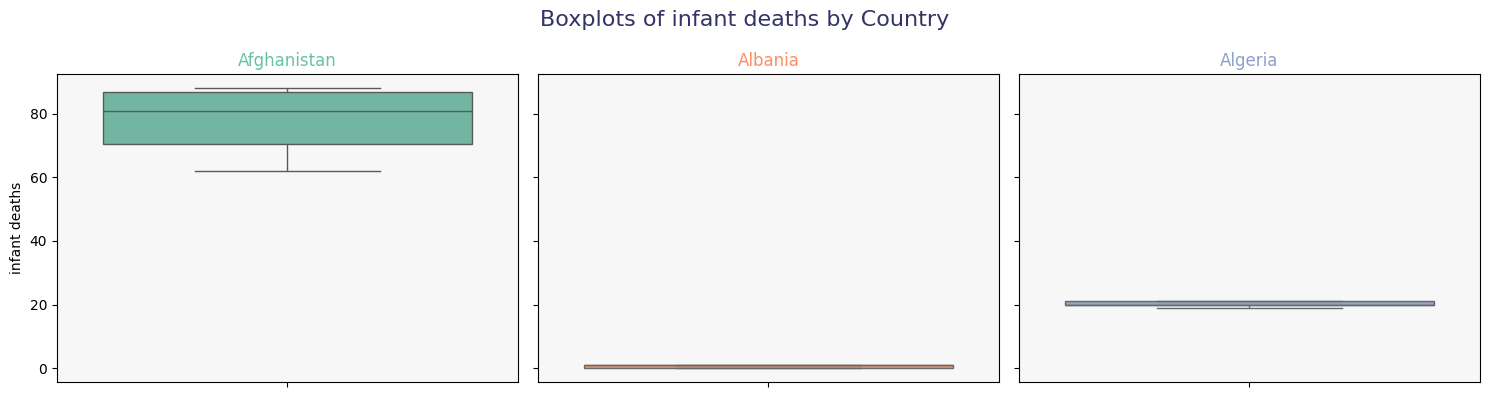

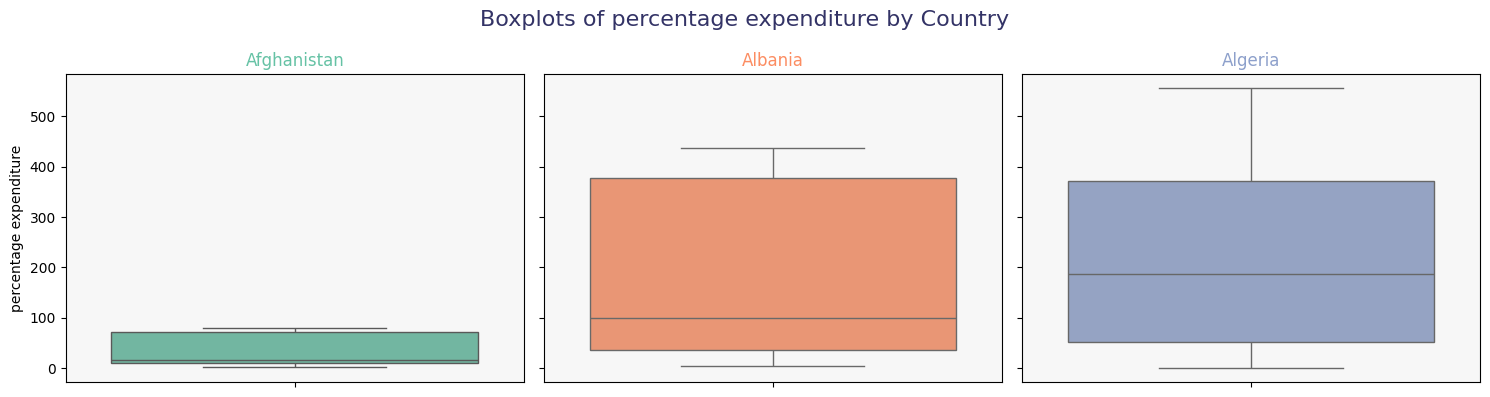

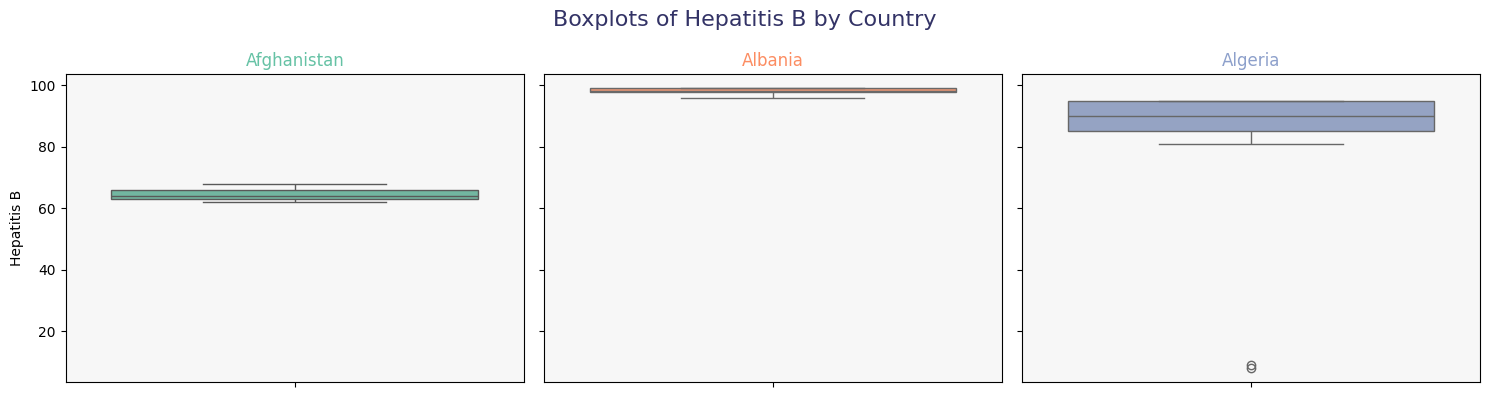

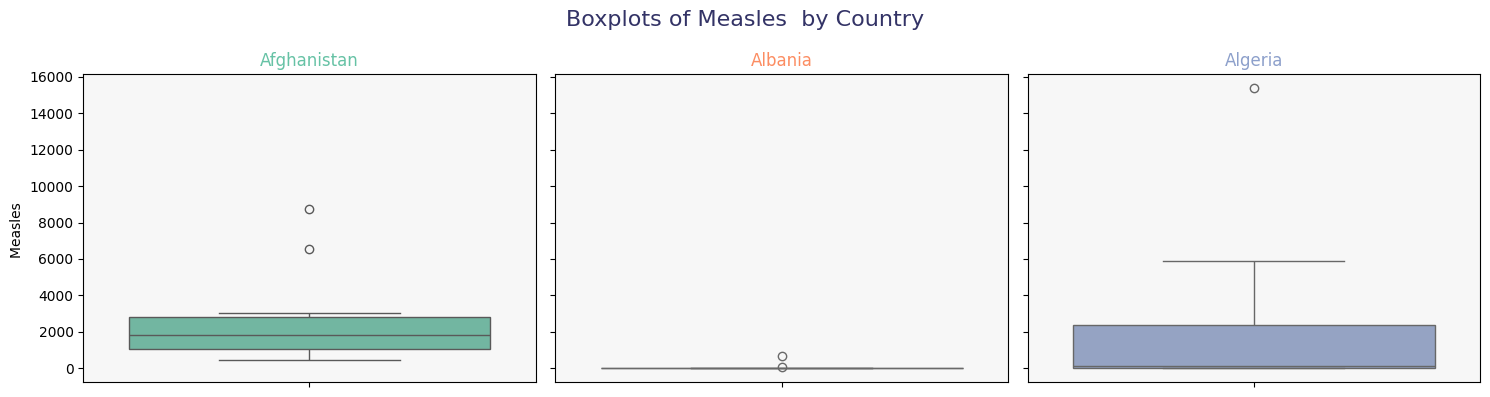

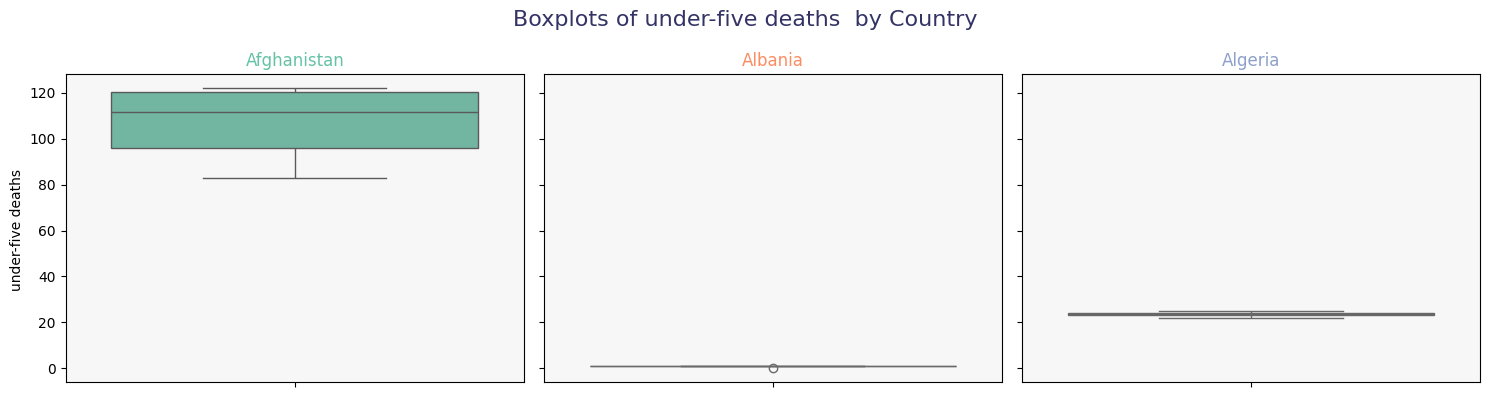

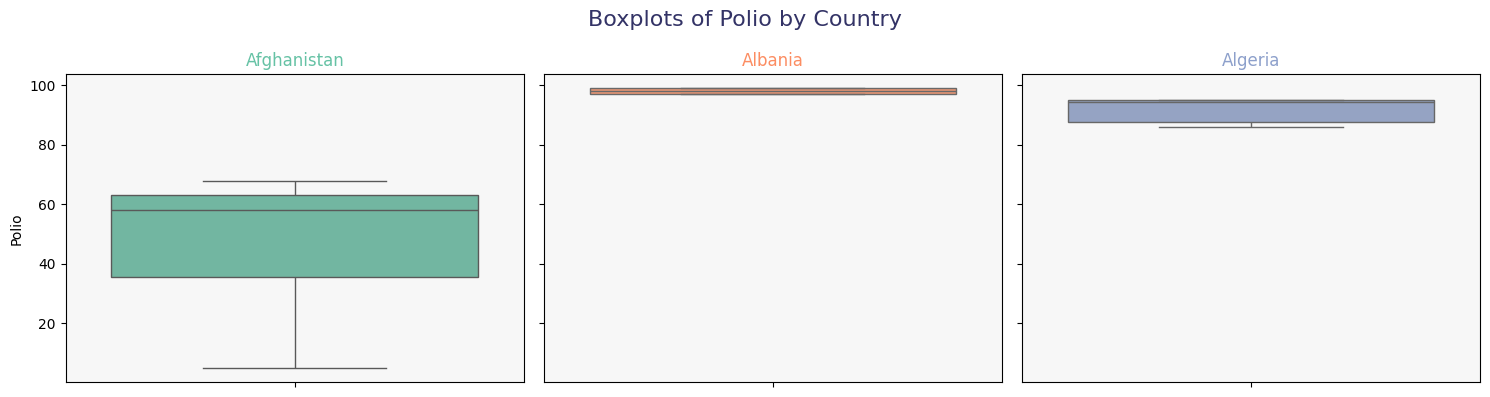

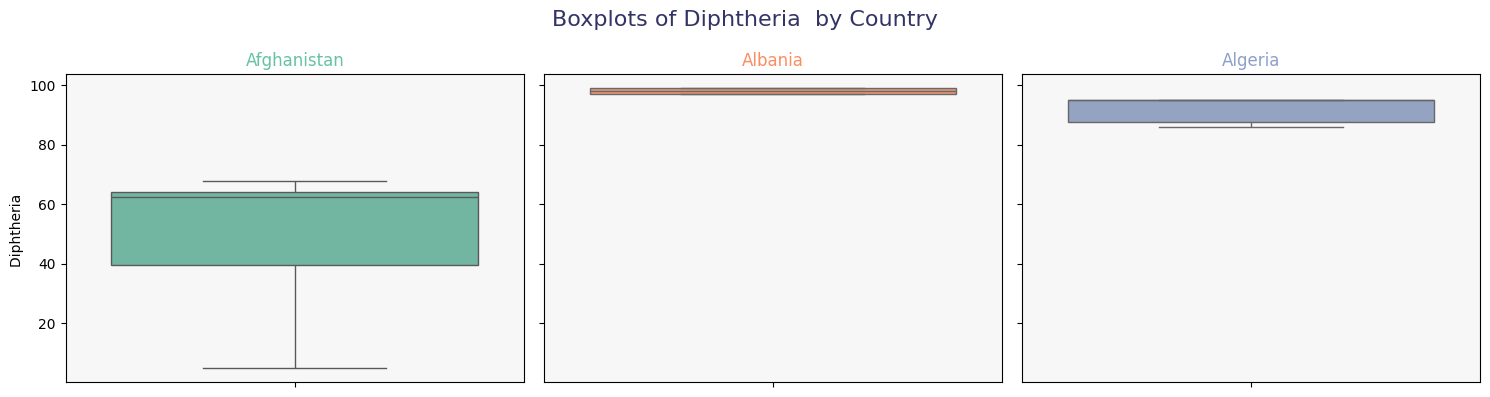

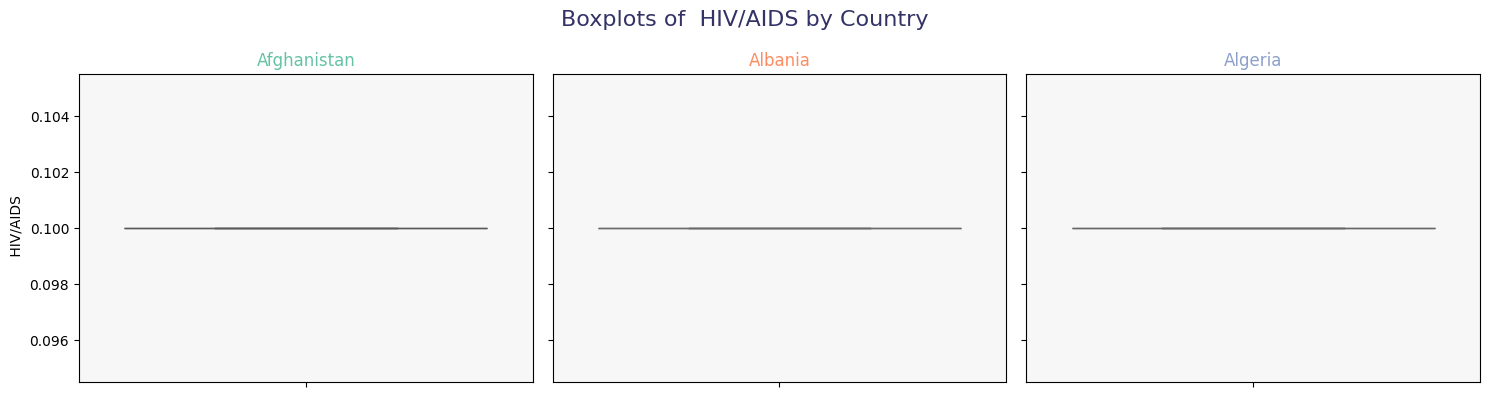

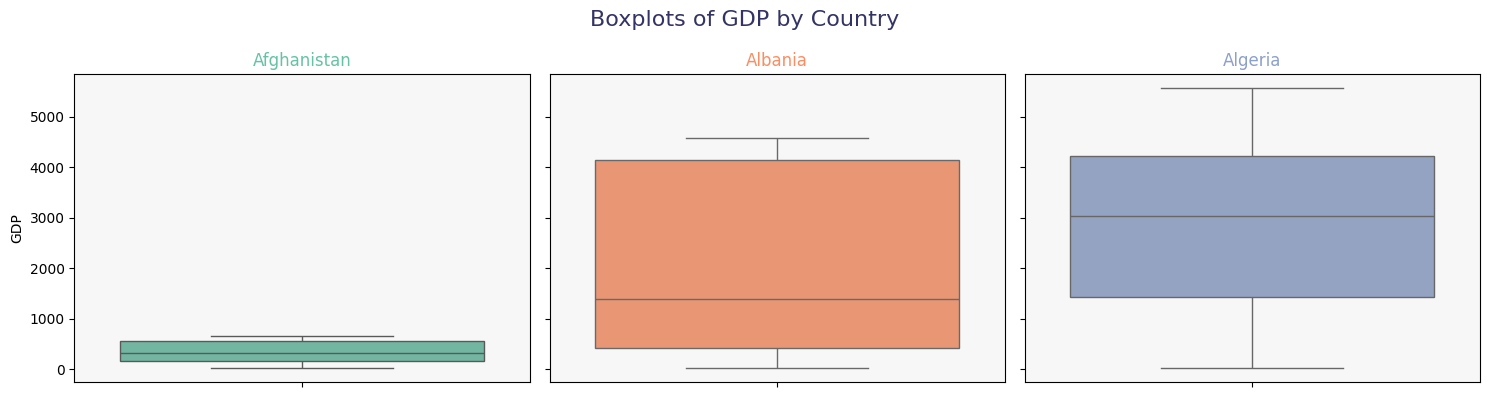

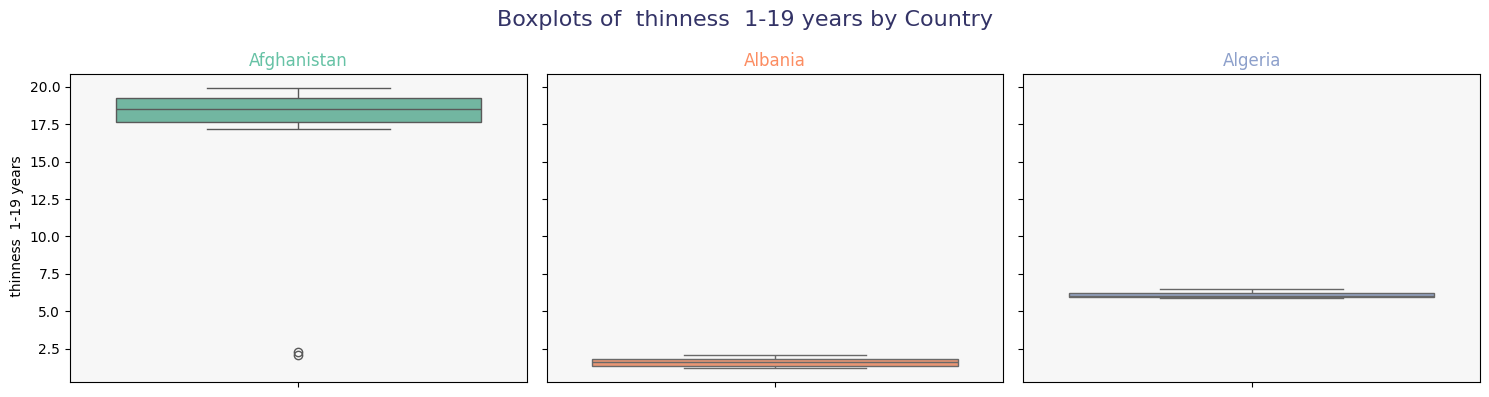

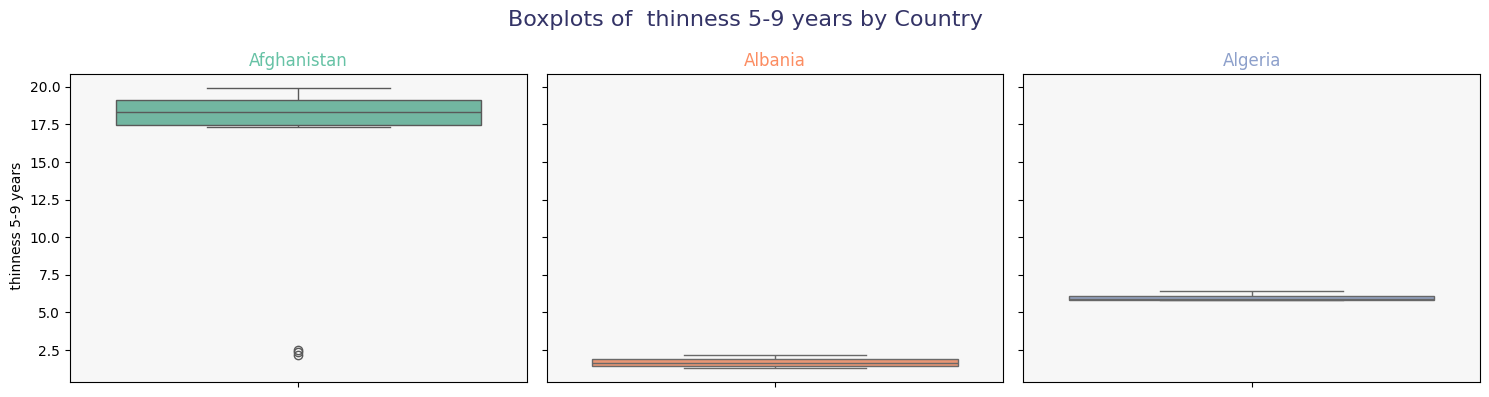

In [150]:
# Visualize distributions and outliers grouped by country (showing first 3 countries for clarity)
selected_countries = training_df_clean['Country'].unique()[:3]  # Pick first 3 countries for demonstration

cols_with_many_outliers = [
    "infant deaths", "percentage expenditure", "Hepatitis B", "Measles ", "under-five deaths ",
    "Polio", "Diphtheria ", " HIV/AIDS", "GDP", " thinness  1-19 years", " thinness 5-9 years"
]

# Use a different color for each country
country_palette = sns.color_palette("Set2", len(selected_countries))

for col in cols_with_many_outliers:
    fig, axes = plt.subplots(1, len(selected_countries), figsize=(5 * len(selected_countries), 4), sharey=True)
    if len(selected_countries) == 1:
        axes = [axes]
    for i, country in enumerate(selected_countries):
        sns.boxplot(
            y=col,
            data=training_df_clean[training_df_clean['Country'] == country],
            ax=axes[i],
            color=country_palette[i]
        )
        axes[i].set_title(f'{country}', fontsize=12, color=country_palette[i])
        axes[i].set_xlabel('')
        axes[i].set_ylabel(col if i == 0 else '')
        axes[i].patch.set_facecolor('#f7f7f7')
    fig.suptitle(f'Boxplots of {col} by Country', fontsize=16, color='#333366')
    plt.tight_layout()
    plt.show()

The boxplots reveal clear differences in health and development indicators across Afghanistan, Albania, and Algeria. Afghanistan consistently records the highest levels of infant and under-five deaths, alongside widespread thinness in children, reflecting significant challenges in healthcare access and nutrition. In contrast, Albania maintains extremely low mortality rates and malnutrition, while Algeria occupies a middle position, performing better than Afghanistan but still facing some health concerns.

Vaccination coverage further highlights these disparities. Albania shows nearly universal immunization for Hepatitis B, Polio, and Diphtheria, indicating strong and consistent healthcare infrastructure. Algeria also achieves high coverage but with more variability and occasional dips. Afghanistan, however, lags behind with lower and more inconsistent vaccination rates, leaving its population more vulnerable to preventable diseases. These gaps in immunization explain the higher prevalence of outbreaks, such as measles, observed in Afghanistan and Algeria, while Albania shows minimal cases.

Economic indicators reinforce the same pattern. Afghanistan’s GDP remains the lowest with little growth, limiting its capacity to invest in healthcare and nutrition. Albania shows stronger GDP levels with moderate variation, while Algeria leads with the highest GDP among the three, though with significant fluctuations. Despite this, both Albania and Algeria allocate more resources to health compared to Afghanistan, as seen in percentage expenditure. Together, these findings suggest that stronger economies and robust immunization programs in Albania and Algeria directly support better health outcomes, while Afghanistan continues to struggle with systemic health and economic challenges.

In [151]:
# Identify outliers in all numerical columns using the IQR method, grouped by country
outlier_indices_by_country = {}

for country in training_df_clean['Country'].unique():
    country_df = training_df_clean[training_df_clean['Country'] == country]
    outlier_indices_by_country[country] = {}
    for col in country_df.select_dtypes(include=np.number).columns:
        Q1 = country_df[col].quantile(0.25)
        Q3 = country_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = country_df[(country_df[col] < lower_bound) | (country_df[col] > upper_bound)].index
        outlier_indices_by_country[country][col] = outliers.tolist()

# Example: print number of outliers per column for each country
for country, col_dict in outlier_indices_by_country.items():
    print(f"\nCountry: {country}")
    for col, idxs in col_dict.items():
        print(f"  {col}: {len(idxs)} outliers")


Country: Afghanistan
  Year: 0 outliers
  Life expectancy : 1 outliers
  Adult Mortality: 1 outliers
  infant deaths: 0 outliers
  Alcohol: 0 outliers
  percentage expenditure: 0 outliers
  Hepatitis B: 0 outliers
  Measles : 2 outliers
   BMI : 0 outliers
  under-five deaths : 0 outliers
  Polio: 0 outliers
  Total expenditure: 0 outliers
  Diphtheria : 0 outliers
   HIV/AIDS: 0 outliers
  GDP: 0 outliers
   thinness  1-19 years: 2 outliers
   thinness 5-9 years: 3 outliers
  Income composition of resources: 0 outliers
  Schooling: 0 outliers

Country: Albania
  Year: 0 outliers
  Life expectancy : 0 outliers
  Adult Mortality: 0 outliers
  infant deaths: 0 outliers
  Alcohol: 0 outliers
  percentage expenditure: 0 outliers
  Hepatitis B: 0 outliers
  Measles : 2 outliers
   BMI : 1 outliers
  under-five deaths : 1 outliers
  Polio: 0 outliers
  Total expenditure: 0 outliers
  Diphtheria : 0 outliers
   HIV/AIDS: 0 outliers
  GDP: 0 outliers
   thinness  1-19 years: 0 outliers
   thi

Since capping outliers alters the IQR, we save the original IQR values before capping. This allows us to later verify that outliers have been correctly handled using the initial bounds.

In [152]:
# Store lower and upper bounds for each country and each numerical column for later use

bounds_by_country_col = {}

for country in training_df_clean['Country'].unique():
    country_df = training_df_clean[training_df_clean['Country'] == country]
    bounds_by_country_col[country] = {}
    for col in country_df.select_dtypes(include=np.number).columns:
        Q1 = country_df[col].quantile(0.25)
        Q3 = country_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds_by_country_col[country][col] = {'lower': lower_bound, 'upper': upper_bound}

# Example: print bounds for "Measles " for a specific country
print(bounds_by_country_col['Afghanistan']['infant deaths'])

{'lower': np.float64(45.75), 'upper': np.float64(111.75)}


In [153]:
# Combine all outlier indices found country-wise and display the count of outliers per column

# Combine outlier indices for each column across all countries
from collections import defaultdict

combined_outlier_indices = defaultdict(set)

for country, col_dict in outlier_indices_by_country.items():
    for col, idxs in col_dict.items():
        combined_outlier_indices[col].update(idxs)

# Display the count of unique outliers per column
outlier_counts_per_column = {col: len(idxs) for col, idxs in combined_outlier_indices.items()}
outlier_counts_series = pd.Series(outlier_counts_per_column).sort_values(ascending=False)

print("Count of unique outliers per column (country-wise):")
print(outlier_counts_series)


Count of unique outliers per column (country-wise):
Alcohol                            336
Measles                            310
 BMI                               282
Hepatitis B                        275
Adult Mortality                    274
Polio                              252
Diphtheria                         238
Total expenditure                  120
Life expectancy                     91
 thinness  1-19 years               88
 thinness 5-9 years                 83
Schooling                           75
infant deaths                       74
under-five deaths                   73
percentage expenditure              44
 HIV/AIDS                           36
Income composition of resources     25
GDP                                 21
Year                                 0
dtype: int64


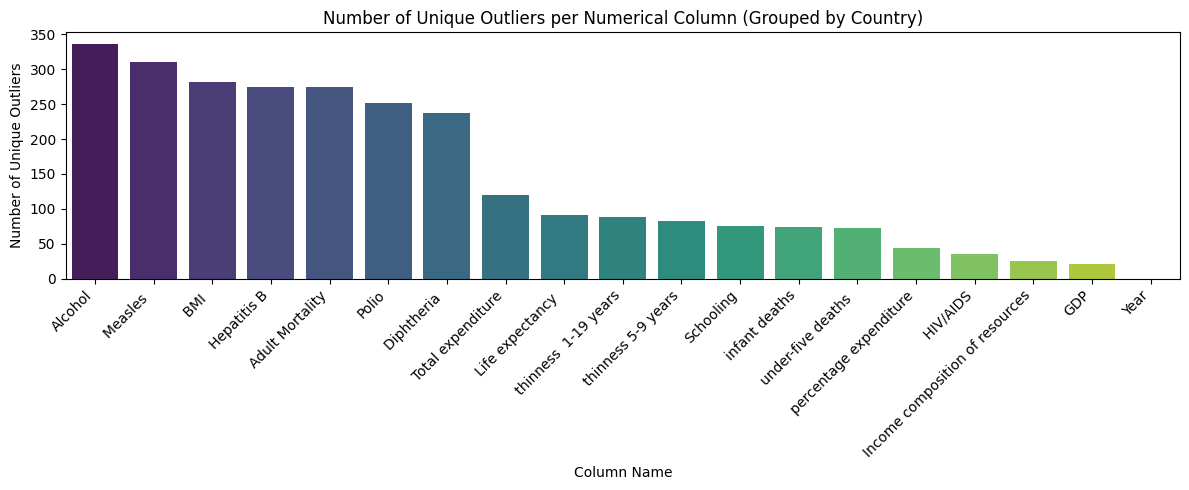

In [154]:
#Visualize
plt.figure(figsize=(12, 5))
sns.barplot(x=outlier_counts_series.index, y=outlier_counts_series.values, palette="viridis")
plt.title("Number of Unique Outliers per Numerical Column (Grouped by Country)")
plt.ylabel("Number of Unique Outliers")
plt.xlabel("Column Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [155]:
outlier_cols = outlier_counts_series[outlier_counts_series > 0].index.tolist()
outlier_cols.remove('Life expectancy ')# Remove target variable if present
print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Alcohol', 'Measles ', ' BMI ', 'Hepatitis B', 'Adult Mortality', 'Polio', 'Diphtheria ', 'Total expenditure', ' thinness  1-19 years', ' thinness 5-9 years', 'Schooling', 'infant deaths', 'under-five deaths ', 'percentage expenditure', ' HIV/AIDS', 'Income composition of resources', 'GDP']


We need to ensure there are no negative values, as negative values are not logically valid for any of the columns in our dataset.

In [156]:
# Fill outliers (capping) with the lower or upper bound for each country and column,
# ensuring lower bound is not less than zero for columns where negative values are not logical

non_negative_cols = [
    "Adult Mortality",            # rate, cannot be negative
    "infant deaths",              # count, cannot be negative
    "Alcohol",                    # liters per capita, cannot be negative
    "percentage expenditure",     # percent, cannot be negative
    "Hepatitis B",                # percent, cannot be negative
    "Measles",                    # count, cannot be negative
    " BMI ",                      # BMI, cannot be negative
    "under-five deaths ",         # count, cannot be negative
    "Polio",                      # percent, cannot be negative
    "Total expenditure",          # USD, cannot be negative
    "Diphtheria ",                # percent, cannot be negative
    " HIV/AIDS",                  # percent, cannot be negative
    "GDP",                        # USD, cannot be negative
    " thinness  1-19 years",      # percent, cannot be negative
    " thinness 5-9 years",        # percent, cannot be negative
    "Income composition of resources", # 0-1, cannot be negative
    "Schooling"                   # years, cannot be negative
]

for col in outlier_cols:
    for country in training_df_clean['Country'].unique():
        country_mask = training_df_clean['Country'] == country
        # Use saved bounds
        lower_bound = bounds_by_country_col[country][col]['lower']
        upper_bound = bounds_by_country_col[country][col]['upper']
        # If column should not have negative values, cap lower_bound at 0
        if col in non_negative_cols:
            lower_bound = max(lower_bound, 0)
        # Fill values below lower_bound
        training_df_clean.loc[country_mask & (training_df_clean[col] < lower_bound), col] = lower_bound
        # Fill values above upper_bound
        training_df_clean.loc[country_mask & (training_df_clean[col] > upper_bound), col] = upper_bound

In [157]:
# Check if all outliers have been removed after capping (country-wise) using saved bounds

remaining_outliers_countrywise = {}

for col in outlier_cols:
    count = 0
    for country in training_df_clean['Country'].unique():
        country_data = training_df_clean[training_df_clean['Country'] == country][col]
        # Use the previously saved bounds
        lower_bound = bounds_by_country_col[country][col]['lower']
        upper_bound = bounds_by_country_col[country][col]['upper']
        outliers = country_data[(country_data < lower_bound) | (country_data > upper_bound)]
        count += outliers.shape[0]
    remaining_outliers_countrywise[col] = count

remaining_outliers_countrywise = pd.Series(remaining_outliers_countrywise)
print("Number of remaining outliers after capping (country-wise, should be 0 for all columns):")
print(remaining_outliers_countrywise)

Number of remaining outliers after capping (country-wise, should be 0 for all columns):
Alcohol                            0
Measles                            0
 BMI                               0
Hepatitis B                        0
Adult Mortality                    0
Polio                              0
Diphtheria                         0
Total expenditure                  0
 thinness  1-19 years              0
 thinness 5-9 years                0
Schooling                          0
infant deaths                      0
under-five deaths                  0
percentage expenditure             0
 HIV/AIDS                          0
Income composition of resources    0
GDP                                0
dtype: int64


# Feature Selection

### Approach 1: Correlation Matrix

Correlation is used for feature selection to identify which numerical features have a strong linear relationship with the target variable. Features that are highly correlated with the target are more likely to be useful predictors in a regression or classification model

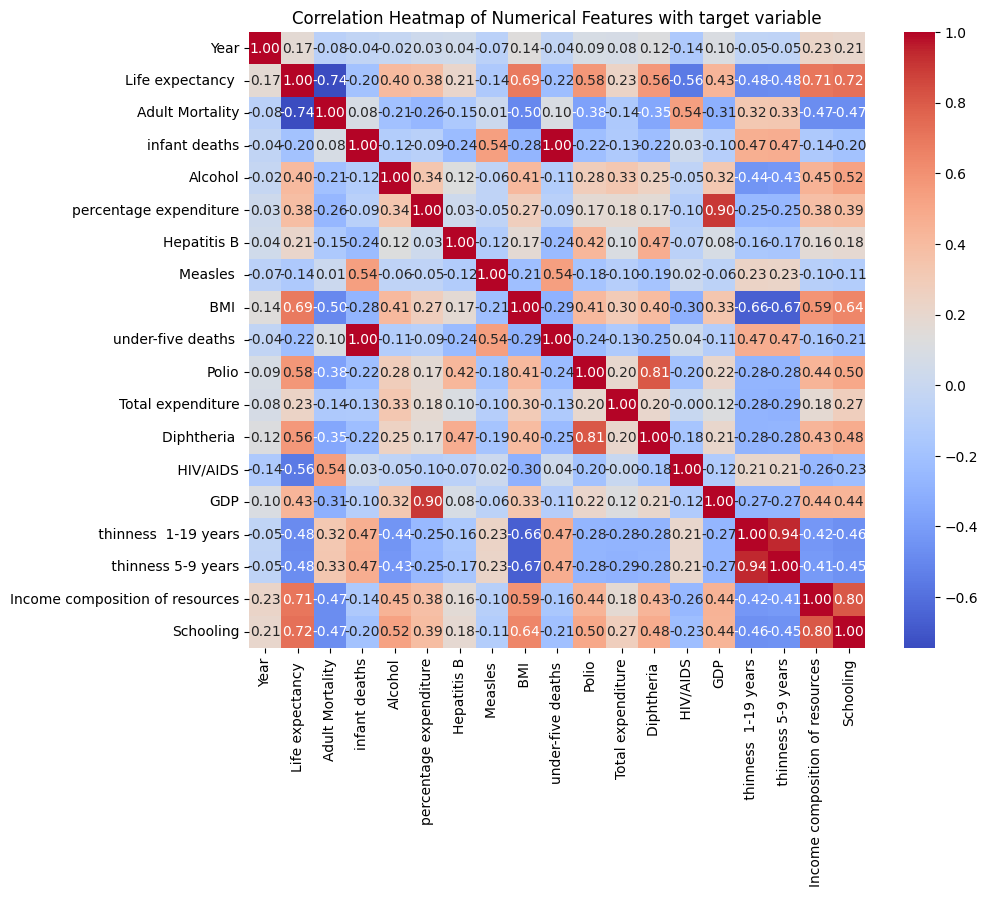

In [158]:
# Correlation Matrix
corr_cols=training_df_clean.select_dtypes(include=np.number).columns
corr_matrix = training_df_clean[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features with target variable')
plt.show()




In [159]:

# Calculate correlation of each numerical feature with the target if possible
try:
    correlations = training_df_clean[corr_cols].corrwith(training_df_clean['Life expectancy '])
    correlations = correlations.sort_values(ascending=False)
    print('Correlation of numerical features with target (y) in descending order:')
    print(correlations)
except Exception as e:
    print('DataFrame or target not loaded yet:', e)

Correlation of numerical features with target (y) in descending order:
Life expectancy                    1.000000
Schooling                          0.724630
Income composition of resources    0.705276
 BMI                               0.687804
Polio                              0.575391
Diphtheria                         0.564523
GDP                                0.433395
Alcohol                            0.403076
percentage expenditure             0.381376
Total expenditure                  0.230669
Hepatitis B                        0.210534
Year                               0.170033
Measles                           -0.143756
infant deaths                     -0.196577
under-five deaths                 -0.222325
 thinness 5-9 years               -0.476242
 thinness  1-19 years             -0.482211
 HIV/AIDS                         -0.556624
Adult Mortality                   -0.744401
dtype: float64


We will select the highly corerelated columns for modelling


In [160]:
# List columns with correlation outside the range -0.2 to 0.2
strong_corr_cols = correlations[(correlations < -0.2) | (correlations > 0.2)].index.tolist()
print('Columns with correlation outside [-0.2, 0.2]:')
print(strong_corr_cols)

Columns with correlation outside [-0.2, 0.2]:
['Life expectancy ', 'Schooling', 'Income composition of resources', ' BMI ', 'Polio', 'Diphtheria ', 'GDP', 'Alcohol', 'percentage expenditure', 'Total expenditure', 'Hepatitis B', 'under-five deaths ', ' thinness 5-9 years', ' thinness  1-19 years', ' HIV/AIDS', 'Adult Mortality']


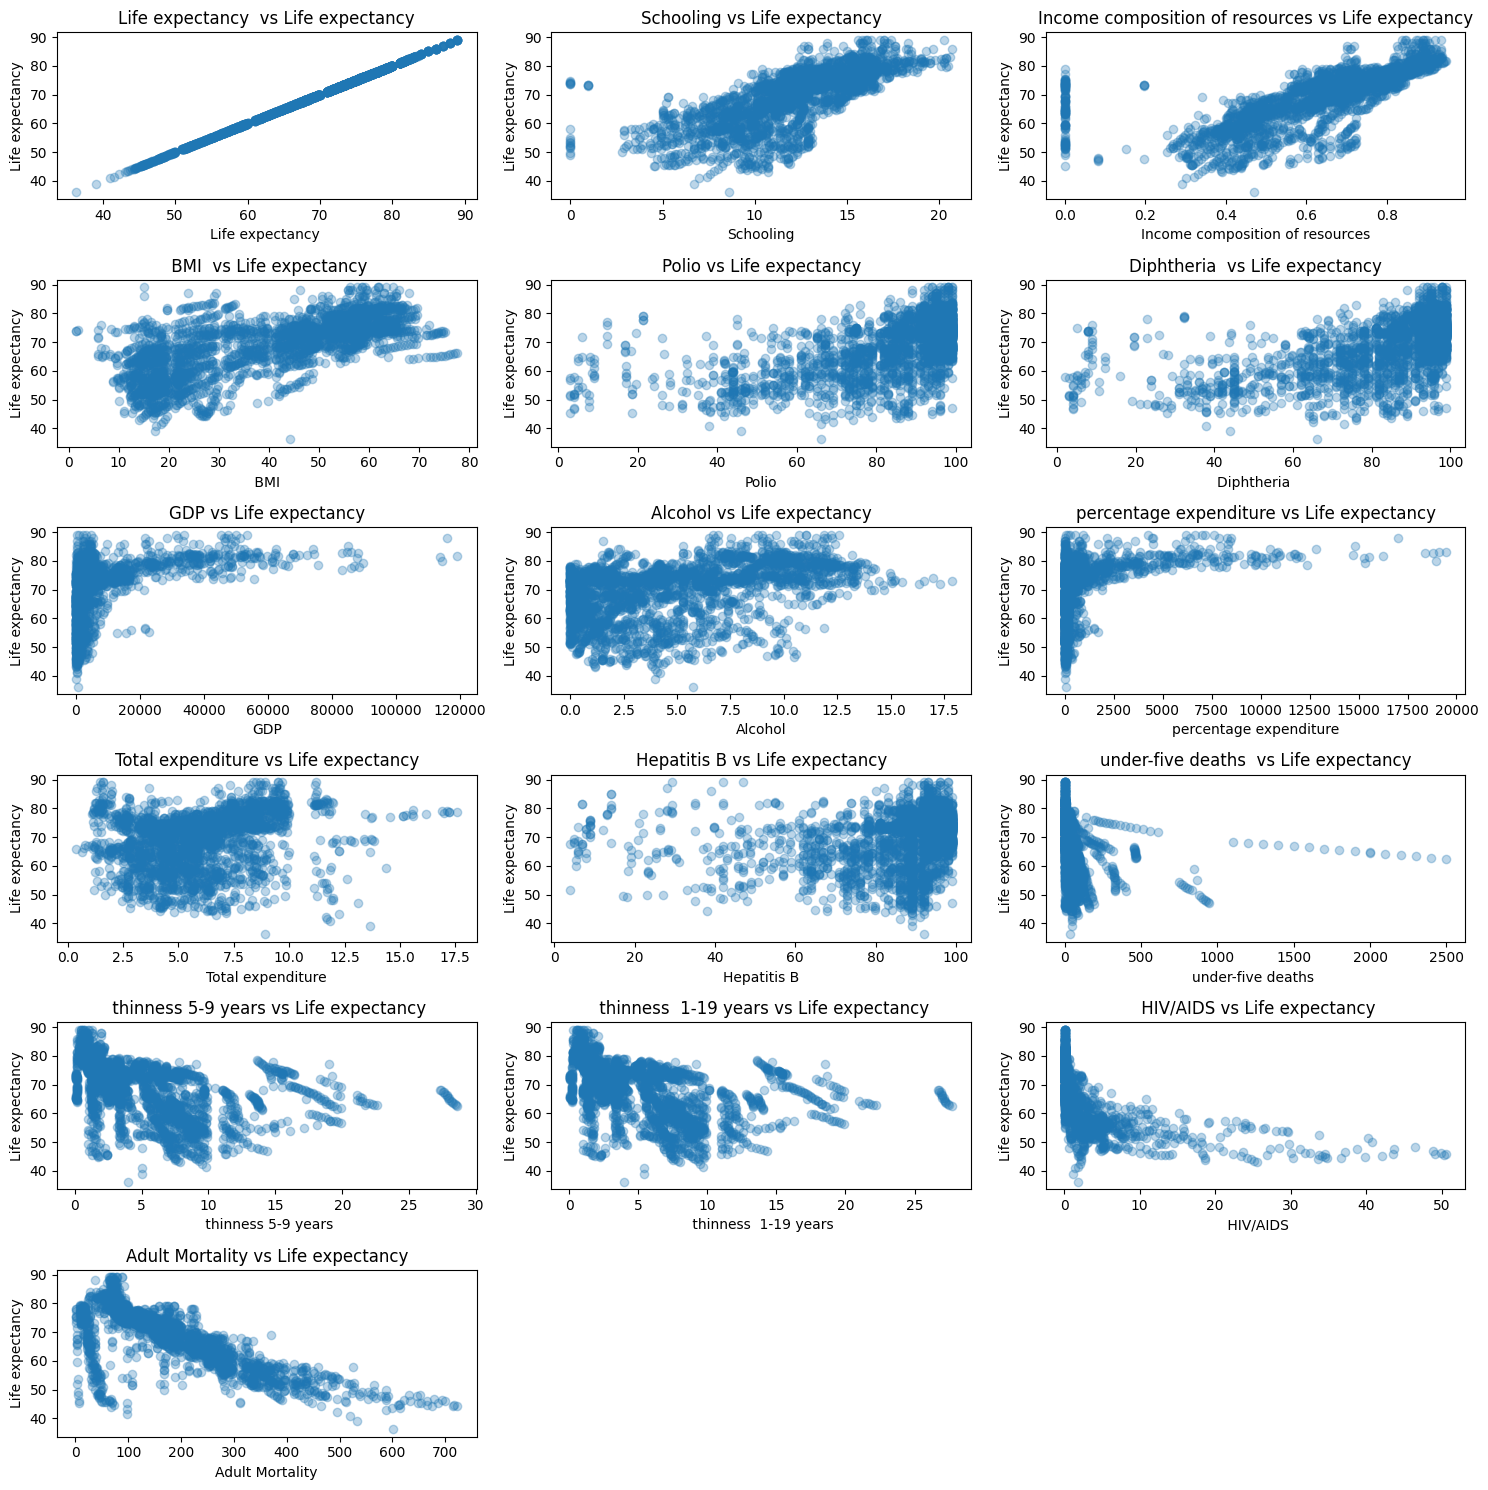

In [161]:
# Plot scatter plots for strong correlation columns in a  grid of subplots
n = len(strong_corr_cols)
fig, axes = plt.subplots(6, 3, figsize=(15, 15))
axes = axes.flatten()

y_numeric = training_df_clean['Life expectancy ']

for i, col in enumerate(strong_corr_cols):
    if training_df_clean[col].nunique() > 1:
        axes[i].scatter(training_df_clean[col], y_numeric, alpha=0.3)
        axes[i].set_title(f'{col} vs Life expectancy')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Life expectancy')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

This grid of scatter plots highlights how different health, social, and economic factors relate to life expectancy. Strong positive associations are visible with schooling, income composition of resources, GDP, and immunization coverage (Polio, Diphtheria, Hepatitis B). Countries with higher average years of schooling, stronger income equality, and better vaccination coverage tend to achieve significantly higher life expectancy, reflecting the importance of education and public health infrastructure. Similarly, GDP shows a steep rise in life expectancy at lower income levels, before plateauing at higher GDP, suggesting diminishing returns once basic needs are met.

Negative relationships are equally clear. Higher adult mortality, infant deaths, under-five deaths, HIV/AIDS prevalence, and thinness (both 5–9 years and 1–19 years) strongly correspond with lower life expectancy. These patterns emphasize how preventable diseases, poor nutrition, and weak healthcare systems directly reduce survival rates. Outliers are present, such as countries with relatively high alcohol consumption but still strong life expectancy, pointing to the influence of cultural or healthcare safety nets.

Overall, the scatter plots confirm that life expectancy is a multifactorial outcome shaped by both health and socio-economic conditions. Investments in education, healthcare access, vaccination programs, and economic growth appear to drive improvements, while high disease burden, malnutrition, and inequality act as major constraints. This reinforces the importance of holistic development policies that address both health infrastructure and broader socio-economic foundations.

We will keep all these features as the possess strong correlation with the target column suggesting linear relationship with the target column and are crucial for predciting the target variable ie. Life expectancy
We will append these column names in final features list later

### Approach 2:  Kruskal-Wallis H-test (non-parametric)

- For Categorical columns we will use KRUSKAL WALLIS H-test
- We use the Kruskal-Wallis H-test for categorical columns because it is a non-parametric statistical test that determines whether there are statistically significant differences between the distributions of a continuous variable (such as the target) across two or more groups defined by a categorical feature.

In [162]:
for col in categorical_cols:
    groups = [training_df_clean[training_df_clean[col] == cat]['Life expectancy '] for cat in training_df_clean[col].dropna().unique()]
    if len(groups) > 1:
        stat, p = kruskal(*groups)
        print(f"{col}: p-value = {p}")

Country: p-value = 0.0
Status: p-value = 1.3699477628273501e-191


Country: p-value = 0.0
 - There is a statistically significant difference in life expectancy distributions between at least some countries. Country is an important feature.

Status: p-value = 1.37e-191
 - There is a statistically significant difference in life expectancy distributions between the different Status groups (e.g., Developed vs Developing). Status is also an important feature.

### Final Selection of Features


In [163]:
features_list = []

In [164]:
for cols in strong_corr_cols:
    features_list.append(cols)
features_list

['Life expectancy ',
 'Schooling',
 'Income composition of resources',
 ' BMI ',
 'Polio',
 'Diphtheria ',
 'GDP',
 'Alcohol',
 'percentage expenditure',
 'Total expenditure',
 'Hepatitis B',
 'under-five deaths ',
 ' thinness 5-9 years',
 ' thinness  1-19 years',
 ' HIV/AIDS',
 'Adult Mortality']

In [165]:
features_list.append('Country')
features_list.append('Status')
features_list.remove('Life expectancy ')# Remove target variable if present


# Data Transformation

In [166]:
# Create copy of datasets

training_df_trans = training_df_clean[features_list].copy()


### Log transformation for skewed column



Check the skewness of the numerical columns

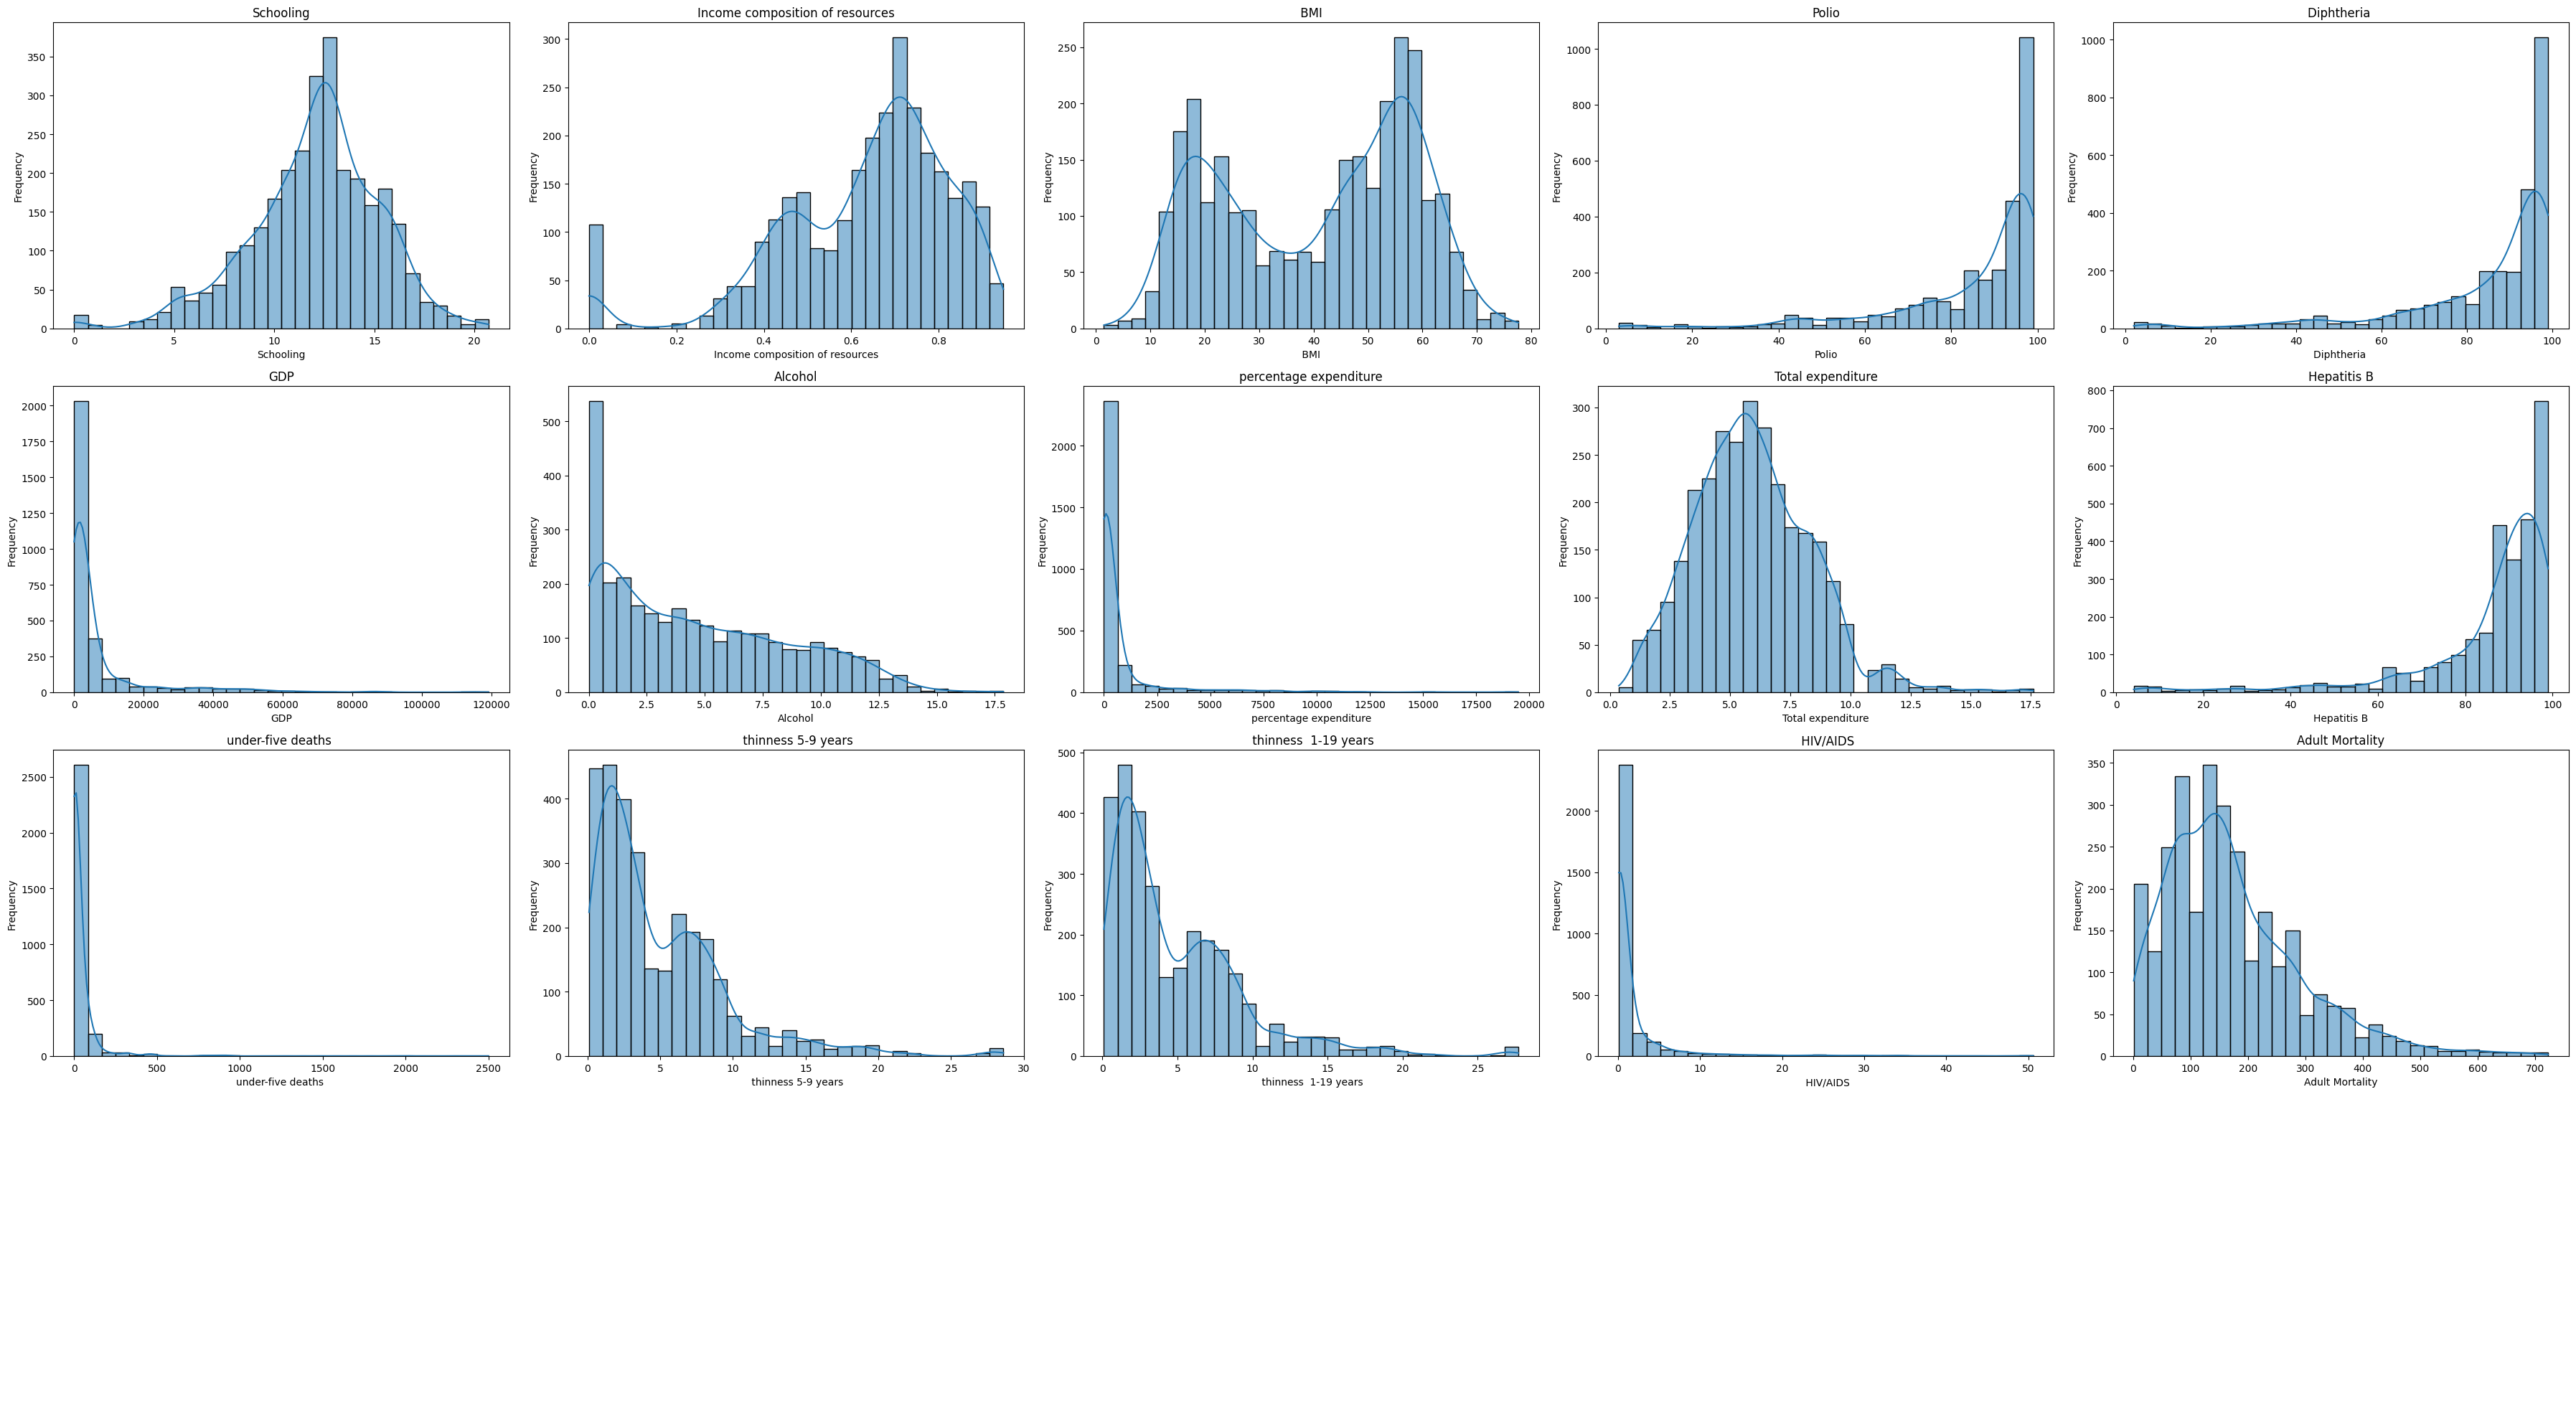

In [167]:
# 1. Histogram: Visualize the distribution of each numerical variable with histograms in a 4 x 5 grid

# Remove 'Country' and 'Status' from features_list for plotting
plot_features = [col for col in features_list if col not in ['Country', 'Status']]

fig, axes = plt.subplots(4, 5, figsize=(36, 20))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

for i, var in enumerate(plot_features):
    sns.histplot(training_df_trans[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

These histograms show clear patterns across variables. Schooling, BMI, and Total expenditure follow roughly normal or multi-modal distributions, while GDP, percentage expenditure, under-five deaths, and HIV/AIDS are highly right-skewed with a few extreme outliers. Immunization variables (Polio, Diphtheria, Hepatitis B) are concentrated near 90–100%, reflecting high global coverage but with some countries lagging behind. Thinness (5–9 and 1–19 years) and mortality factors also reveal skewness, where most countries report low values but a few face severe health issues. Overall, the plots highlight global inequalities and the presence of skewed variables that may need transformation for analysis.

In [168]:
# Identify numerical columns with high right skewness and apply log1p transformation

# 1. Identify columns with skewness > 1 (highly right skewed)
skewed_cols = []
for col in [col for col in features_list if col not in ['Country', 'Status']]:
    skewness = training_df_trans[col].skew()
    if skewness > 1:
        skewed_cols.append(col)
        print(f"{col}: skewness = {skewness:.2f}")

GDP: skewness = 3.54
percentage expenditure: skewness = 4.65
under-five deaths : skewness = 9.48
 thinness 5-9 years: skewness = 1.79
 thinness  1-19 years: skewness = 1.72
 HIV/AIDS: skewness = 5.39
Adult Mortality: skewness = 1.25


### Log Transform to deal with skewness

We use log transformation for skewness because it reduces the impact of extreme values and makes highly right-skewed data more symmetric. This helps many machine learning algorithms perform better, as they often assume features are normally distributed.

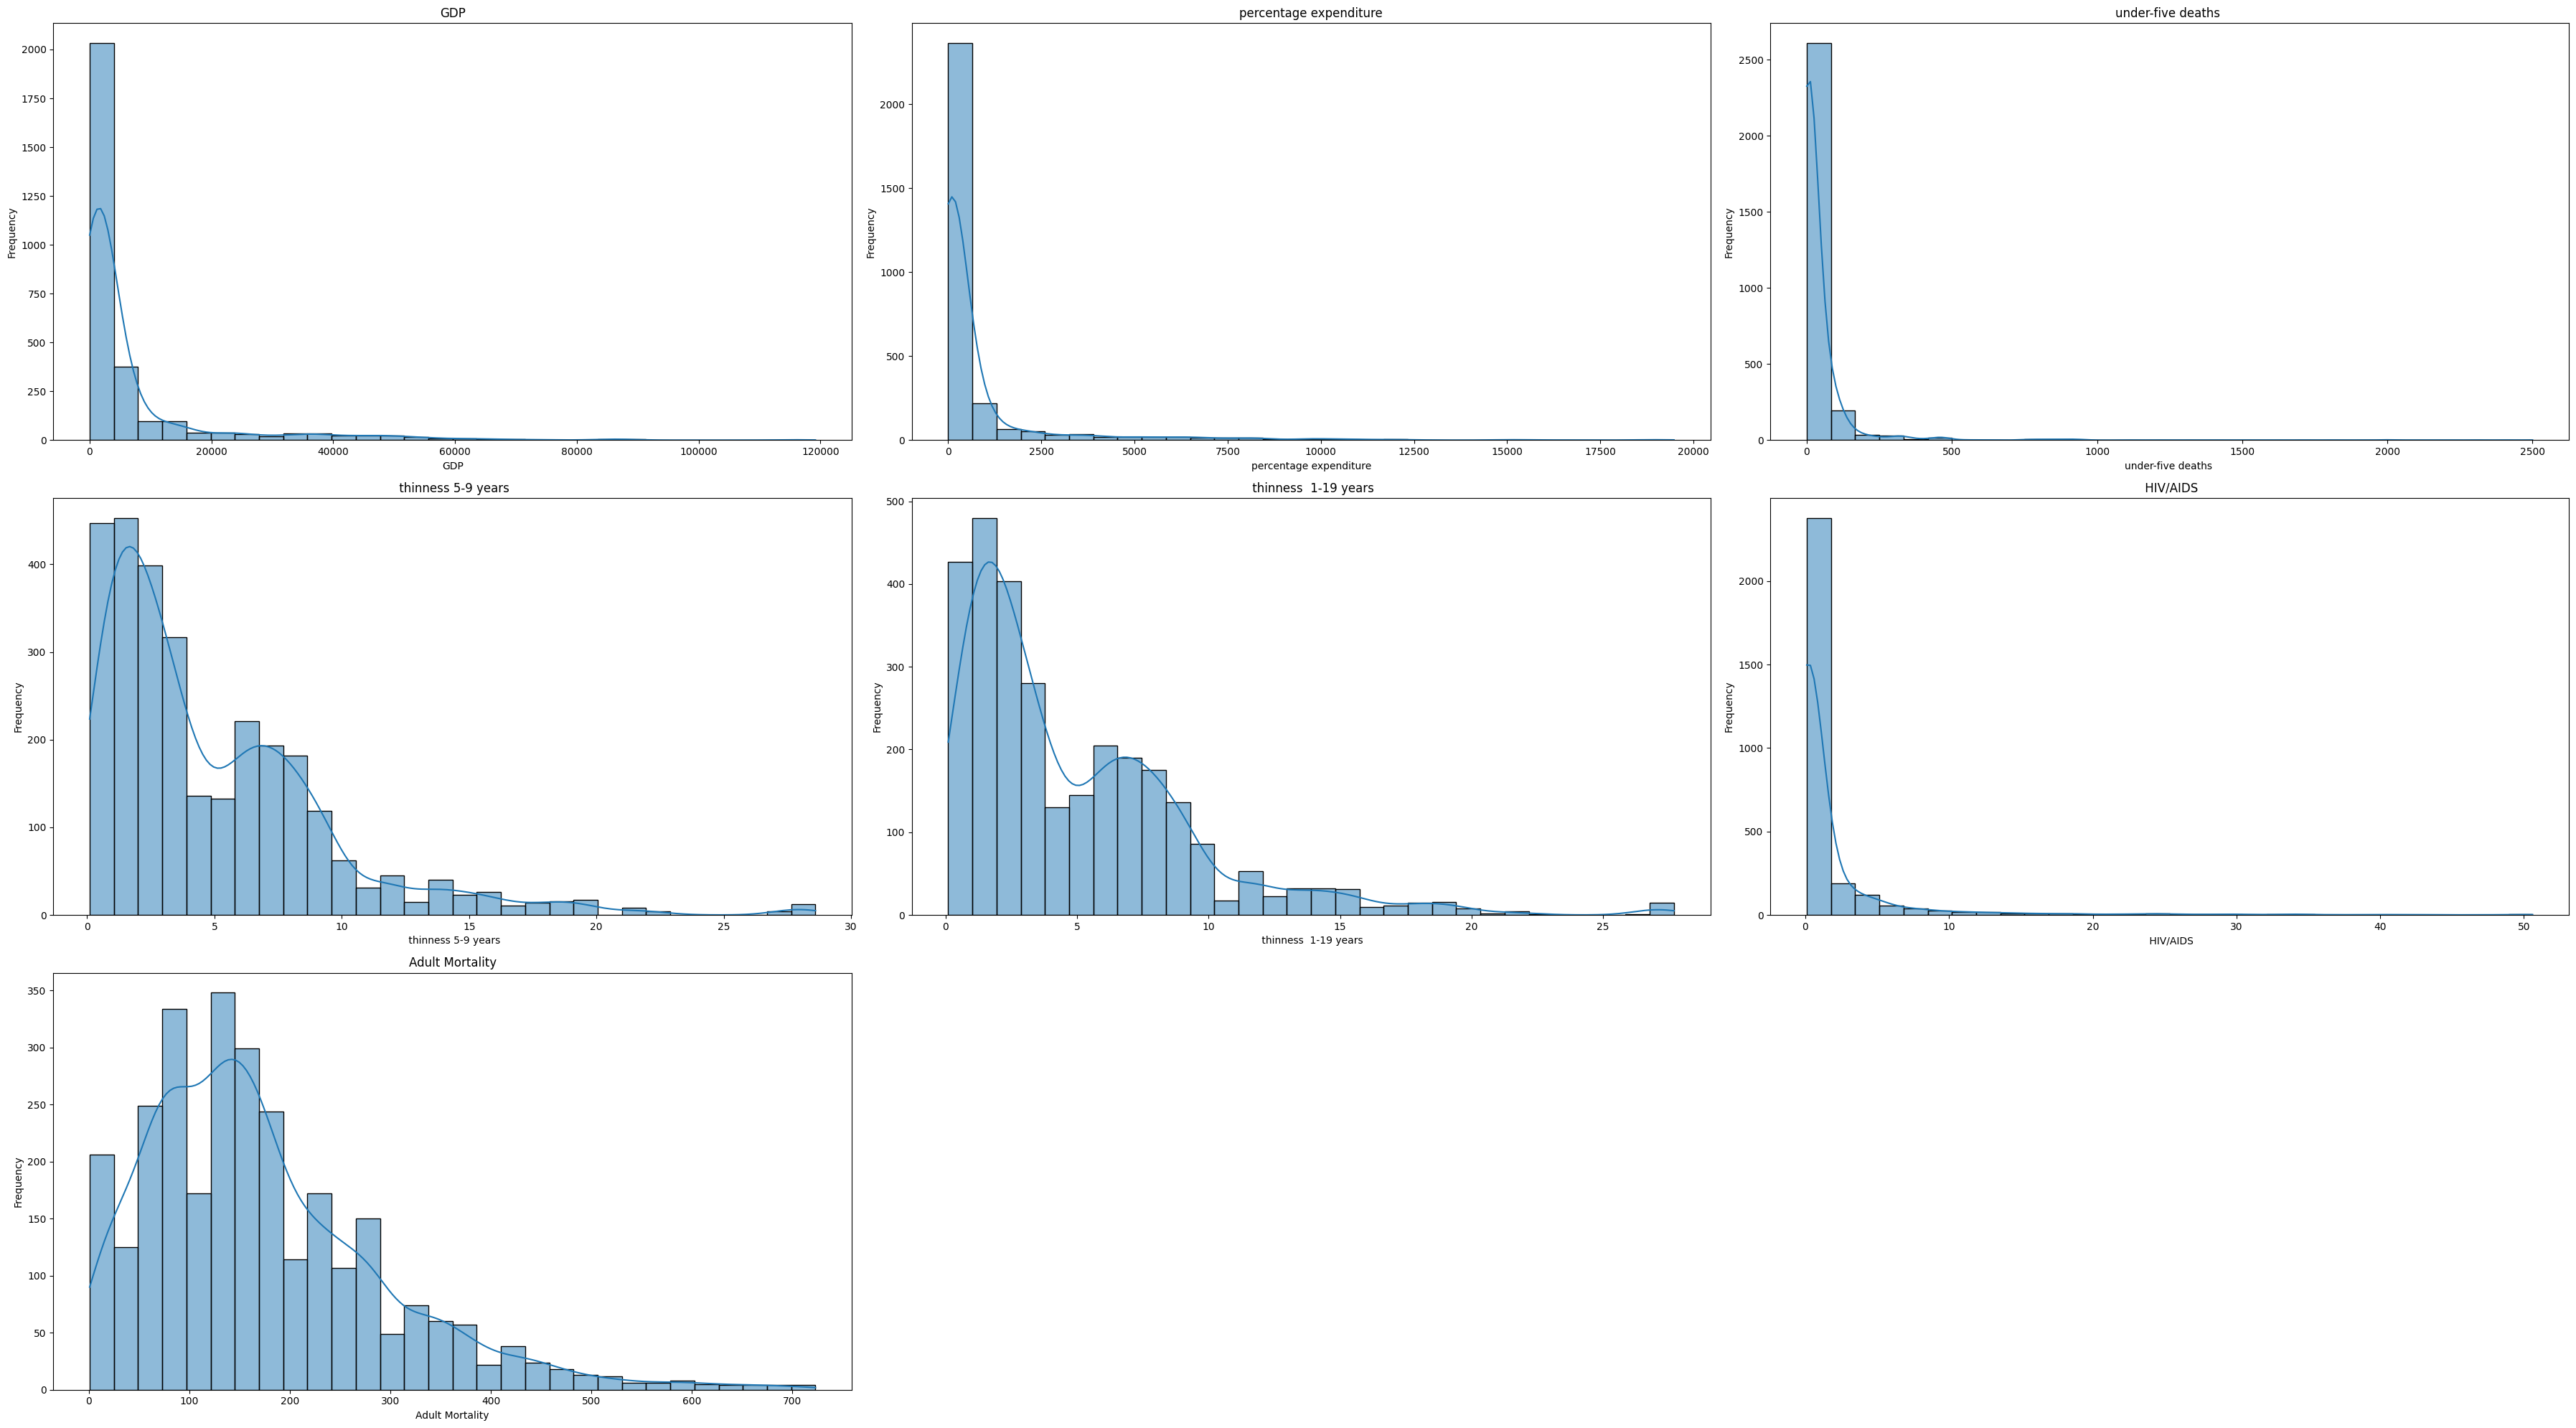

In [169]:
# 1. Histogram: Visualize the distribution of each numerical variable with histograms in a 3 x 3 grid

# Remove 'Country' and 'Status' from features_list for plotting
plot_features =skewed_cols

fig, axes = plt.subplots(3, 3, figsize=(36, 20))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

for i, var in enumerate(plot_features):
    sns.histplot(training_df_trans[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [170]:
# Apply log1p (log(1+x)) transformation to right-skewed columns (if all values >= 0)
for col in skewed_cols:
    if (training_df_trans[col] >= 0).all():
        training_df_trans[col] = np.log1p(training_df_trans[col])
        print(f"Applied log1p to {col}")
    else:
        print(f"Skipped {col} (contains negative values)")

Applied log1p to GDP
Applied log1p to percentage expenditure
Applied log1p to under-five deaths 
Applied log1p to  thinness 5-9 years
Applied log1p to  thinness  1-19 years
Applied log1p to  HIV/AIDS
Applied log1p to Adult Mortality


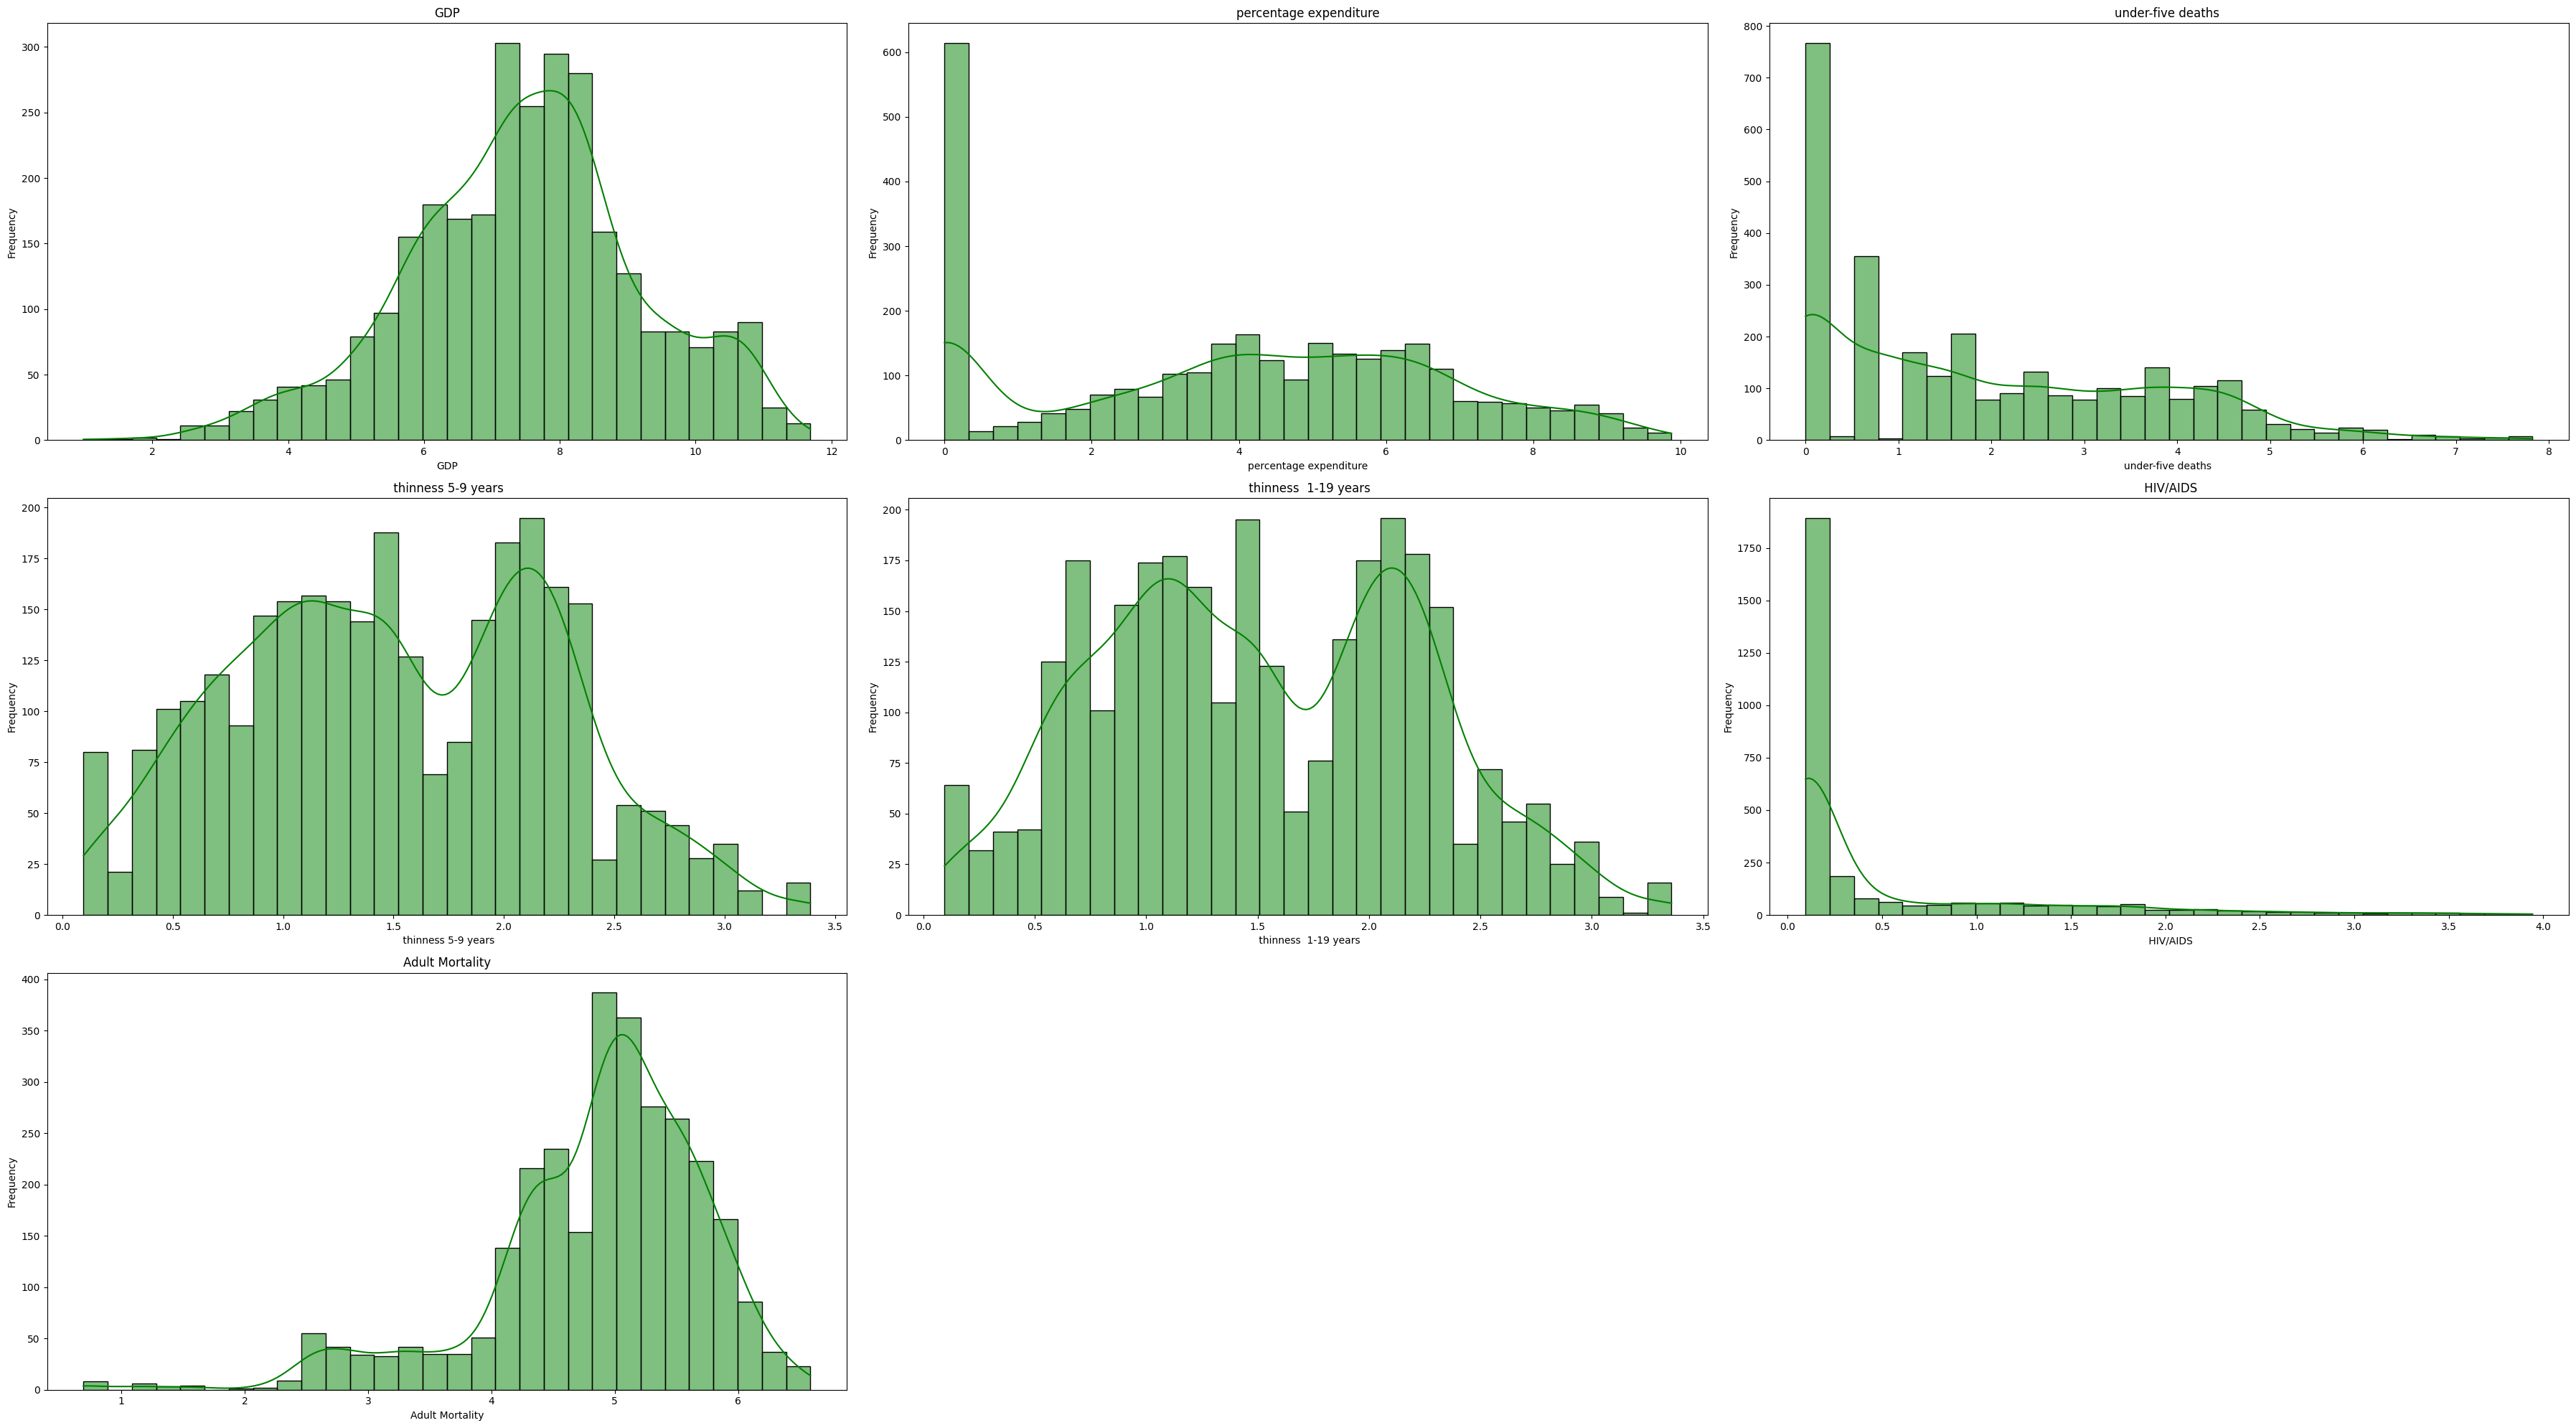

In [171]:
# Histogram: Visualize the distribution of each numerical variable with histograms in a 3 x 3 grid

# Remove 'Country' and 'Status' from features_list for plotting
plot_features =skewed_cols

fig, axes = plt.subplots(3, 3, figsize=(36, 20))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

for i, var in enumerate(plot_features):
    sns.histplot(training_df_trans[var], kde=True, bins=30, ax=axes[i],color='green')
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Data Transformation Encoding the categorical features



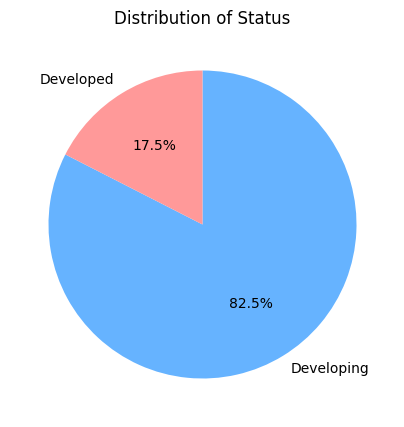

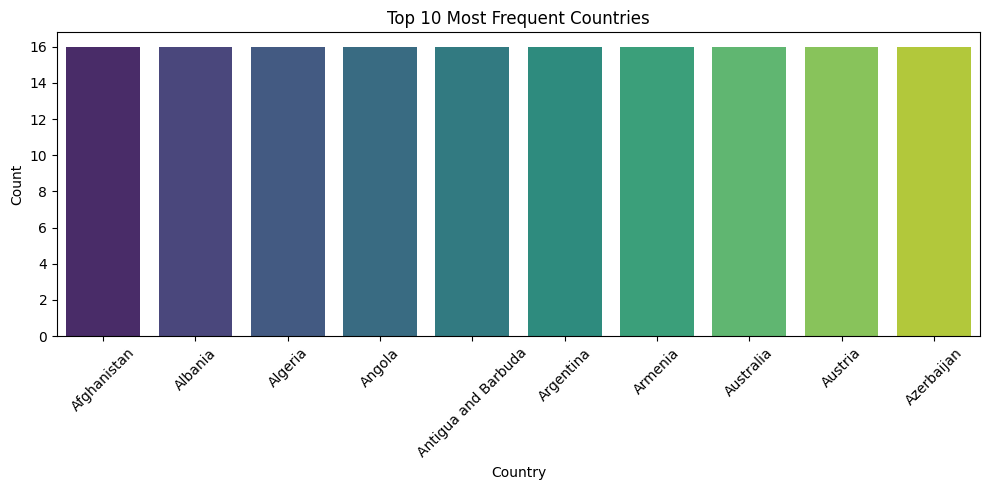

In [172]:
# Visualize 'Status' column as a pie chart
plt.figure(figsize=(5, 5))
training_df_trans['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Status')
plt.ylabel('')
plt.show()

# Visualize 'Country' column as a bar plot (top 10 countries)
plt.figure(figsize=(10, 5))
top_countries = training_df_trans['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Most Frequent Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [173]:
# Encode 'Status' using Label Encoding and 'Country' using Label Encoding instead of One-Hot Encoding

# Label encode 'Status'
le_status = LabelEncoder()
training_df_trans['Status'] = le_status.fit_transform(training_df_trans['Status'])

# Label encode 'Country' (instead of one-hot encoding)
le_country = LabelEncoder()
training_df_trans['Country'] = le_country.fit_transform(training_df_trans['Country'])



- **Label Encoding is used for both the 'Status' and 'Country' columns in this workflow.**  
  - For the 'Status' column, which contains only two categories (e.g., "Developed" and "Developing"), Label Encoding converts these categories into numeric values (0 and 1). This is efficient and appropriate for binary categorical variables.
  - We use label encoding for the 'Country' column because it contains a large number of unique values. Label encoding efficiently converts each country into a unique integer, making it a practical choice for handling high-cardinality categorical features.r.  


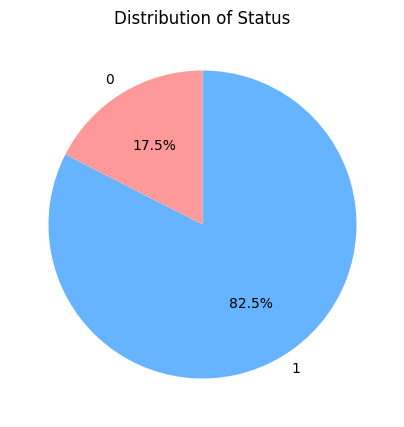

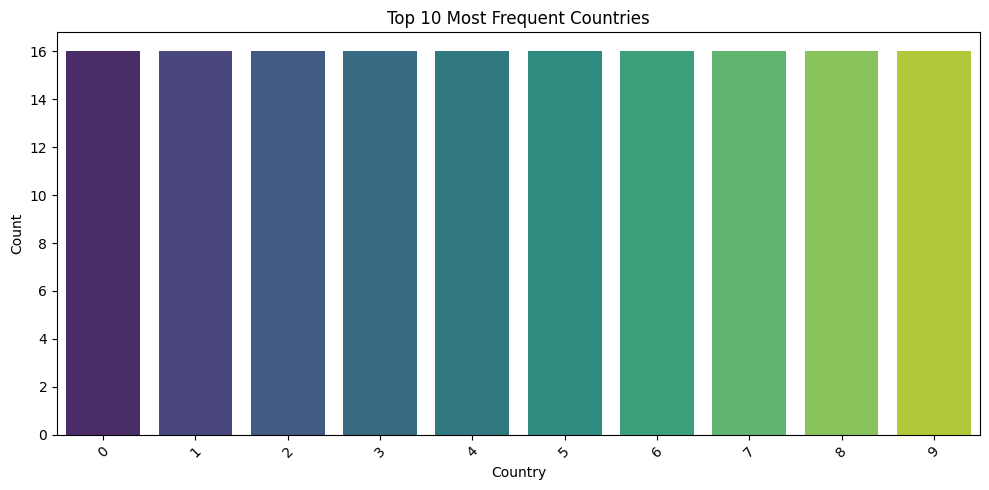

In [174]:
# Visualize 'Status' column as a pie chart
plt.figure(figsize=(5, 5))
training_df_trans['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Status')
plt.ylabel('')
plt.show()

# Visualize 'Country' column as a bar plot (top 10 countries)
plt.figure(figsize=(10, 5))
top_countries = training_df_trans['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Most Frequent Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Data Transformation Normalization of features



In [175]:
# Normalize numerical columns using StandardScaler

# Identify numerical columns (excluding one-hot and encoded columns)
num_cols = training_df_trans.select_dtypes(include=[np.number]).columns
# Exclude the target and encoded columns if present
num_cols = [col for col in num_cols if col not in ['Status','Country'] ]


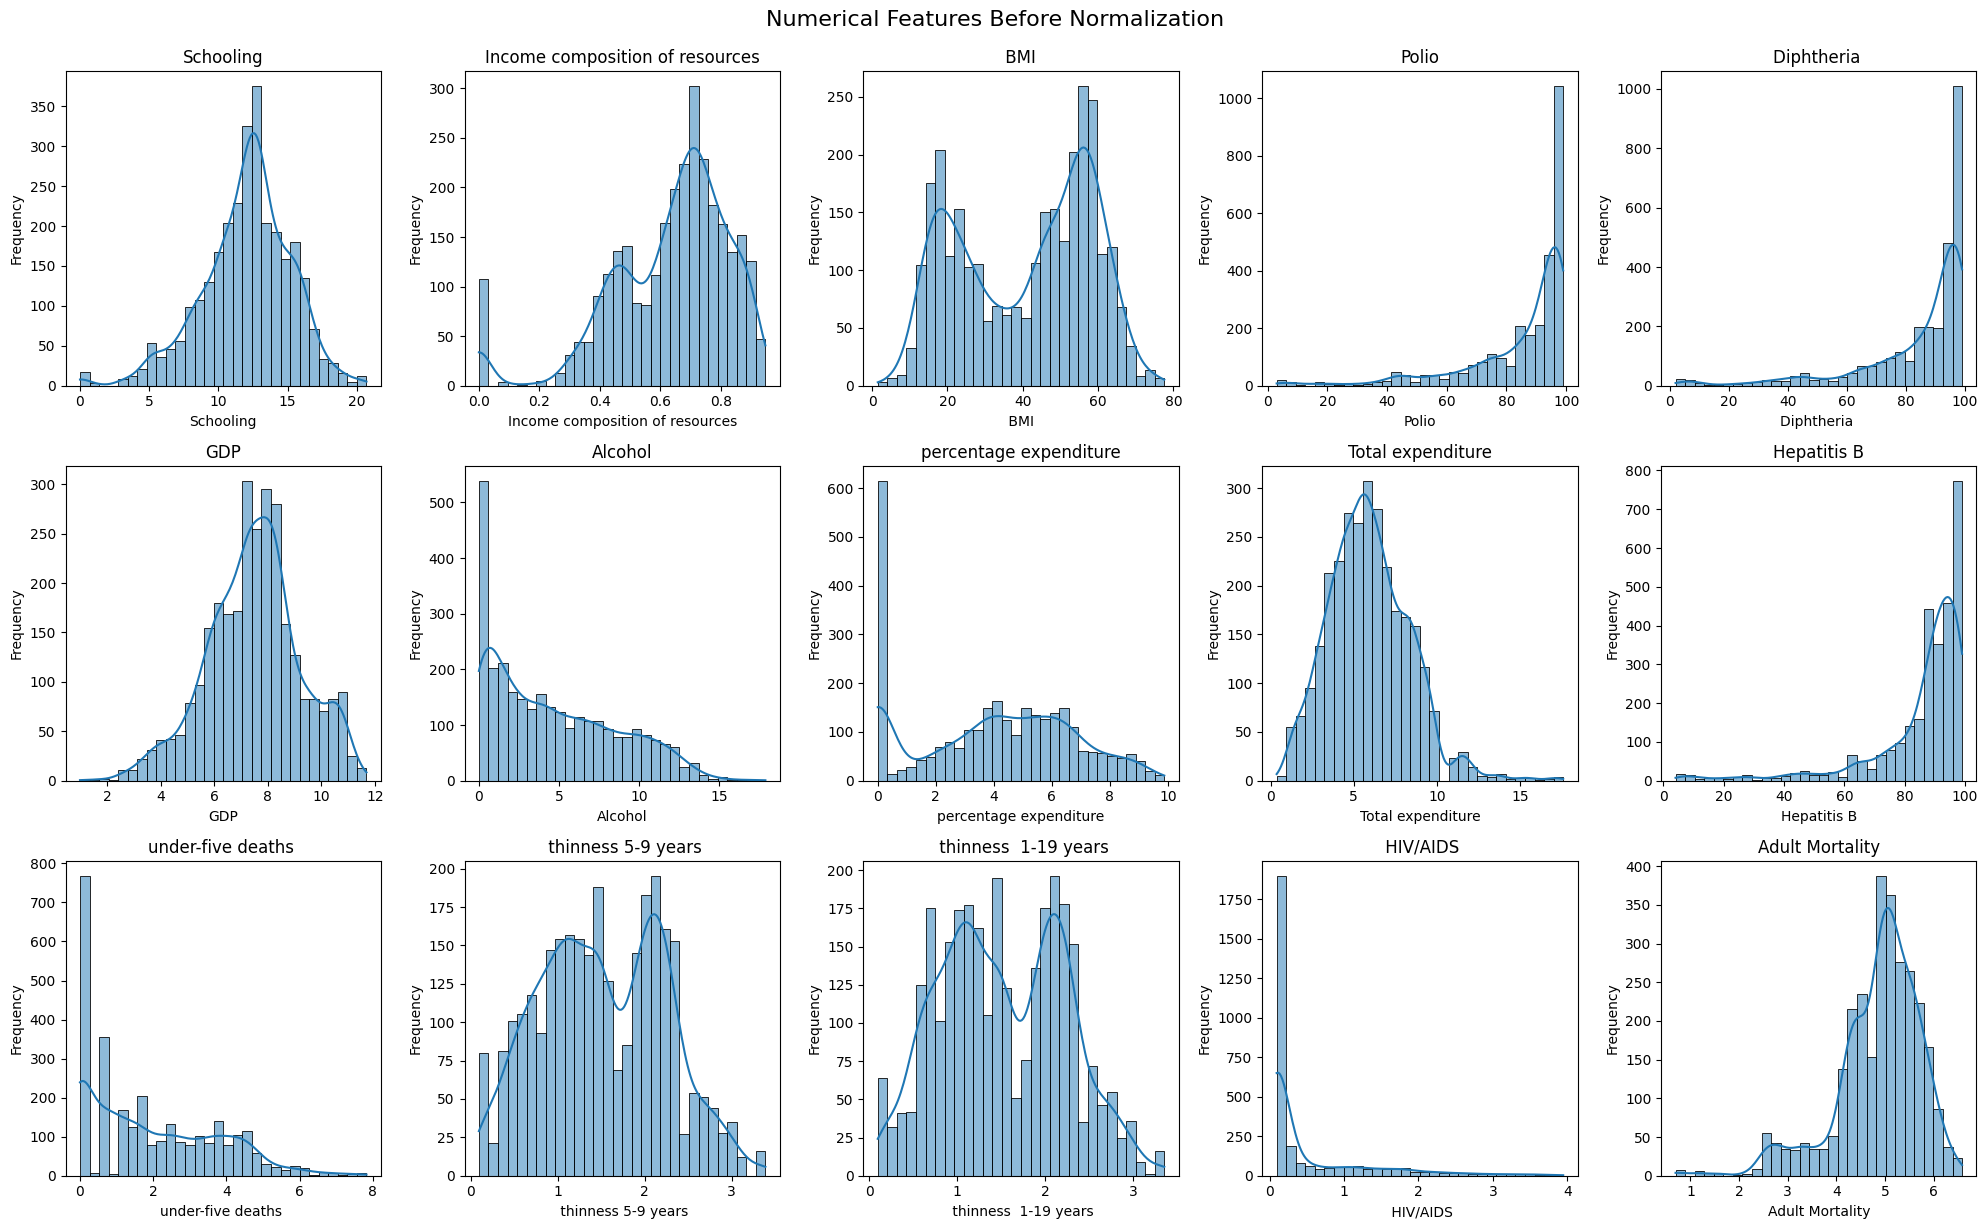

In [176]:
# Visualize the distribution of numerical columns before normalization
# Plot histograms for each numerical column before normalization
fig, axes = plt.subplots(nrows=(len(num_cols) + 4) // 5, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(training_df_trans[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Numerical Features Before Normalization', fontsize=16, y=1.02)
plt.show()

In [177]:

scaler = StandardScaler()
training_df_trans[num_cols] = scaler.fit_transform(training_df_trans[num_cols])

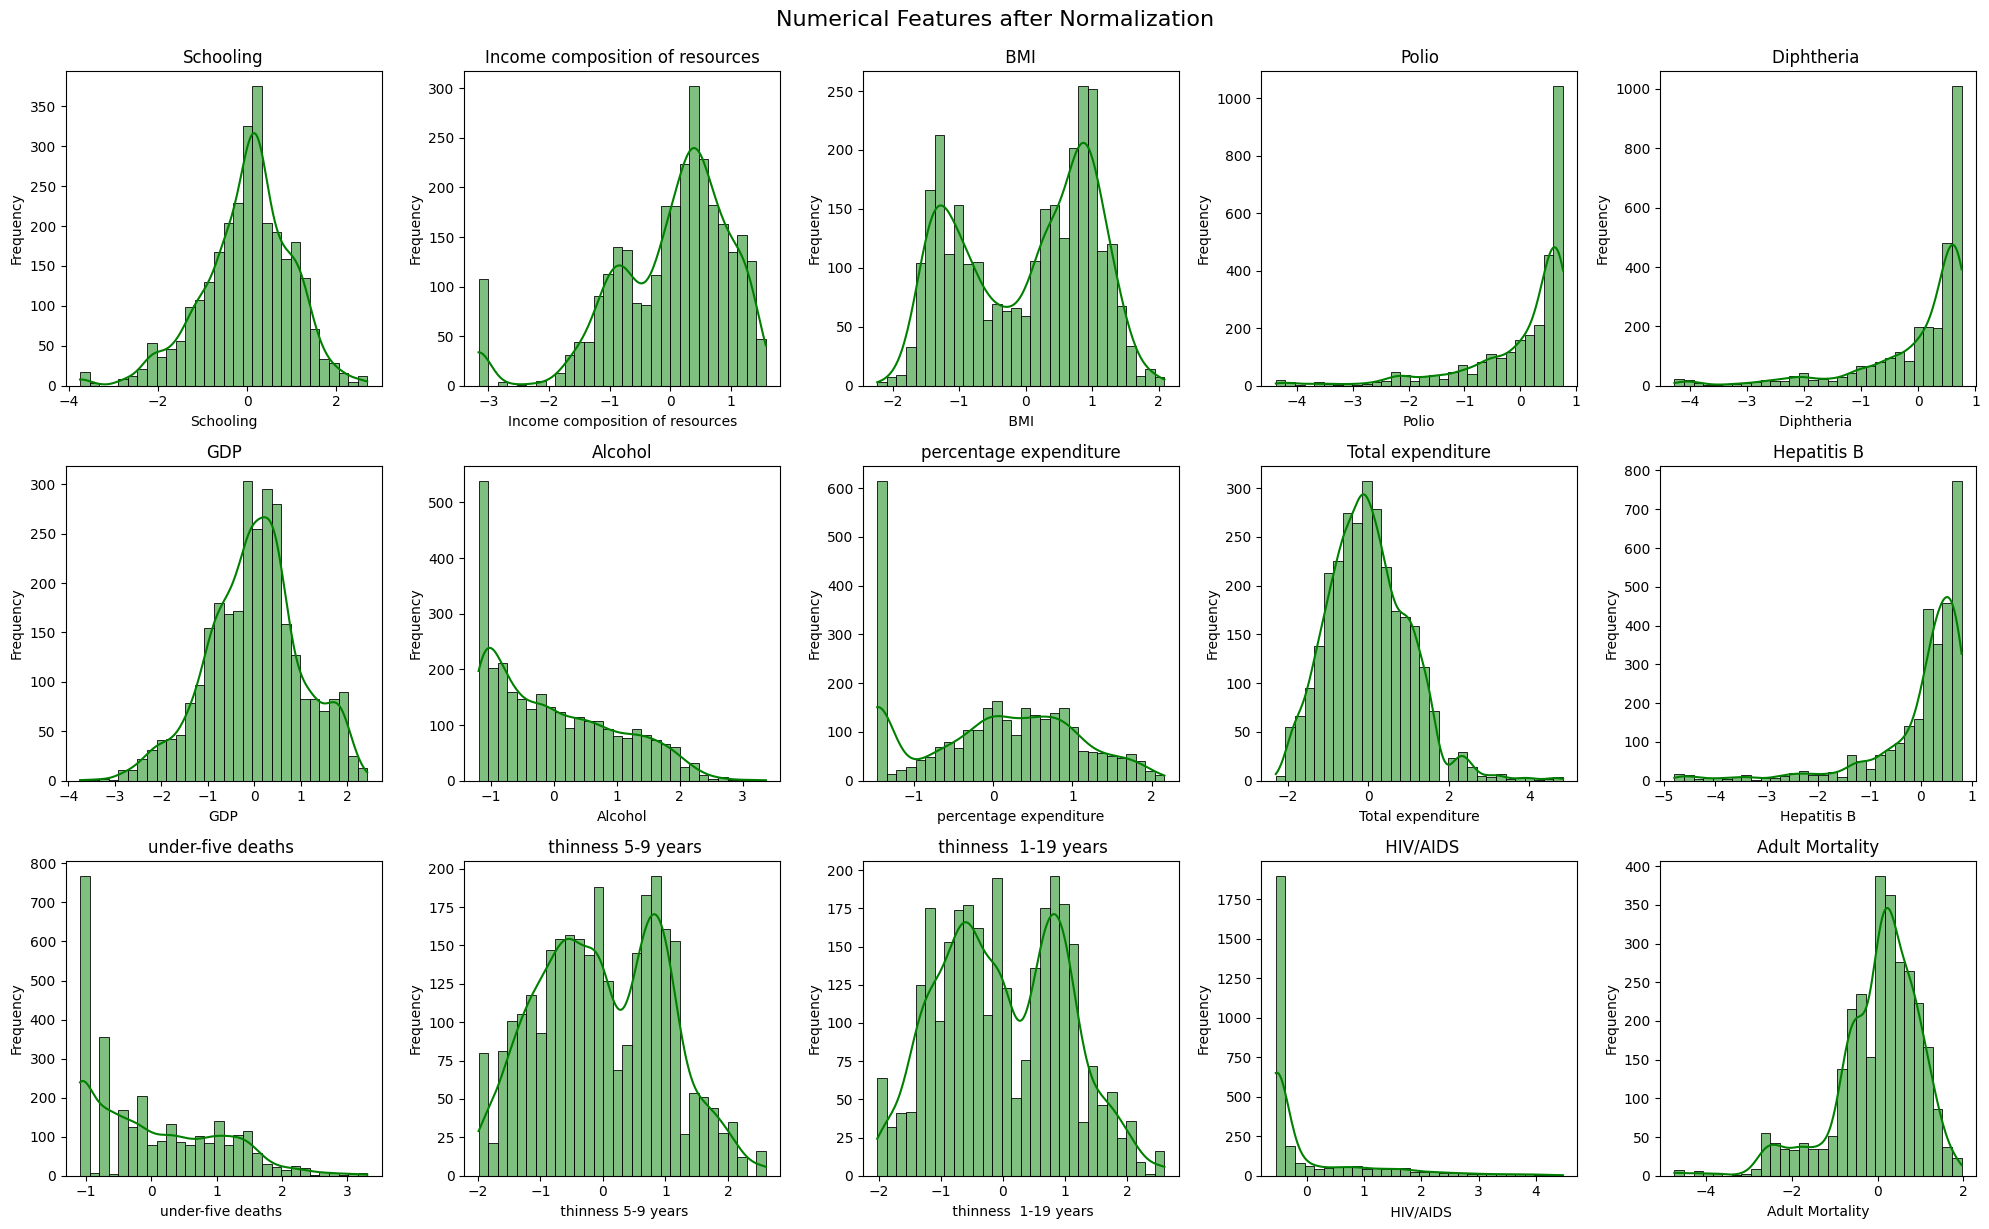

In [178]:
# Visualize the distribution of numerical columns after normalization



# Plot histograms for each numerical column after normalization
fig, axes = plt.subplots(nrows=(len(num_cols) + 4) // 5, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(training_df_trans[col], bins=30, kde=True, ax=axes[i],color='green')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Numerical Features after Normalization', fontsize=16, y=1.02)
plt.show()

- 'Status' is a categorical variable (already label encoded).
- 'Country' is a categorical variable (already label encoded).
- Only continuous numerical features should be normalized.


In [179]:
training_df_trans['Life expectancy '] = training_df_clean['Life expectancy '].values  # adding the target variable back to the transformed dataframe


# Data Preparation for Modeling

In [180]:


# Split into train (70%), temp (30%)
train_df, temp_df = train_test_split(training_df_trans, test_size=0.3, random_state=42)

# Split temp into validation (15%) and test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Train shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (2049, 18)
Validation shape: (439, 18)
Test shape: (440, 18)


### Split Features and Target Variables

In [181]:

X_train = train_df.drop(columns=[target_name])
y_train = train_df[target_name]

X_val = val_df.drop(columns=[target_name])
y_val = val_df[target_name]

X_test = test_df.drop(columns=[target_name])
y_test = test_df[target_name]


###  Save Datasets

In [182]:
# Ensure the processed data directory exists
os.makedirs('../data/processed', exist_ok=True)


In [183]:

X_train.to_csv('../data/processed/X_train.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)


### Assess Baseline Model

### Generate Predictions with Baseline Model

We need a baseline model to provide a simple reference point for model performance. It helps us determine if our advanced models actually add value—if they can't outperform the baseline, our approach needs improvement. The baseline sets a minimum standard for comparison.

In [184]:


dummy_regressor = DummyRegressor(strategy="median")  # Predicts the median of the target values
dummy_regressor.fit(X_train, y_train)
y_pred = dummy_regressor.predict(X_val)
y_pred



array([72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1,
       72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72.1, 72

### Selection of Performance Metrics




In [185]:

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")


RMSE: 10.104271858723347


RMSE (Root Mean Squared Error):

Measures the average magnitude of prediction errors in the same units as the target variable (here, years of life expectancy).
Penalizes larger errors more than smaller ones, making it sensitive to outliers.
Easy to interpret: lower RMSE means better model performance.


In [186]:

r2 = r2_score(y_val, y_pred)
print(f"R2 Score: {r2}")

R2 Score: -0.1023137410785544


R² Score (Coefficient of Determination):

Indicates the proportion of variance in the target variable explained by the model.
Ranges from 0 to 1 (or negative if the model is worse than the mean), where higher values mean better fit.
Helps assess how well the model captures the underlying patterns in the data.

### Baseline Model Performance




In [187]:
y_pred = dummy_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")



r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

RMSE: 10.197688017834771
R2 Score: -0.10445638824111358


RMSE: 10.20
On average, your predictions are off by about 10.2 years of life expectancy.

R² Score: -0.10
The negative R² means the model performs worse than simply predicting the mean of the target for all samples.

It means the Model did not learn anything

In [188]:
# Calculating confidence within RMSE range
allowed_range_lower = y_test - rmse
allowed_range_upper = y_test + rmse
within_range = np.logical_and(y_pred >= allowed_range_lower, y_pred <= allowed_range_upper)
confidence = np.sum(within_range) / len(y_test) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R2: {r2:.2f}")
print(f"Confidence within RMSE range: {confidence:.2f}%")

Test RMSE: 10.20
Test R2: -0.10
Confidence within RMSE range: 72.95%


Even with 10 years of tolerance it can predict it with just 73 percent.

### Regression Model Performance




In [189]:

# Define parameter grid for Linear Regression (only 'fit_intercept' and 'normalize' are commonly tuned)
linreg_params = {
    'fit_intercept': [True, False]
}


In [190]:

# Initialize Linear Regression model
linreg = LinearRegression()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(linreg, param_grid=linreg_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the final model with best parameters
best_linreg = LinearRegression(**best_params)
best_linreg.fit(X_train, y_train)

print("Linear Regression model trained successfully!")

# Make predictions
y_pred = best_linreg.predict(X_val)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


Best Parameters: {'fit_intercept': True}
Linear Regression model trained successfully!


In [191]:

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

r2 = r2_score(y_val, y_pred)
print(f"Validation RMSE: {rmse:.2f}")

print(f"Validation R2: {r2:.2f}")

Validation RMSE: 3.48
Validation R2: 0.87


- The RMSE of 3.48 means model's predictions are, on average, within about 3.48 years of the actual life expectancy values on the validation set.
- The R² score of 0.87 indicates model explains 87% of the variance in the target variable, which is excellent.

In [192]:
# Calculating confidence within RMSE range for Linear Regression
allowed_range_lower = y_test - rmse
allowed_range_upper = y_test + rmse
y_pred_test = best_linreg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R2: {r2:.2f}")
within_range = np.logical_and(y_pred_test >= allowed_range_lower, y_pred_test <= allowed_range_upper)
confidence = np.sum(within_range) / len(y_test) * 100

print(f"confidence within RMSE range (Linear Regression): {confidence:.2f}%")

Test RMSE: 3.79
Test R2: 0.85
confidence within RMSE range (Linear Regression): 69.77%


The model can predict life expectancy within a 3.79-year margin of error for approximately 69.77% of cases on the test set.

### Random Forest Regression Model Performance




In [193]:

rf_params = {
    'n_estimators': [200,300,400],
    'max_depth': [25,30,35],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [194]:

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the final model with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

print("Random Forest regressor trained successfully!")

# Make predictions
y_pred = best_rf.predict(X_val)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Random Forest regressor trained successfully!


In [195]:

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

r2 = r2_score(y_val, y_pred)
print(f"Validation RMSE: {rmse:.2f}")

print(f"Validation R2: {r2:.2f}")

Validation RMSE: 1.53
Validation R2: 0.97


- The model predicts life expectancy within about 1.53 years on average, which is a strong result.
- An R² of 0.97 means the model explains 97% of the variance in the validation data—an excellent fit.

In [196]:
# Calculating confidence within rmse range for Random Forest Regression
allowed_range_lower = y_test - rmse
allowed_range_upper = y_test +  rmse
y_pred_test = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R2: {r2:.2f}")
within_range = np.logical_and(y_pred_test >= allowed_range_lower, y_pred_test <= allowed_range_upper)
confidence = np.sum(within_range) / len(y_test) * 100

print(f"confidence within rmse range (Random Forest): {confidence:.2f}%")

Test RMSE: 1.98
Test R2: 0.96
confidence within rmse range (Random Forest): 79.32%


The model can predict life expectancy within a 1.98-year margin of error for approximately 79.32% of cases on the test set.

### XGBOOST Model Performance




In [197]:
# Define parameter grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

In [198]:
# Train and evaluate XGBoost Regressor
# Initialize XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(xgb, param_grid=xgb_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the final model with best parameters
best_xgb = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42, n_jobs=-1)
best_xgb.fit(X_train, y_train)

print("XGBoost model trained successfully!")

# Make predictions
y_pred = best_xgb.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

r2 = r2_score(y_val, y_pred)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}
XGBoost model trained successfully!


In [199]:
print(f"Validation RMSE: {rmse:.2f}")

print(f"Validation R2: {r2:.2f}")

Validation RMSE: 1.62
Validation R2: 0.97


- The model achieves a validation RMSE of 1.62, meaning its predictions are, on average, within 1.62 years of the actual life expectancy values.
- The validation R² score of 0.97 indicates the model explains 97% of the variance in life expectancy, demonstrating excellent predictive performance.

In [200]:
# Calculating confidence within rmse range for XGBOOST Regression
allowed_range_lower = y_test - rmse
allowed_range_upper = y_test + rmse
y_pred_test = best_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R2: {r2:.2f}")
within_range = np.logical_and(y_pred_test >= allowed_range_lower, y_pred_test <= allowed_range_upper)
confidence = np.sum(within_range) / len(y_test) * 100

print(f"confidence within rmse range (XGBOOST): {confidence:.2f}%")

Test RMSE: 1.94
Test R2: 0.96
confidence within rmse range (XGBOOST): 77.95%


The model can predict life expectancy within a 1.94-year margin of error for approximately 77.95% of cases on the test set.

### LIGHT GBM Regression Model Performance




In [201]:

# Define parameter grid for LightGBM
lgbm_params = {
    'n_estimators': [500, 400, 300],
    'max_depth': [3, 5, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [63,71,91],
    'subsample': [0.7],
    'colsample_bytree': [0.6,0.7, 0.8]
}


In [202]:
# Train and evaluate LightGBM Regressor

# Initialize LGBMRegressor
lgbm = LGBMRegressor(random_state=42, n_jobs=-1)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(lgbm, param_grid=lgbm_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the final model with best parameters
best_lgbm = LGBMRegressor(**best_params, random_state=42, n_jobs=-1)
best_lgbm.fit(X_train, y_train)

print("LightGBM model trained successfully!")

# Make predictions
y_pred = best_lgbm.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

r2 = r2_score(y_val, y_pred)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2976
[LightGBM] [Info] Number of data points in the train set: 2049, number of used features: 17
[LightGBM] [Info] Start training from score 69.324549
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 400, 'num_leaves': 71, 'subsample': 0.7}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2976
[LightGBM] [Info] Number of data points in the train set: 2049, number of used features: 17
[Light

In [203]:
print(f"Validation RMSE: {rmse:.2f}")

print(f"Validation R2: {r2:.2f}")

Validation RMSE: 1.54
Validation R2: 0.97



- The LGBM model achieves a validation RMSE of 1.54, meaning its predictions are, on average, within 1.54 years of the actual life expectancy values.
- The validation R² score of 0.97 indicates the model explains 97% of the variance in life expectancy, demonstrating excellent predictive performance.

In [204]:
# Calculating confidence within rmse range for Light GBM Regression
allowed_range_lower = y_test - rmse
allowed_range_upper = y_test +  rmse
y_pred_test = best_lgbm.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R2: {r2:.2f}")
within_range = np.logical_and(y_pred_test >= allowed_range_lower, y_pred_test <= allowed_range_upper)
confidence = np.sum(within_range) / len(y_test) * 100

print(f"confidence within rmse range (Light GBM): {confidence:.2f}%")

Test RMSE: 1.93
Test R2: 0.96
confidence within rmse range (Light GBM): 77.95%


- The model can predict life expectancy within a 1.93-year margin of error for approximately 77.95% of cases on the test set.

### Gradient boost Regression Model Performance




In [205]:
# Define parameter grid for Gradient Boosting
gbr_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}


In [206]:
# Train and evaluate Gradient Boosting Regressor


# Initialize GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(gbr, param_grid=gbr_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the final model with best parameters
best_gbr = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr.fit(X_train, y_train)

print("Gradient Boosting model trained successfully!")

# Make predictions
y_pred = best_gbr.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

r2 = r2_score(y_val, y_pred)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 0.7}
Gradient Boosting model trained successfully!


In [207]:
print(f"Validation RMSE: {rmse:.2f}")

print(f"Validation R2: {r2:.2f}")

Validation RMSE: 1.59
Validation R2: 0.97



- The Gradient Boosting model achieves a validation RMSE of 1.59, meaning its predictions are, on average, within 1.65 years of the actual life expectancy values.
- The validation R² score of 0.97 indicates the model explains 97% of the variance in life expectancy, demonstrating excellent predictive performance.

In [208]:
# Calculating confidence within rmse range for Gradient Boost Regression
allowed_range_lower = y_test -  rmse
allowed_range_upper = y_test +  rmse
y_pred_test = best_gbr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R2: {r2:.2f}")

within_range = np.logical_and(y_pred_test >= allowed_range_lower, y_pred_test <= allowed_range_upper)
confidence = np.sum(within_range) / len(y_test) * 100

print(f"confidence within rmse range (Gradient Boost): {confidence:.2f}%")

Test RMSE: 1.97
Test R2: 0.96
confidence within rmse range (Gradient Boost): 77.50%


The model can predict life expectancy within a 1.97-year margin of error for approximately 77.5% of cases on the test set.

# All Model Performance Comparision




In [209]:
# Compare all best model predictions with a tolerance of years on the test set

models = {
    "Linear Regression": best_linreg,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "LightGBM": best_lgbm,
    "Gradient Boosting": best_gbr
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    within_yrs = np.abs(y_pred - y_test) <= 3  # Tolerance of 3 years
    confidence = np.mean(within_yrs) * 100
    results.append({
        "Model": name,
        "R2": r2,
        "RMSE": rmse,
        "Confidence (%)": confidence,
    })

# Display results as a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2", ascending=False).reset_index(drop=True)
results_df

Model        R2      RMSE  Confidence (%)
0           LightGBM  0.960424  1.930394       90.454545
1            XGBoost  0.959932  1.942341       89.545455
2  Gradient Boosting  0.958774  1.970203       89.090909
3      Random Forest  0.958430  1.978421       88.863636
4  Linear Regression  0.847346  3.791237       63.409091

Based on your updated results table:

- LightGBM achieves the highest confidence (90.45%) for predicting life expectancy within a 3-year tolerance, with an R² of 0.96042 and RMSE of 1.93. This indicates the best overall fit and most accurate predictions.
- XGBoost is a close second, with an R² of 0.95993, RMSE of 1.94, and confidence of 89.55%. The difference in performance compared to LightGBM is minimal.
- Gradient Boosting and Random Forest also perform strongly, with R² values of 0.95877 and 0.95843, RMSE of 1.97 and 1.98, and confidence levels of 89.09% and 88.86%, respectively.
- Linear Regression significantly underperforms compared to the ensemble models, with a much lower R² (0.84735), higher RMSE (3.79), and confidence of only 63.41%.


Conclusion:
- LightGBM is the best choice if you prioritize the highest variance explained (R²), lowest prediction error (RMSE), and the highest confidence within a 3-year tolerance window.
- XGBoost is a strong alternative, with performance metrics very close to LightGBM.
- Gradient Boosting and Random Forest are also reliable options, with only slightly lower metrics.
- Linear Regression is not competitive with the ensemble methods for this task.


Recommendation:
LightGBM remains the best overall choice for your evaluation criteria, excelling in both accuracy and reliability within your 3-year tolerance window. XGBoost is a close second, especially if you value a balance between performance and computational efficiency.

In [210]:




# Ensure the models directory exists
os.makedirs('../models', exist_ok=True)

# Save each best model
joblib.dump(best_linreg, '../models/best_linreg.joblib')
joblib.dump(best_rf, '../models/best_rf.joblib')
joblib.dump(best_xgb, '../models/best_xgb.joblib')
joblib.dump(best_lgbm, '../models/best_lgbm.joblib')
joblib.dump(best_gbr, '../models/best_gbr.joblib')

print("All best models saved in ../models/")


All best models saved in ../models/


In [211]:


# Load each best model
best_linreg = joblib.load('../models/best_linreg.joblib')
best_rf = joblib.load('../models/best_rf.joblib')
best_xgb = joblib.load('../models/best_xgb.joblib')
best_lgbm = joblib.load('../models/best_lgbm.joblib')
best_gbr = joblib.load('../models/best_gbr.joblib')

print("All best models loaded from ../models/")


All best models loaded from ../models/
